In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
pd.set_option('display.max_columns', 50)
data = pd.read_csv('risk_factors_cervical_cancer.csv')
print(data.shape)
data.head(10)

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [3]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.Biopsy.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [5]:
corr = data.corr()
highest_corr = corr.loc['Biopsy'].drop('Biopsy').idxmax()
print(highest_corr)

Schiller


In [6]:
corr.loc['Biopsy'].drop('Biopsy').nlargest(5)

Schiller      0.733204
Hinselmann    0.547417
Citology      0.327466
Dx:Cancer     0.160905
Dx:HPV        0.160905
Name: Biopsy, dtype: float64

In [7]:
tests_corr = data[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].corr()

In [8]:
tests_corr

,Hinselmann,Schiller,Citology,Biopsy
Hinselmann,1.000000,0.650249,0.192467,0.547417
Schiller,0.650249,1.000000,0.361486,0.733204
Citology,0.192467,0.361486,1.000000,0.327466
Biopsy,0.547417,0.733204,0.327466,1.000000


### Here we can see that two highly correlated with Biopsy columns are Schiller and Hinselmann, which is quite obvious, because all of them are tests or procedures made to diagnose cervical cancer. Let's cosider a targer value to be a conjunctions of these three columns. We won't take Citology, because it has a lower correlation with other tests.

In [9]:
data['has_cancer'] = data.Biopsy & data.Schiller & data.Hinselmann

In [10]:
data.has_cancer.value_counts()

0    833
1     25
Name: has_cancer, dtype: int64

## Let's see whether the age of a person is somehow connected with having a cervical cancer.


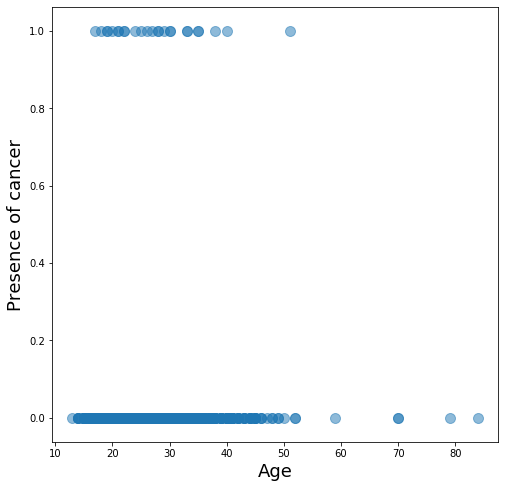

In [11]:
plt.figure(figsize=(8, 8))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Presence of cancer', fontsize=18)
plt.scatter(data.Age, data.has_cancer, alpha=0.5, marker='o', s=100)
plt.show()

From the picture we can see that the cancer is diagnosed mainly when a person is 20-30 y.o.

## Now let's study correlation of having cancer with smoking.

In [12]:
data.groupby("Smokes").has_cancer.mean()

Smokes
0.0    0.026316
1.0    0.040650
?      0.076923
Name: has_cancer, dtype: float64

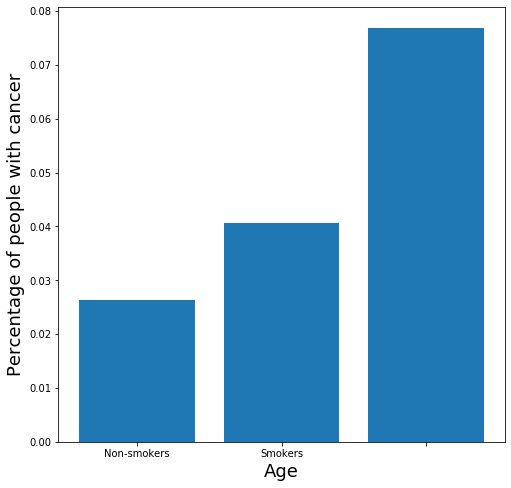

In [13]:
plt.figure(figsize=(8, 8))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Percentage of people with cancer', fontsize=18)
plt.bar(['Non-smokers', 'Smokers', ''], data.groupby("Smokes").has_cancer.mean())
plt.show()

In [14]:
data['Smokes (packs/year)'][data.Smokes == '?'].value_counts()

?    13
Name: Smokes (packs/year), dtype: int64

We see that we can't get any information about people who didn't say about smoking, so the third column isn't needed actually

## Let's study whether first sexual intercourse and curvical cancer are connected

In [15]:
data['First sexual intercourse'].value_counts()

15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
22.0      9
23.0      9
26.0      7
?         7
12.0      6
24.0      6
27.0      6
29.0      5
28.0      3
10.0      2
25.0      2
11.0      2
32.0      1
Name: First sexual intercourse, dtype: int64

In [16]:
data['First sexual intercourse'] = data['First sexual intercourse'].replace('?', '0.0')

In [17]:
data['First sexual intercourse'] = data['First sexual intercourse'].astype('float32').astype('int32')
# x = np.sort(data['First sexual intercourse'].unique())[1:]
# y = data.groupby('First sexual intercourse').has_cancer.mean()[1:]

y = data.groupby('First sexual intercourse').has_cancer.mean()[data['First sexual intercourse'].value_counts() > 7][1:]
x = y.index

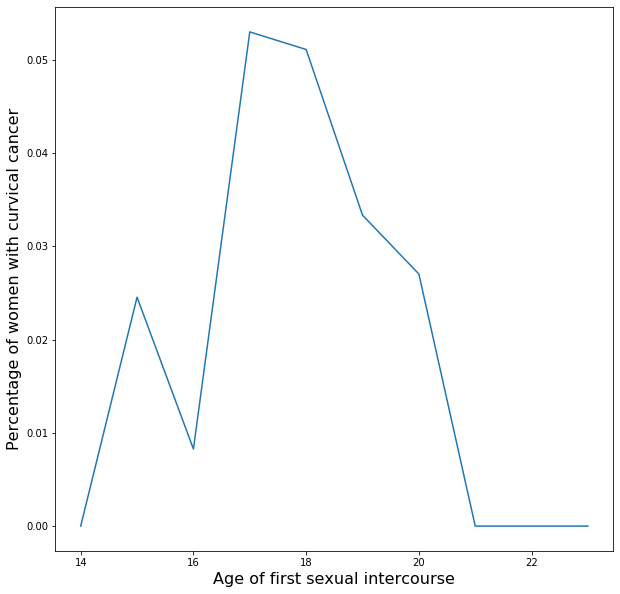

In [18]:
plt.figure(figsize=(10, 10))
plt.xlabel('Age of first sexual intercourse', fontsize=16)
plt.ylabel('Percentage of women with curvical cancer', fontsize=16)
plt.xticks(rotation='horizontal')
plt.plot(x, y)
plt.show()

In [19]:
print(y.idxmax())

17


We can see that there is a significant peak in chances of having a cancer for those who had first sexual intercourse at 17 y.o.

## About metrics for model evaluation

Since we are dealing with a highly imbalanced classification problem, we won't use MSE or RMSE, but we will use precision, recall and f1 metrics. That is because we want as lower number of false positives as possible not to miss peolple having a cancer.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [21]:
y = data.has_cancer
data = data.drop(columns=['has_cancer', 'Biopsy', 'Schiller', 'Hinselmann', 'Citology'])
data = data.replace('?', np.nan).astype('float64')
X_train, X_test, y_train, y_test = train_test_split(data, y, stratify=y)

In [22]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)
X_train, X_test = imp.transform(X_train), imp.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [23]:
lr = LogisticRegression(n_jobs = -1)
lr.fit(X_train, y_train)
pred_train, pred_test = lr.predict(X_train), lr.predict(X_test)

/home/topshik/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/topshik/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [24]:
pred_train_values, pred_train_counts = np.unique(pred_train, return_counts=True)
print(dict(zip(pred_train_values, pred_train_counts)))

pred_test_values, pred_test_counts = np.unique(pred_test, return_counts=True)
print(dict(zip(pred_test_values, pred_test_counts)))

{0: 641, 1: 2}
{0: 212, 1: 3}


#### Wow, such a model, such machine learning.


In [25]:
print('f1 score on train: ', f1_score(y_train, pred_train), '\nf1 score on test',  f1_score(y_test, pred_test))

f1 score on train:  0.1904761904761905 
f1 score on test 0.2222222222222222


Actually, it is stupid to build any metric here. The result is ridiculous.

In [26]:
skf = StratifiedKFold(n_splits = 3)
skf.get_n_splits(data, y)

3

In [52]:
lr_cv = LogisticRegression()
skfold = StratifiedKFold(n_splits = 3)
skf.get_n_splits(data, y)
cv_params = {'penalty': ('l1', 'l2'), 'tol': np.logspace(-6, -1, 7)}
cross_val_lr = GridSearchCV(lr_cv, cv_params, cv=skfold)
cross_val_lr.fit(X_train, y_train)

/home/topshik/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/topshik/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/topshik/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/topshik/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/topshik/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'penalty': ('l1', 'l2'),
                         'tol': array([1.00000000e-06, 6.81292069e-06, 4.64158883e-05, 3.16227766e-04,
       2.15443469e-03, 1.46779927e-02, 1.00000000e-01])},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [54]:
print('f1 score on train: ', f1_score(y_train, cross_val_lr.predict(X_train)), '\nf1 score on test',  f1_score(y_test, cross_val_lr.predict(X_test)))

f1 score on train:  0.1904761904761905 
f1 score on test 0.2222222222222222


In [43]:
from catboost import CatBoostClassifier

In [44]:
clf = CatBoostClassifier()
clf.fit(X_train, y_train)

Learning rate set to 0.014786
0:	learn: 0.6691830	total: 8.48ms	remaining: 8.47s
1:	learn: 0.6454524	total: 13ms	remaining: 6.47s
2:	learn: 0.6228519	total: 17.1ms	remaining: 5.69s
3:	learn: 0.6010845	total: 21.2ms	remaining: 5.28s
4:	learn: 0.5806620	total: 26.4ms	remaining: 5.26s
5:	learn: 0.5616070	total: 31.1ms	remaining: 5.15s
6:	learn: 0.5427157	total: 37.1ms	remaining: 5.27s
7:	learn: 0.5241014	total: 42.2ms	remaining: 5.23s
8:	learn: 0.5070299	total: 46.7ms	remaining: 5.14s
9:	learn: 0.4912205	total: 51ms	remaining: 5.05s
10:	learn: 0.4745810	total: 55.2ms	remaining: 4.96s
11:	learn: 0.4586034	total: 59.4ms	remaining: 4.89s
12:	learn: 0.4446672	total: 62.9ms	remaining: 4.78s
13:	learn: 0.4306148	total: 67.3ms	remaining: 4.74s
14:	learn: 0.4176750	total: 71.4ms	remaining: 4.69s
15:	learn: 0.4050325	total: 75.5ms	remaining: 4.64s
16:	learn: 0.3929319	total: 79.5ms	remaining: 4.59s
17:	learn: 0.3811255	total: 83.7ms	remaining: 4.56s
18:	learn: 0.3702832	total: 87.8ms	remaining: 4.

176:	learn: 0.1108191	total: 790ms	remaining: 3.67s
177:	learn: 0.1107623	total: 796ms	remaining: 3.68s
178:	learn: 0.1106254	total: 803ms	remaining: 3.68s
179:	learn: 0.1106050	total: 810ms	remaining: 3.69s
180:	learn: 0.1105299	total: 815ms	remaining: 3.69s
181:	learn: 0.1104215	total: 820ms	remaining: 3.69s
182:	learn: 0.1103820	total: 825ms	remaining: 3.68s
183:	learn: 0.1103449	total: 829ms	remaining: 3.68s
184:	learn: 0.1102637	total: 834ms	remaining: 3.67s
185:	learn: 0.1101694	total: 838ms	remaining: 3.67s
186:	learn: 0.1100536	total: 843ms	remaining: 3.67s
187:	learn: 0.1098984	total: 848ms	remaining: 3.66s
188:	learn: 0.1097700	total: 852ms	remaining: 3.66s
189:	learn: 0.1096786	total: 857ms	remaining: 3.65s
190:	learn: 0.1095733	total: 861ms	remaining: 3.65s
191:	learn: 0.1095388	total: 865ms	remaining: 3.64s
192:	learn: 0.1091983	total: 869ms	remaining: 3.63s
193:	learn: 0.1090286	total: 874ms	remaining: 3.63s
194:	learn: 0.1087536	total: 879ms	remaining: 3.63s
195:	learn: 

360:	learn: 0.0908350	total: 1.79s	remaining: 3.17s
361:	learn: 0.0907970	total: 1.8s	remaining: 3.17s
362:	learn: 0.0907128	total: 1.8s	remaining: 3.17s
363:	learn: 0.0906701	total: 1.81s	remaining: 3.16s
364:	learn: 0.0905713	total: 1.81s	remaining: 3.16s
365:	learn: 0.0904424	total: 1.82s	remaining: 3.15s
366:	learn: 0.0903995	total: 1.83s	remaining: 3.15s
367:	learn: 0.0903496	total: 1.83s	remaining: 3.14s
368:	learn: 0.0902004	total: 1.83s	remaining: 3.14s
369:	learn: 0.0900959	total: 1.84s	remaining: 3.13s
370:	learn: 0.0897963	total: 1.84s	remaining: 3.13s
371:	learn: 0.0897284	total: 1.85s	remaining: 3.12s
372:	learn: 0.0896297	total: 1.85s	remaining: 3.12s
373:	learn: 0.0895977	total: 1.86s	remaining: 3.11s
374:	learn: 0.0895649	total: 1.86s	remaining: 3.11s
375:	learn: 0.0895220	total: 1.87s	remaining: 3.1s
376:	learn: 0.0893505	total: 1.88s	remaining: 3.1s
377:	learn: 0.0892812	total: 1.88s	remaining: 3.09s
378:	learn: 0.0891723	total: 1.89s	remaining: 3.09s
379:	learn: 0.08

522:	learn: 0.0794975	total: 2.6s	remaining: 2.37s
523:	learn: 0.0793872	total: 2.61s	remaining: 2.37s
524:	learn: 0.0793652	total: 2.61s	remaining: 2.36s
525:	learn: 0.0792504	total: 2.62s	remaining: 2.36s
526:	learn: 0.0791467	total: 2.62s	remaining: 2.35s
527:	learn: 0.0790714	total: 2.63s	remaining: 2.35s
528:	learn: 0.0790547	total: 2.63s	remaining: 2.34s
529:	learn: 0.0790294	total: 2.64s	remaining: 2.34s
530:	learn: 0.0789572	total: 2.64s	remaining: 2.33s
531:	learn: 0.0788928	total: 2.65s	remaining: 2.33s
532:	learn: 0.0786581	total: 2.65s	remaining: 2.32s
533:	learn: 0.0785754	total: 2.66s	remaining: 2.32s
534:	learn: 0.0785110	total: 2.66s	remaining: 2.31s
535:	learn: 0.0784517	total: 2.67s	remaining: 2.31s
536:	learn: 0.0784222	total: 2.67s	remaining: 2.3s
537:	learn: 0.0784043	total: 2.68s	remaining: 2.3s
538:	learn: 0.0781834	total: 2.68s	remaining: 2.29s
539:	learn: 0.0780209	total: 2.69s	remaining: 2.29s
540:	learn: 0.0779072	total: 2.69s	remaining: 2.28s
541:	learn: 0.0

696:	learn: 0.0660985	total: 3.61s	remaining: 1.57s
697:	learn: 0.0660868	total: 3.61s	remaining: 1.56s
698:	learn: 0.0660787	total: 3.62s	remaining: 1.56s
699:	learn: 0.0659975	total: 3.62s	remaining: 1.55s
700:	learn: 0.0659904	total: 3.63s	remaining: 1.55s
701:	learn: 0.0659482	total: 3.63s	remaining: 1.54s
702:	learn: 0.0658319	total: 3.64s	remaining: 1.54s
703:	learn: 0.0657424	total: 3.64s	remaining: 1.53s
704:	learn: 0.0655616	total: 3.65s	remaining: 1.53s
705:	learn: 0.0655493	total: 3.65s	remaining: 1.52s
706:	learn: 0.0652966	total: 3.66s	remaining: 1.51s
707:	learn: 0.0652867	total: 3.66s	remaining: 1.51s
708:	learn: 0.0652814	total: 3.67s	remaining: 1.5s
709:	learn: 0.0652690	total: 3.67s	remaining: 1.5s
710:	learn: 0.0652343	total: 3.67s	remaining: 1.49s
711:	learn: 0.0652292	total: 3.68s	remaining: 1.49s
712:	learn: 0.0650896	total: 3.68s	remaining: 1.48s
713:	learn: 0.0650805	total: 3.69s	remaining: 1.48s
714:	learn: 0.0650674	total: 3.69s	remaining: 1.47s
715:	learn: 0.

895:	learn: 0.0525480	total: 4.61s	remaining: 535ms
896:	learn: 0.0525185	total: 4.61s	remaining: 529ms
897:	learn: 0.0524806	total: 4.62s	remaining: 524ms
898:	learn: 0.0523906	total: 4.62s	remaining: 519ms
899:	learn: 0.0523553	total: 4.63s	remaining: 514ms
900:	learn: 0.0523287	total: 4.63s	remaining: 509ms
901:	learn: 0.0522239	total: 4.64s	remaining: 504ms
902:	learn: 0.0522179	total: 4.64s	remaining: 499ms
903:	learn: 0.0521877	total: 4.65s	remaining: 494ms
904:	learn: 0.0521652	total: 4.65s	remaining: 489ms
905:	learn: 0.0521312	total: 4.66s	remaining: 483ms
906:	learn: 0.0520775	total: 4.66s	remaining: 478ms
907:	learn: 0.0520613	total: 4.67s	remaining: 473ms
908:	learn: 0.0519534	total: 4.67s	remaining: 468ms
909:	learn: 0.0519361	total: 4.68s	remaining: 463ms
910:	learn: 0.0519340	total: 4.68s	remaining: 458ms
911:	learn: 0.0518263	total: 4.69s	remaining: 452ms
912:	learn: 0.0517819	total: 4.69s	remaining: 447ms
913:	learn: 0.0516753	total: 4.7s	remaining: 442ms
914:	learn: 0

In [45]:
print('f1 score on train: ', f1_score(y_train, clf.predict(X_train)), '\nf1 score on test',  f1_score(y_test, clf.predict(X_test)))

f1 score on train:  0.6428571428571429 
f1 score on test 0.0


/home/topshik/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
clf_cv = CatBoostClassifier(thread_count=-1)
skfold = StratifiedKFold(n_splits=3)
skf.get_n_splits(data, y)
cv_params = {'depth': (1, 2, 5), 'learning_rate': np.logspace(-5, -1, 4)}
cross_val = GridSearchCV(clf_cv, cv_params, cv=skfold)
cross_val.fit(X_train, y_train)

0:	learn: 0.6931305	total: 7.52ms	remaining: 7.51s
1:	learn: 0.6931136	total: 11.1ms	remaining: 5.52s
2:	learn: 0.6930962	total: 14.3ms	remaining: 4.75s
3:	learn: 0.6930791	total: 17.5ms	remaining: 4.36s
4:	learn: 0.6930625	total: 20.7ms	remaining: 4.12s
5:	learn: 0.6930453	total: 23.9ms	remaining: 3.96s
6:	learn: 0.6930286	total: 27.1ms	remaining: 3.85s
7:	learn: 0.6930114	total: 30.2ms	remaining: 3.74s
8:	learn: 0.6929947	total: 33.4ms	remaining: 3.67s
9:	learn: 0.6929774	total: 36.4ms	remaining: 3.61s
10:	learn: 0.6929606	total: 39.7ms	remaining: 3.57s
11:	learn: 0.6929439	total: 42.9ms	remaining: 3.53s
12:	learn: 0.6929268	total: 46.2ms	remaining: 3.51s
13:	learn: 0.6929101	total: 49.4ms	remaining: 3.48s
14:	learn: 0.6928929	total: 52.5ms	remaining: 3.45s
15:	learn: 0.6928763	total: 55.7ms	remaining: 3.42s
16:	learn: 0.6928594	total: 58.7ms	remaining: 3.4s
17:	learn: 0.6928426	total: 61.8ms	remaining: 3.37s
18:	learn: 0.6928260	total: 64.9ms	remaining: 3.35s
19:	learn: 0.6928093	to

172:	learn: 0.6902358	total: 598ms	remaining: 2.86s
173:	learn: 0.6902188	total: 607ms	remaining: 2.88s
174:	learn: 0.6902020	total: 611ms	remaining: 2.88s
175:	learn: 0.6901855	total: 616ms	remaining: 2.88s
176:	learn: 0.6901689	total: 621ms	remaining: 2.89s
177:	learn: 0.6901523	total: 625ms	remaining: 2.88s
178:	learn: 0.6901351	total: 628ms	remaining: 2.88s
179:	learn: 0.6901182	total: 631ms	remaining: 2.87s
180:	learn: 0.6901016	total: 634ms	remaining: 2.87s
181:	learn: 0.6900850	total: 637ms	remaining: 2.86s
182:	learn: 0.6900684	total: 641ms	remaining: 2.86s
183:	learn: 0.6900518	total: 644ms	remaining: 2.85s
184:	learn: 0.6900353	total: 647ms	remaining: 2.85s
185:	learn: 0.6900186	total: 650ms	remaining: 2.85s
186:	learn: 0.6900019	total: 653ms	remaining: 2.84s
187:	learn: 0.6899853	total: 657ms	remaining: 2.84s
188:	learn: 0.6899687	total: 660ms	remaining: 2.83s
189:	learn: 0.6899520	total: 663ms	remaining: 2.83s
190:	learn: 0.6899350	total: 667ms	remaining: 2.82s
191:	learn: 

341:	learn: 0.6874078	total: 1.19s	remaining: 2.3s
342:	learn: 0.6873912	total: 1.2s	remaining: 2.3s
343:	learn: 0.6873745	total: 1.21s	remaining: 2.3s
344:	learn: 0.6873579	total: 1.21s	remaining: 2.3s
345:	learn: 0.6873413	total: 1.21s	remaining: 2.29s
346:	learn: 0.6873247	total: 1.22s	remaining: 2.29s
347:	learn: 0.6873082	total: 1.22s	remaining: 2.29s
348:	learn: 0.6872918	total: 1.23s	remaining: 2.29s
349:	learn: 0.6872754	total: 1.23s	remaining: 2.28s
350:	learn: 0.6872583	total: 1.24s	remaining: 2.28s
351:	learn: 0.6872413	total: 1.24s	remaining: 2.28s
352:	learn: 0.6872247	total: 1.24s	remaining: 2.28s
353:	learn: 0.6872081	total: 1.25s	remaining: 2.27s
354:	learn: 0.6871916	total: 1.25s	remaining: 2.27s
355:	learn: 0.6871751	total: 1.25s	remaining: 2.26s
356:	learn: 0.6871582	total: 1.25s	remaining: 2.26s
357:	learn: 0.6871415	total: 1.26s	remaining: 2.26s
358:	learn: 0.6871244	total: 1.26s	remaining: 2.26s
359:	learn: 0.6871080	total: 1.27s	remaining: 2.25s
360:	learn: 0.687

508:	learn: 0.6846276	total: 1.79s	remaining: 1.73s
509:	learn: 0.6846111	total: 1.79s	remaining: 1.72s
510:	learn: 0.6845946	total: 1.8s	remaining: 1.72s
511:	learn: 0.6845779	total: 1.8s	remaining: 1.72s
512:	learn: 0.6845613	total: 1.81s	remaining: 1.72s
513:	learn: 0.6845446	total: 1.81s	remaining: 1.71s
514:	learn: 0.6845275	total: 1.82s	remaining: 1.71s
515:	learn: 0.6845103	total: 1.82s	remaining: 1.71s
516:	learn: 0.6844939	total: 1.82s	remaining: 1.7s
517:	learn: 0.6844775	total: 1.83s	remaining: 1.7s
518:	learn: 0.6844610	total: 1.83s	remaining: 1.7s
519:	learn: 0.6844444	total: 1.83s	remaining: 1.69s
520:	learn: 0.6844281	total: 1.84s	remaining: 1.69s
521:	learn: 0.6844116	total: 1.84s	remaining: 1.69s
522:	learn: 0.6843952	total: 1.84s	remaining: 1.68s
523:	learn: 0.6843788	total: 1.85s	remaining: 1.68s
524:	learn: 0.6843619	total: 1.85s	remaining: 1.67s
525:	learn: 0.6843452	total: 1.85s	remaining: 1.67s
526:	learn: 0.6843285	total: 1.86s	remaining: 1.67s
527:	learn: 0.684

668:	learn: 0.6819782	total: 2.38s	remaining: 1.18s
669:	learn: 0.6819618	total: 2.39s	remaining: 1.18s
670:	learn: 0.6819452	total: 2.39s	remaining: 1.17s
671:	learn: 0.6819284	total: 2.4s	remaining: 1.17s
672:	learn: 0.6819121	total: 2.4s	remaining: 1.17s
673:	learn: 0.6818958	total: 2.4s	remaining: 1.16s
674:	learn: 0.6818795	total: 2.41s	remaining: 1.16s
675:	learn: 0.6818630	total: 2.41s	remaining: 1.16s
676:	learn: 0.6818465	total: 2.42s	remaining: 1.15s
677:	learn: 0.6818302	total: 2.42s	remaining: 1.15s
678:	learn: 0.6818138	total: 2.42s	remaining: 1.15s
679:	learn: 0.6817969	total: 2.43s	remaining: 1.14s
680:	learn: 0.6817800	total: 2.43s	remaining: 1.14s
681:	learn: 0.6817632	total: 2.43s	remaining: 1.13s
682:	learn: 0.6817467	total: 2.44s	remaining: 1.13s
683:	learn: 0.6817304	total: 2.44s	remaining: 1.13s
684:	learn: 0.6817140	total: 2.44s	remaining: 1.12s
685:	learn: 0.6816977	total: 2.45s	remaining: 1.12s
686:	learn: 0.6816808	total: 2.45s	remaining: 1.12s
687:	learn: 0.6

829:	learn: 0.6793171	total: 2.98s	remaining: 610ms
830:	learn: 0.6793003	total: 2.98s	remaining: 607ms
831:	learn: 0.6792840	total: 2.99s	remaining: 604ms
832:	learn: 0.6792673	total: 2.99s	remaining: 600ms
833:	learn: 0.6792511	total: 3s	remaining: 597ms
834:	learn: 0.6792348	total: 3s	remaining: 593ms
835:	learn: 0.6792178	total: 3s	remaining: 590ms
836:	learn: 0.6792014	total: 3.01s	remaining: 586ms
837:	learn: 0.6791852	total: 3.01s	remaining: 582ms
838:	learn: 0.6791689	total: 3.02s	remaining: 579ms
839:	learn: 0.6791526	total: 3.02s	remaining: 575ms
840:	learn: 0.6791358	total: 3.02s	remaining: 571ms
841:	learn: 0.6791191	total: 3.02s	remaining: 568ms
842:	learn: 0.6791028	total: 3.03s	remaining: 565ms
843:	learn: 0.6790863	total: 3.04s	remaining: 562ms
844:	learn: 0.6790700	total: 3.05s	remaining: 559ms
845:	learn: 0.6790532	total: 3.05s	remaining: 556ms
846:	learn: 0.6790368	total: 3.06s	remaining: 553ms
847:	learn: 0.6790202	total: 3.06s	remaining: 549ms
848:	learn: 0.6790036

0:	learn: 0.6931302	total: 19.6ms	remaining: 19.6s
1:	learn: 0.6931138	total: 34.2ms	remaining: 17.1s
2:	learn: 0.6930976	total: 47.5ms	remaining: 15.8s
3:	learn: 0.6930811	total: 61.7ms	remaining: 15.4s
4:	learn: 0.6930648	total: 75.8ms	remaining: 15.1s
5:	learn: 0.6930482	total: 89.3ms	remaining: 14.8s
6:	learn: 0.6930318	total: 103ms	remaining: 14.6s
7:	learn: 0.6930153	total: 114ms	remaining: 14.1s
8:	learn: 0.6929988	total: 122ms	remaining: 13.4s
9:	learn: 0.6929825	total: 128ms	remaining: 12.7s
10:	learn: 0.6929658	total: 134ms	remaining: 12s
11:	learn: 0.6929497	total: 139ms	remaining: 11.4s
12:	learn: 0.6929327	total: 144ms	remaining: 10.9s
13:	learn: 0.6929163	total: 148ms	remaining: 10.4s
14:	learn: 0.6929000	total: 152ms	remaining: 9.98s
15:	learn: 0.6928838	total: 156ms	remaining: 9.6s
16:	learn: 0.6928669	total: 160ms	remaining: 9.23s
17:	learn: 0.6928506	total: 163ms	remaining: 8.9s
18:	learn: 0.6928343	total: 167ms	remaining: 8.61s
19:	learn: 0.6928173	total: 170ms	remai

198:	learn: 0.6898819	total: 814ms	remaining: 3.27s
199:	learn: 0.6898656	total: 822ms	remaining: 3.29s
200:	learn: 0.6898494	total: 828ms	remaining: 3.29s
201:	learn: 0.6898330	total: 833ms	remaining: 3.29s
202:	learn: 0.6898163	total: 836ms	remaining: 3.28s
203:	learn: 0.6897997	total: 840ms	remaining: 3.28s
204:	learn: 0.6897828	total: 843ms	remaining: 3.27s
205:	learn: 0.6897662	total: 847ms	remaining: 3.26s
206:	learn: 0.6897501	total: 850ms	remaining: 3.26s
207:	learn: 0.6897333	total: 853ms	remaining: 3.25s
208:	learn: 0.6897164	total: 857ms	remaining: 3.24s
209:	learn: 0.6896999	total: 860ms	remaining: 3.23s
210:	learn: 0.6896830	total: 863ms	remaining: 3.23s
211:	learn: 0.6896667	total: 866ms	remaining: 3.22s
212:	learn: 0.6896505	total: 870ms	remaining: 3.21s
213:	learn: 0.6896343	total: 873ms	remaining: 3.21s
214:	learn: 0.6896177	total: 877ms	remaining: 3.2s
215:	learn: 0.6896015	total: 880ms	remaining: 3.19s
216:	learn: 0.6895849	total: 883ms	remaining: 3.19s
217:	learn: 0

369:	learn: 0.6870916	total: 1.41s	remaining: 2.4s
370:	learn: 0.6870752	total: 1.41s	remaining: 2.39s
371:	learn: 0.6870591	total: 1.41s	remaining: 2.39s
372:	learn: 0.6870431	total: 1.42s	remaining: 2.38s
373:	learn: 0.6870271	total: 1.42s	remaining: 2.38s
374:	learn: 0.6870110	total: 1.43s	remaining: 2.38s
375:	learn: 0.6869949	total: 1.43s	remaining: 2.37s
376:	learn: 0.6869788	total: 1.43s	remaining: 2.37s
377:	learn: 0.6869622	total: 1.44s	remaining: 2.37s
378:	learn: 0.6869456	total: 1.44s	remaining: 2.36s
379:	learn: 0.6869295	total: 1.44s	remaining: 2.36s
380:	learn: 0.6869131	total: 1.45s	remaining: 2.35s
381:	learn: 0.6868966	total: 1.45s	remaining: 2.35s
382:	learn: 0.6868802	total: 1.45s	remaining: 2.34s
383:	learn: 0.6868640	total: 1.46s	remaining: 2.34s
384:	learn: 0.6868477	total: 1.46s	remaining: 2.33s
385:	learn: 0.6868316	total: 1.47s	remaining: 2.33s
386:	learn: 0.6868150	total: 1.47s	remaining: 2.33s
387:	learn: 0.6867983	total: 1.47s	remaining: 2.32s
388:	learn: 0

539:	learn: 0.6843308	total: 2s	remaining: 1.71s
540:	learn: 0.6843146	total: 2.01s	remaining: 1.71s
541:	learn: 0.6842984	total: 2.02s	remaining: 1.7s
542:	learn: 0.6842820	total: 2.02s	remaining: 1.7s
543:	learn: 0.6842661	total: 2.03s	remaining: 1.7s
544:	learn: 0.6842501	total: 2.03s	remaining: 1.7s
545:	learn: 0.6842335	total: 2.03s	remaining: 1.69s
546:	learn: 0.6842173	total: 2.04s	remaining: 1.69s
547:	learn: 0.6842014	total: 2.04s	remaining: 1.68s
548:	learn: 0.6841852	total: 2.04s	remaining: 1.68s
549:	learn: 0.6841688	total: 2.05s	remaining: 1.68s
550:	learn: 0.6841529	total: 2.05s	remaining: 1.67s
551:	learn: 0.6841369	total: 2.06s	remaining: 1.67s
552:	learn: 0.6841208	total: 2.06s	remaining: 1.66s
553:	learn: 0.6841047	total: 2.06s	remaining: 1.66s
554:	learn: 0.6840887	total: 2.06s	remaining: 1.66s
555:	learn: 0.6840721	total: 2.07s	remaining: 1.65s
556:	learn: 0.6840560	total: 2.07s	remaining: 1.65s
557:	learn: 0.6840396	total: 2.08s	remaining: 1.64s
558:	learn: 0.68402

704:	learn: 0.6816603	total: 2.6s	remaining: 1.09s
705:	learn: 0.6816440	total: 2.61s	remaining: 1.08s
706:	learn: 0.6816273	total: 2.61s	remaining: 1.08s
707:	learn: 0.6816115	total: 2.62s	remaining: 1.08s
708:	learn: 0.6815955	total: 2.62s	remaining: 1.07s
709:	learn: 0.6815796	total: 2.62s	remaining: 1.07s
710:	learn: 0.6815637	total: 2.63s	remaining: 1.07s
711:	learn: 0.6815474	total: 2.63s	remaining: 1.06s
712:	learn: 0.6815314	total: 2.63s	remaining: 1.06s
713:	learn: 0.6815156	total: 2.64s	remaining: 1.06s
714:	learn: 0.6814990	total: 2.64s	remaining: 1.05s
715:	learn: 0.6814823	total: 2.64s	remaining: 1.05s
716:	learn: 0.6814664	total: 2.65s	remaining: 1.04s
717:	learn: 0.6814506	total: 2.65s	remaining: 1.04s
718:	learn: 0.6814348	total: 2.65s	remaining: 1.04s
719:	learn: 0.6814189	total: 2.66s	remaining: 1.03s
720:	learn: 0.6814030	total: 2.66s	remaining: 1.03s
721:	learn: 0.6813869	total: 2.67s	remaining: 1.03s
722:	learn: 0.6813702	total: 2.67s	remaining: 1.02s
723:	learn: 0

905:	learn: 0.6784326	total: 3.4s	remaining: 352ms
906:	learn: 0.6784166	total: 3.4s	remaining: 349ms
907:	learn: 0.6784009	total: 3.4s	remaining: 345ms
908:	learn: 0.6783852	total: 3.41s	remaining: 341ms
909:	learn: 0.6783694	total: 3.41s	remaining: 337ms
910:	learn: 0.6783536	total: 3.42s	remaining: 334ms
911:	learn: 0.6783374	total: 3.42s	remaining: 330ms
912:	learn: 0.6783215	total: 3.42s	remaining: 326ms
913:	learn: 0.6783056	total: 3.43s	remaining: 323ms
914:	learn: 0.6782898	total: 3.43s	remaining: 319ms
915:	learn: 0.6782740	total: 3.43s	remaining: 315ms
916:	learn: 0.6782579	total: 3.44s	remaining: 311ms
917:	learn: 0.6782419	total: 3.44s	remaining: 307ms
918:	learn: 0.6782262	total: 3.44s	remaining: 304ms
919:	learn: 0.6782098	total: 3.45s	remaining: 300ms
920:	learn: 0.6781940	total: 3.45s	remaining: 296ms
921:	learn: 0.6781777	total: 3.46s	remaining: 292ms
922:	learn: 0.6781619	total: 3.46s	remaining: 289ms
923:	learn: 0.6781457	total: 3.46s	remaining: 285ms
924:	learn: 0.6

110:	learn: 0.6913375	total: 403ms	remaining: 3.23s
111:	learn: 0.6913214	total: 407ms	remaining: 3.22s
112:	learn: 0.6913052	total: 414ms	remaining: 3.25s
113:	learn: 0.6912888	total: 419ms	remaining: 3.26s
114:	learn: 0.6912727	total: 427ms	remaining: 3.29s
115:	learn: 0.6912565	total: 432ms	remaining: 3.29s
116:	learn: 0.6912403	total: 436ms	remaining: 3.29s
117:	learn: 0.6912239	total: 443ms	remaining: 3.31s
118:	learn: 0.6912077	total: 448ms	remaining: 3.31s
119:	learn: 0.6911914	total: 451ms	remaining: 3.3s
120:	learn: 0.6911752	total: 454ms	remaining: 3.3s
121:	learn: 0.6911590	total: 457ms	remaining: 3.29s
122:	learn: 0.6911429	total: 461ms	remaining: 3.28s
123:	learn: 0.6911268	total: 464ms	remaining: 3.28s
124:	learn: 0.6911106	total: 468ms	remaining: 3.27s
125:	learn: 0.6910944	total: 471ms	remaining: 3.27s
126:	learn: 0.6910782	total: 474ms	remaining: 3.26s
127:	learn: 0.6910618	total: 478ms	remaining: 3.26s
128:	learn: 0.6910456	total: 482ms	remaining: 3.25s
129:	learn: 0.

292:	learn: 0.6883736	total: 1.2s	remaining: 2.89s
293:	learn: 0.6883575	total: 1.2s	remaining: 2.89s
294:	learn: 0.6883412	total: 1.21s	remaining: 2.89s
295:	learn: 0.6883252	total: 1.21s	remaining: 2.88s
296:	learn: 0.6883091	total: 1.22s	remaining: 2.88s
297:	learn: 0.6882931	total: 1.22s	remaining: 2.87s
298:	learn: 0.6882770	total: 1.22s	remaining: 2.87s
299:	learn: 0.6882606	total: 1.23s	remaining: 2.86s
300:	learn: 0.6882443	total: 1.23s	remaining: 2.86s
301:	learn: 0.6882282	total: 1.23s	remaining: 2.85s
302:	learn: 0.6882122	total: 1.24s	remaining: 2.85s
303:	learn: 0.6881959	total: 1.24s	remaining: 2.84s
304:	learn: 0.6881799	total: 1.25s	remaining: 2.84s
305:	learn: 0.6881637	total: 1.25s	remaining: 2.83s
306:	learn: 0.6881476	total: 1.25s	remaining: 2.83s
307:	learn: 0.6881310	total: 1.26s	remaining: 2.82s
308:	learn: 0.6881149	total: 1.26s	remaining: 2.82s
309:	learn: 0.6880987	total: 1.26s	remaining: 2.81s
310:	learn: 0.6880826	total: 1.27s	remaining: 2.81s
311:	learn: 0.

498:	learn: 0.6850413	total: 1.99s	remaining: 2s
499:	learn: 0.6850250	total: 2s	remaining: 2s
500:	learn: 0.6850088	total: 2.01s	remaining: 2s
501:	learn: 0.6849928	total: 2.01s	remaining: 2s
502:	learn: 0.6849765	total: 2.02s	remaining: 2s
503:	learn: 0.6849605	total: 2.02s	remaining: 1.99s
504:	learn: 0.6849446	total: 2.03s	remaining: 1.99s
505:	learn: 0.6849283	total: 2.03s	remaining: 1.98s
506:	learn: 0.6849118	total: 2.04s	remaining: 1.98s
507:	learn: 0.6848955	total: 2.04s	remaining: 1.98s
508:	learn: 0.6848793	total: 2.04s	remaining: 1.97s
509:	learn: 0.6848627	total: 2.05s	remaining: 1.97s
510:	learn: 0.6848467	total: 2.05s	remaining: 1.97s
511:	learn: 0.6848307	total: 2.06s	remaining: 1.96s
512:	learn: 0.6848147	total: 2.06s	remaining: 1.96s
513:	learn: 0.6847987	total: 2.07s	remaining: 1.95s
514:	learn: 0.6847823	total: 2.07s	remaining: 1.95s
515:	learn: 0.6847662	total: 2.07s	remaining: 1.95s
516:	learn: 0.6847502	total: 2.08s	remaining: 1.94s
517:	learn: 0.6847339	total: 2

695:	learn: 0.6818774	total: 2.79s	remaining: 1.22s
696:	learn: 0.6818613	total: 2.8s	remaining: 1.22s
697:	learn: 0.6818454	total: 2.8s	remaining: 1.21s
698:	learn: 0.6818295	total: 2.81s	remaining: 1.21s
699:	learn: 0.6818135	total: 2.81s	remaining: 1.2s
700:	learn: 0.6817973	total: 2.81s	remaining: 1.2s
701:	learn: 0.6817810	total: 2.82s	remaining: 1.2s
702:	learn: 0.6817648	total: 2.82s	remaining: 1.19s
703:	learn: 0.6817485	total: 2.83s	remaining: 1.19s
704:	learn: 0.6817324	total: 2.83s	remaining: 1.18s
705:	learn: 0.6817166	total: 2.83s	remaining: 1.18s
706:	learn: 0.6817006	total: 2.84s	remaining: 1.18s
707:	learn: 0.6816847	total: 2.84s	remaining: 1.17s
708:	learn: 0.6816687	total: 2.84s	remaining: 1.17s
709:	learn: 0.6816529	total: 2.85s	remaining: 1.16s
710:	learn: 0.6816371	total: 2.85s	remaining: 1.16s
711:	learn: 0.6816205	total: 2.85s	remaining: 1.16s
712:	learn: 0.6816044	total: 2.86s	remaining: 1.15s
713:	learn: 0.6815885	total: 2.86s	remaining: 1.15s
714:	learn: 0.681

875:	learn: 0.6789987	total: 3.6s	remaining: 510ms
876:	learn: 0.6789825	total: 3.61s	remaining: 506ms
877:	learn: 0.6789667	total: 3.61s	remaining: 502ms
878:	learn: 0.6789508	total: 3.62s	remaining: 498ms
879:	learn: 0.6789347	total: 3.63s	remaining: 495ms
880:	learn: 0.6789190	total: 3.63s	remaining: 491ms
881:	learn: 0.6789026	total: 3.64s	remaining: 487ms
882:	learn: 0.6788867	total: 3.65s	remaining: 483ms
883:	learn: 0.6788708	total: 3.65s	remaining: 479ms
884:	learn: 0.6788549	total: 3.66s	remaining: 475ms
885:	learn: 0.6788391	total: 3.66s	remaining: 471ms
886:	learn: 0.6788234	total: 3.67s	remaining: 467ms
887:	learn: 0.6788071	total: 3.67s	remaining: 463ms
888:	learn: 0.6787913	total: 3.68s	remaining: 459ms
889:	learn: 0.6787755	total: 3.68s	remaining: 455ms
890:	learn: 0.6787597	total: 3.69s	remaining: 451ms
891:	learn: 0.6787439	total: 3.69s	remaining: 447ms
892:	learn: 0.6787279	total: 3.7s	remaining: 443ms
893:	learn: 0.6787118	total: 3.7s	remaining: 439ms
894:	learn: 0.6

52:	learn: 0.6742226	total: 197ms	remaining: 3.52s
53:	learn: 0.6738723	total: 202ms	remaining: 3.54s
54:	learn: 0.6735155	total: 211ms	remaining: 3.63s
55:	learn: 0.6731704	total: 217ms	remaining: 3.65s
56:	learn: 0.6728180	total: 224ms	remaining: 3.7s
57:	learn: 0.6724692	total: 230ms	remaining: 3.73s
58:	learn: 0.6721246	total: 233ms	remaining: 3.72s
59:	learn: 0.6717790	total: 236ms	remaining: 3.7s
60:	learn: 0.6714326	total: 240ms	remaining: 3.69s
61:	learn: 0.6710886	total: 243ms	remaining: 3.67s
62:	learn: 0.6707277	total: 246ms	remaining: 3.66s
63:	learn: 0.6703799	total: 249ms	remaining: 3.65s
64:	learn: 0.6700279	total: 255ms	remaining: 3.67s
65:	learn: 0.6696736	total: 260ms	remaining: 3.69s
66:	learn: 0.6693136	total: 264ms	remaining: 3.67s
67:	learn: 0.6689665	total: 267ms	remaining: 3.66s
68:	learn: 0.6686168	total: 270ms	remaining: 3.65s
69:	learn: 0.6682598	total: 280ms	remaining: 3.72s
70:	learn: 0.6679176	total: 284ms	remaining: 3.71s
71:	learn: 0.6675727	total: 292ms

237:	learn: 0.6126855	total: 978ms	remaining: 3.13s
238:	learn: 0.6123696	total: 985ms	remaining: 3.14s
239:	learn: 0.6120605	total: 991ms	remaining: 3.14s
240:	learn: 0.6117429	total: 999ms	remaining: 3.15s
241:	learn: 0.6114336	total: 1s	remaining: 3.14s
242:	learn: 0.6111225	total: 1s	remaining: 3.13s
243:	learn: 0.6108137	total: 1.01s	remaining: 3.15s
244:	learn: 0.6105077	total: 1.02s	remaining: 3.14s
245:	learn: 0.6102007	total: 1.02s	remaining: 3.13s
246:	learn: 0.6098930	total: 1.02s	remaining: 3.12s
247:	learn: 0.6095856	total: 1.03s	remaining: 3.13s
248:	learn: 0.6092699	total: 1.03s	remaining: 3.12s
249:	learn: 0.6089511	total: 1.04s	remaining: 3.12s
250:	learn: 0.6086456	total: 1.04s	remaining: 3.11s
251:	learn: 0.6083363	total: 1.05s	remaining: 3.11s
252:	learn: 0.6080312	total: 1.05s	remaining: 3.1s
253:	learn: 0.6077249	total: 1.06s	remaining: 3.11s
254:	learn: 0.6074159	total: 1.06s	remaining: 3.11s
255:	learn: 0.6071076	total: 1.07s	remaining: 3.1s
256:	learn: 0.606801

424:	learn: 0.5576575	total: 1.76s	remaining: 2.39s
425:	learn: 0.5573834	total: 1.77s	remaining: 2.38s
426:	learn: 0.5571103	total: 1.77s	remaining: 2.38s
427:	learn: 0.5568333	total: 1.78s	remaining: 2.38s
428:	learn: 0.5565602	total: 1.78s	remaining: 2.38s
429:	learn: 0.5562865	total: 1.79s	remaining: 2.37s
430:	learn: 0.5560003	total: 1.79s	remaining: 2.37s
431:	learn: 0.5557225	total: 1.8s	remaining: 2.36s
432:	learn: 0.5554478	total: 1.8s	remaining: 2.36s
433:	learn: 0.5551742	total: 1.8s	remaining: 2.35s
434:	learn: 0.5548887	total: 1.81s	remaining: 2.35s
435:	learn: 0.5546168	total: 1.81s	remaining: 2.34s
436:	learn: 0.5543447	total: 1.81s	remaining: 2.34s
437:	learn: 0.5540725	total: 1.82s	remaining: 2.33s
438:	learn: 0.5538020	total: 1.82s	remaining: 2.33s
439:	learn: 0.5535239	total: 1.82s	remaining: 2.32s
440:	learn: 0.5532518	total: 1.83s	remaining: 2.32s
441:	learn: 0.5529786	total: 1.83s	remaining: 2.31s
442:	learn: 0.5527074	total: 1.83s	remaining: 2.31s
443:	learn: 0.5

587:	learn: 0.5147434	total: 2.35s	remaining: 1.65s
588:	learn: 0.5144971	total: 2.36s	remaining: 1.65s
589:	learn: 0.5142510	total: 2.37s	remaining: 1.64s
590:	learn: 0.5140050	total: 2.37s	remaining: 1.64s
591:	learn: 0.5137587	total: 2.38s	remaining: 1.64s
592:	learn: 0.5135135	total: 2.38s	remaining: 1.63s
593:	learn: 0.5132673	total: 2.38s	remaining: 1.63s
594:	learn: 0.5130196	total: 2.39s	remaining: 1.62s
595:	learn: 0.5127671	total: 2.39s	remaining: 1.62s
596:	learn: 0.5125189	total: 2.39s	remaining: 1.61s
597:	learn: 0.5122756	total: 2.4s	remaining: 1.61s
598:	learn: 0.5120277	total: 2.4s	remaining: 1.61s
599:	learn: 0.5117824	total: 2.4s	remaining: 1.6s
600:	learn: 0.5115395	total: 2.41s	remaining: 1.6s
601:	learn: 0.5112969	total: 2.41s	remaining: 1.59s
602:	learn: 0.5110487	total: 2.41s	remaining: 1.59s
603:	learn: 0.5108041	total: 2.42s	remaining: 1.58s
604:	learn: 0.5105604	total: 2.42s	remaining: 1.58s
605:	learn: 0.5103168	total: 2.42s	remaining: 1.58s
606:	learn: 0.510

749:	learn: 0.4764568	total: 2.95s	remaining: 984ms
750:	learn: 0.4762273	total: 2.96s	remaining: 981ms
751:	learn: 0.4760031	total: 2.96s	remaining: 978ms
752:	learn: 0.4757816	total: 2.97s	remaining: 974ms
753:	learn: 0.4755603	total: 2.97s	remaining: 970ms
754:	learn: 0.4753378	total: 2.98s	remaining: 966ms
755:	learn: 0.4751091	total: 2.98s	remaining: 962ms
756:	learn: 0.4748887	total: 2.98s	remaining: 958ms
757:	learn: 0.4746700	total: 2.99s	remaining: 954ms
758:	learn: 0.4744513	total: 2.99s	remaining: 950ms
759:	learn: 0.4742326	total: 2.99s	remaining: 946ms
760:	learn: 0.4740144	total: 3s	remaining: 941ms
761:	learn: 0.4737875	total: 3s	remaining: 937ms
762:	learn: 0.4735677	total: 3s	remaining: 933ms
763:	learn: 0.4733458	total: 3.01s	remaining: 929ms
764:	learn: 0.4731194	total: 3.01s	remaining: 925ms
765:	learn: 0.4728887	total: 3.02s	remaining: 921ms
766:	learn: 0.4726691	total: 3.02s	remaining: 917ms
767:	learn: 0.4724480	total: 3.02s	remaining: 913ms
768:	learn: 0.4722305

959:	learn: 0.4325217	total: 3.73s	remaining: 156ms
960:	learn: 0.4323293	total: 3.75s	remaining: 152ms
961:	learn: 0.4321384	total: 3.75s	remaining: 148ms
962:	learn: 0.4319466	total: 3.76s	remaining: 144ms
963:	learn: 0.4317540	total: 3.77s	remaining: 141ms
964:	learn: 0.4315598	total: 3.77s	remaining: 137ms
965:	learn: 0.4313675	total: 3.77s	remaining: 133ms
966:	learn: 0.4311772	total: 3.78s	remaining: 129ms
967:	learn: 0.4309861	total: 3.78s	remaining: 125ms
968:	learn: 0.4307933	total: 3.78s	remaining: 121ms
969:	learn: 0.4305933	total: 3.79s	remaining: 117ms
970:	learn: 0.4303956	total: 3.79s	remaining: 113ms
971:	learn: 0.4301962	total: 3.79s	remaining: 109ms
972:	learn: 0.4300053	total: 3.8s	remaining: 105ms
973:	learn: 0.4298110	total: 3.8s	remaining: 101ms
974:	learn: 0.4296203	total: 3.8s	remaining: 97.6ms
975:	learn: 0.4294258	total: 3.81s	remaining: 93.6ms
976:	learn: 0.4292353	total: 3.81s	remaining: 89.7ms
977:	learn: 0.4290454	total: 3.81s	remaining: 85.8ms
978:	learn:

136:	learn: 0.6465600	total: 598ms	remaining: 3.77s
137:	learn: 0.6462388	total: 604ms	remaining: 3.77s
138:	learn: 0.6459163	total: 611ms	remaining: 3.78s
139:	learn: 0.6455949	total: 618ms	remaining: 3.79s
140:	learn: 0.6452690	total: 622ms	remaining: 3.79s
141:	learn: 0.6449346	total: 628ms	remaining: 3.79s
142:	learn: 0.6446071	total: 631ms	remaining: 3.78s
143:	learn: 0.6442781	total: 635ms	remaining: 3.77s
144:	learn: 0.6439518	total: 638ms	remaining: 3.76s
145:	learn: 0.6436334	total: 643ms	remaining: 3.76s
146:	learn: 0.6433087	total: 646ms	remaining: 3.75s
147:	learn: 0.6429901	total: 650ms	remaining: 3.74s
148:	learn: 0.6426552	total: 653ms	remaining: 3.73s
149:	learn: 0.6423353	total: 657ms	remaining: 3.72s
150:	learn: 0.6420134	total: 661ms	remaining: 3.71s
151:	learn: 0.6416967	total: 664ms	remaining: 3.71s
152:	learn: 0.6413806	total: 668ms	remaining: 3.7s
153:	learn: 0.6410609	total: 672ms	remaining: 3.69s
154:	learn: 0.6407381	total: 676ms	remaining: 3.68s
155:	learn: 0

308:	learn: 0.5933860	total: 1.39s	remaining: 3.11s
309:	learn: 0.5930981	total: 1.39s	remaining: 3.1s
310:	learn: 0.5928111	total: 1.4s	remaining: 3.1s
311:	learn: 0.5925198	total: 1.4s	remaining: 3.09s
312:	learn: 0.5922319	total: 1.41s	remaining: 3.09s
313:	learn: 0.5919382	total: 1.41s	remaining: 3.09s
314:	learn: 0.5916470	total: 1.42s	remaining: 3.09s
315:	learn: 0.5913609	total: 1.42s	remaining: 3.08s
316:	learn: 0.5910603	total: 1.43s	remaining: 3.08s
317:	learn: 0.5907643	total: 1.44s	remaining: 3.08s
318:	learn: 0.5904780	total: 1.44s	remaining: 3.07s
319:	learn: 0.5901919	total: 1.44s	remaining: 3.07s
320:	learn: 0.5899012	total: 1.45s	remaining: 3.06s
321:	learn: 0.5896099	total: 1.45s	remaining: 3.06s
322:	learn: 0.5893212	total: 1.46s	remaining: 3.05s
323:	learn: 0.5890311	total: 1.46s	remaining: 3.04s
324:	learn: 0.5887427	total: 1.46s	remaining: 3.04s
325:	learn: 0.5884528	total: 1.47s	remaining: 3.03s
326:	learn: 0.5881679	total: 1.47s	remaining: 3.03s
327:	learn: 0.58

477:	learn: 0.5465525	total: 2.2s	remaining: 2.4s
478:	learn: 0.5462929	total: 2.21s	remaining: 2.4s
479:	learn: 0.5460313	total: 2.21s	remaining: 2.4s
480:	learn: 0.5457593	total: 2.22s	remaining: 2.4s
481:	learn: 0.5454987	total: 2.22s	remaining: 2.39s
482:	learn: 0.5452328	total: 2.23s	remaining: 2.38s
483:	learn: 0.5449687	total: 2.23s	remaining: 2.38s
484:	learn: 0.5447032	total: 2.23s	remaining: 2.37s
485:	learn: 0.5444466	total: 2.24s	remaining: 2.37s
486:	learn: 0.5441868	total: 2.25s	remaining: 2.36s
487:	learn: 0.5439268	total: 2.25s	remaining: 2.36s
488:	learn: 0.5436714	total: 2.25s	remaining: 2.36s
489:	learn: 0.5434166	total: 2.26s	remaining: 2.35s
490:	learn: 0.5431518	total: 2.26s	remaining: 2.34s
491:	learn: 0.5428952	total: 2.27s	remaining: 2.34s
492:	learn: 0.5426386	total: 2.27s	remaining: 2.33s
493:	learn: 0.5423774	total: 2.27s	remaining: 2.33s
494:	learn: 0.5421233	total: 2.28s	remaining: 2.33s
495:	learn: 0.5418695	total: 2.29s	remaining: 2.32s
496:	learn: 0.541

645:	learn: 0.5049246	total: 3.01s	remaining: 1.65s
646:	learn: 0.5046889	total: 3.02s	remaining: 1.65s
647:	learn: 0.5044516	total: 3.02s	remaining: 1.64s
648:	learn: 0.5042173	total: 3.03s	remaining: 1.64s
649:	learn: 0.5039876	total: 3.03s	remaining: 1.63s
650:	learn: 0.5037510	total: 3.03s	remaining: 1.63s
651:	learn: 0.5035083	total: 3.04s	remaining: 1.62s
652:	learn: 0.5032692	total: 3.05s	remaining: 1.62s
653:	learn: 0.5030396	total: 3.05s	remaining: 1.61s
654:	learn: 0.5028017	total: 3.06s	remaining: 1.61s
655:	learn: 0.5025637	total: 3.06s	remaining: 1.6s
656:	learn: 0.5023346	total: 3.06s	remaining: 1.6s
657:	learn: 0.5020921	total: 3.07s	remaining: 1.59s
658:	learn: 0.5018618	total: 3.07s	remaining: 1.59s
659:	learn: 0.5016213	total: 3.08s	remaining: 1.58s
660:	learn: 0.5013875	total: 3.08s	remaining: 1.58s
661:	learn: 0.5011597	total: 3.09s	remaining: 1.58s
662:	learn: 0.5009319	total: 3.09s	remaining: 1.57s
663:	learn: 0.5006971	total: 3.09s	remaining: 1.56s
664:	learn: 0.

816:	learn: 0.4668487	total: 3.8s	remaining: 852ms
817:	learn: 0.4666355	total: 3.81s	remaining: 847ms
818:	learn: 0.4664248	total: 3.81s	remaining: 842ms
819:	learn: 0.4662193	total: 3.81s	remaining: 837ms
820:	learn: 0.4660080	total: 3.82s	remaining: 833ms
821:	learn: 0.4658028	total: 3.82s	remaining: 828ms
822:	learn: 0.4655957	total: 3.83s	remaining: 823ms
823:	learn: 0.4653890	total: 3.83s	remaining: 819ms
824:	learn: 0.4651838	total: 3.84s	remaining: 814ms
825:	learn: 0.4649654	total: 3.84s	remaining: 809ms
826:	learn: 0.4647609	total: 3.85s	remaining: 805ms
827:	learn: 0.4645546	total: 3.85s	remaining: 800ms
828:	learn: 0.4643499	total: 3.85s	remaining: 795ms
829:	learn: 0.4641380	total: 3.86s	remaining: 791ms
830:	learn: 0.4639288	total: 3.87s	remaining: 786ms
831:	learn: 0.4637126	total: 3.87s	remaining: 781ms
832:	learn: 0.4634954	total: 3.87s	remaining: 777ms
833:	learn: 0.4632794	total: 3.88s	remaining: 772ms
834:	learn: 0.4630702	total: 3.88s	remaining: 767ms
835:	learn: 0

982:	learn: 0.4337447	total: 4.61s	remaining: 79.7ms
983:	learn: 0.4335534	total: 4.62s	remaining: 75.1ms
984:	learn: 0.4333624	total: 4.63s	remaining: 70.4ms
985:	learn: 0.4331763	total: 4.63s	remaining: 65.8ms
986:	learn: 0.4329794	total: 4.63s	remaining: 61.1ms
987:	learn: 0.4327840	total: 4.64s	remaining: 56.3ms
988:	learn: 0.4325933	total: 4.64s	remaining: 51.6ms
989:	learn: 0.4323973	total: 4.65s	remaining: 47ms
990:	learn: 0.4322045	total: 4.65s	remaining: 42.3ms
991:	learn: 0.4320160	total: 4.66s	remaining: 37.6ms
992:	learn: 0.4318234	total: 4.66s	remaining: 32.9ms
993:	learn: 0.4316279	total: 4.67s	remaining: 28.2ms
994:	learn: 0.4314383	total: 4.67s	remaining: 23.5ms
995:	learn: 0.4312532	total: 4.68s	remaining: 18.8ms
996:	learn: 0.4310692	total: 4.68s	remaining: 14.1ms
997:	learn: 0.4308809	total: 4.69s	remaining: 9.39ms
998:	learn: 0.4306948	total: 4.7s	remaining: 4.7ms
999:	learn: 0.4305008	total: 4.7s	remaining: 0us
0:	learn: 0.6927974	total: 6.36ms	remaining: 6.35s
1:	

164:	learn: 0.6379356	total: 809ms	remaining: 4.09s
165:	learn: 0.6376149	total: 816ms	remaining: 4.1s
166:	learn: 0.6372994	total: 823ms	remaining: 4.11s
167:	learn: 0.6369858	total: 827ms	remaining: 4.1s
168:	learn: 0.6366656	total: 831ms	remaining: 4.09s
169:	learn: 0.6363487	total: 839ms	remaining: 4.1s
170:	learn: 0.6360351	total: 843ms	remaining: 4.09s
171:	learn: 0.6357170	total: 851ms	remaining: 4.1s
172:	learn: 0.6353978	total: 856ms	remaining: 4.09s
173:	learn: 0.6350855	total: 860ms	remaining: 4.08s
174:	learn: 0.6347692	total: 863ms	remaining: 4.07s
175:	learn: 0.6344554	total: 872ms	remaining: 4.08s
176:	learn: 0.6341394	total: 875ms	remaining: 4.07s
177:	learn: 0.6338260	total: 879ms	remaining: 4.06s
178:	learn: 0.6335026	total: 888ms	remaining: 4.07s
179:	learn: 0.6331914	total: 892ms	remaining: 4.06s
180:	learn: 0.6328770	total: 898ms	remaining: 4.06s
181:	learn: 0.6325656	total: 903ms	remaining: 4.06s
182:	learn: 0.6322406	total: 907ms	remaining: 4.05s
183:	learn: 0.63

323:	learn: 0.5897404	total: 1.6s	remaining: 3.34s
324:	learn: 0.5894548	total: 1.61s	remaining: 3.34s
325:	learn: 0.5891687	total: 1.61s	remaining: 3.34s
326:	learn: 0.5888819	total: 1.62s	remaining: 3.34s
327:	learn: 0.5885968	total: 1.63s	remaining: 3.33s
328:	learn: 0.5883102	total: 1.63s	remaining: 3.33s
329:	learn: 0.5880189	total: 1.63s	remaining: 3.32s
330:	learn: 0.5877297	total: 1.64s	remaining: 3.31s
331:	learn: 0.5874461	total: 1.64s	remaining: 3.3s
332:	learn: 0.5871524	total: 1.65s	remaining: 3.3s
333:	learn: 0.5868639	total: 1.65s	remaining: 3.29s
334:	learn: 0.5865770	total: 1.65s	remaining: 3.28s
335:	learn: 0.5862934	total: 1.66s	remaining: 3.28s
336:	learn: 0.5859932	total: 1.67s	remaining: 3.28s
337:	learn: 0.5857068	total: 1.67s	remaining: 3.28s
338:	learn: 0.5854226	total: 1.68s	remaining: 3.27s
339:	learn: 0.5851332	total: 1.69s	remaining: 3.27s
340:	learn: 0.5848513	total: 1.69s	remaining: 3.27s
341:	learn: 0.5845570	total: 1.7s	remaining: 3.26s
342:	learn: 0.58

485:	learn: 0.5453869	total: 2.4s	remaining: 2.54s
486:	learn: 0.5451281	total: 2.4s	remaining: 2.53s
487:	learn: 0.5448695	total: 2.41s	remaining: 2.52s
488:	learn: 0.5446118	total: 2.41s	remaining: 2.52s
489:	learn: 0.5443548	total: 2.42s	remaining: 2.52s
490:	learn: 0.5440955	total: 2.42s	remaining: 2.51s
491:	learn: 0.5438389	total: 2.43s	remaining: 2.51s
492:	learn: 0.5435836	total: 2.44s	remaining: 2.5s
493:	learn: 0.5433246	total: 2.44s	remaining: 2.5s
494:	learn: 0.5430630	total: 2.44s	remaining: 2.49s
495:	learn: 0.5428055	total: 2.45s	remaining: 2.49s
496:	learn: 0.5425504	total: 2.46s	remaining: 2.49s
497:	learn: 0.5422962	total: 2.46s	remaining: 2.48s
498:	learn: 0.5420414	total: 2.47s	remaining: 2.48s
499:	learn: 0.5417818	total: 2.47s	remaining: 2.47s
500:	learn: 0.5415280	total: 2.48s	remaining: 2.47s
501:	learn: 0.5412730	total: 2.48s	remaining: 2.46s
502:	learn: 0.5410198	total: 2.49s	remaining: 2.46s
503:	learn: 0.5407651	total: 2.49s	remaining: 2.45s
504:	learn: 0.54

657:	learn: 0.5031303	total: 3.2s	remaining: 1.66s
658:	learn: 0.5028972	total: 3.21s	remaining: 1.66s
659:	learn: 0.5026669	total: 3.21s	remaining: 1.65s
660:	learn: 0.5024362	total: 3.22s	remaining: 1.65s
661:	learn: 0.5022076	total: 3.22s	remaining: 1.65s
662:	learn: 0.5019763	total: 3.23s	remaining: 1.64s
663:	learn: 0.5017467	total: 3.24s	remaining: 1.64s
664:	learn: 0.5015173	total: 3.24s	remaining: 1.63s
665:	learn: 0.5012835	total: 3.24s	remaining: 1.63s
666:	learn: 0.5010554	total: 3.25s	remaining: 1.62s
667:	learn: 0.5008224	total: 3.25s	remaining: 1.62s
668:	learn: 0.5005907	total: 3.26s	remaining: 1.61s
669:	learn: 0.5003634	total: 3.26s	remaining: 1.6s
670:	learn: 0.5001364	total: 3.26s	remaining: 1.6s
671:	learn: 0.4999090	total: 3.27s	remaining: 1.59s
672:	learn: 0.4996760	total: 3.27s	remaining: 1.59s
673:	learn: 0.4994473	total: 3.28s	remaining: 1.58s
674:	learn: 0.4992153	total: 3.28s	remaining: 1.58s
675:	learn: 0.4989874	total: 3.29s	remaining: 1.57s
676:	learn: 0.4

828:	learn: 0.4655485	total: 4s	remaining: 824ms
829:	learn: 0.4653393	total: 4s	remaining: 820ms
830:	learn: 0.4651262	total: 4.01s	remaining: 816ms
831:	learn: 0.4649124	total: 4.02s	remaining: 811ms
832:	learn: 0.4647025	total: 4.02s	remaining: 806ms
833:	learn: 0.4644970	total: 4.03s	remaining: 802ms
834:	learn: 0.4642924	total: 4.03s	remaining: 797ms
835:	learn: 0.4640862	total: 4.04s	remaining: 792ms
836:	learn: 0.4638822	total: 4.04s	remaining: 788ms
837:	learn: 0.4636772	total: 4.05s	remaining: 783ms
838:	learn: 0.4634723	total: 4.05s	remaining: 778ms
839:	learn: 0.4632669	total: 4.06s	remaining: 774ms
840:	learn: 0.4630574	total: 4.07s	remaining: 769ms
841:	learn: 0.4628524	total: 4.07s	remaining: 764ms
842:	learn: 0.4626382	total: 4.07s	remaining: 759ms
843:	learn: 0.4624340	total: 4.08s	remaining: 754ms
844:	learn: 0.4622276	total: 4.08s	remaining: 749ms
845:	learn: 0.4620195	total: 4.08s	remaining: 744ms
846:	learn: 0.4618167	total: 4.09s	remaining: 739ms
847:	learn: 0.4616

989:	learn: 0.4336977	total: 4.79s	remaining: 48.4ms
990:	learn: 0.4335099	total: 4.8s	remaining: 43.6ms
991:	learn: 0.4333246	total: 4.8s	remaining: 38.7ms
992:	learn: 0.4331353	total: 4.81s	remaining: 33.9ms
993:	learn: 0.4329506	total: 4.82s	remaining: 29.1ms
994:	learn: 0.4327656	total: 4.82s	remaining: 24.2ms
995:	learn: 0.4325733	total: 4.83s	remaining: 19.4ms
996:	learn: 0.4323880	total: 4.83s	remaining: 14.5ms
997:	learn: 0.4321966	total: 4.83s	remaining: 9.68ms
998:	learn: 0.4320134	total: 4.84s	remaining: 4.84ms
999:	learn: 0.4318264	total: 4.84s	remaining: 0us
0:	learn: 0.6854436	total: 15.2ms	remaining: 15.2s
1:	learn: 0.6777123	total: 33ms	remaining: 16.5s
2:	learn: 0.6698814	total: 47.8ms	remaining: 15.9s
3:	learn: 0.6622694	total: 63.3ms	remaining: 15.8s
4:	learn: 0.6549225	total: 83.3ms	remaining: 16.6s
5:	learn: 0.6475283	total: 97.5ms	remaining: 16.1s
6:	learn: 0.6403819	total: 110ms	remaining: 15.6s
7:	learn: 0.6331501	total: 116ms	remaining: 14.3s
8:	learn: 0.626018

157:	learn: 0.1946593	total: 807ms	remaining: 4.3s
158:	learn: 0.1938269	total: 812ms	remaining: 4.29s
159:	learn: 0.1930025	total: 822ms	remaining: 4.31s
160:	learn: 0.1920891	total: 828ms	remaining: 4.31s
161:	learn: 0.1912386	total: 832ms	remaining: 4.3s
162:	learn: 0.1903822	total: 836ms	remaining: 4.29s
163:	learn: 0.1895123	total: 840ms	remaining: 4.28s
164:	learn: 0.1887483	total: 844ms	remaining: 4.27s
165:	learn: 0.1880019	total: 849ms	remaining: 4.26s
166:	learn: 0.1871555	total: 853ms	remaining: 4.25s
167:	learn: 0.1863654	total: 856ms	remaining: 4.24s
168:	learn: 0.1855885	total: 860ms	remaining: 4.23s
169:	learn: 0.1848733	total: 864ms	remaining: 4.22s
170:	learn: 0.1841158	total: 868ms	remaining: 4.21s
171:	learn: 0.1834007	total: 874ms	remaining: 4.21s
172:	learn: 0.1826932	total: 878ms	remaining: 4.2s
173:	learn: 0.1819866	total: 882ms	remaining: 4.19s
174:	learn: 0.1813277	total: 889ms	remaining: 4.19s
175:	learn: 0.1805704	total: 893ms	remaining: 4.18s
176:	learn: 0.1

346:	learn: 0.1311135	total: 1.62s	remaining: 3.05s
347:	learn: 0.1310334	total: 1.63s	remaining: 3.05s
348:	learn: 0.1309226	total: 1.63s	remaining: 3.05s
349:	learn: 0.1308441	total: 1.64s	remaining: 3.04s
350:	learn: 0.1307619	total: 1.64s	remaining: 3.04s
351:	learn: 0.1306830	total: 1.65s	remaining: 3.03s
352:	learn: 0.1305799	total: 1.65s	remaining: 3.02s
353:	learn: 0.1304512	total: 1.65s	remaining: 3.02s
354:	learn: 0.1303470	total: 1.66s	remaining: 3.01s
355:	learn: 0.1302735	total: 1.66s	remaining: 3s
356:	learn: 0.1301505	total: 1.66s	remaining: 3s
357:	learn: 0.1300585	total: 1.67s	remaining: 2.99s
358:	learn: 0.1299879	total: 1.67s	remaining: 2.99s
359:	learn: 0.1299171	total: 1.68s	remaining: 2.98s
360:	learn: 0.1298183	total: 1.68s	remaining: 2.97s
361:	learn: 0.1297363	total: 1.68s	remaining: 2.97s
362:	learn: 0.1296683	total: 1.69s	remaining: 2.96s
363:	learn: 0.1295714	total: 1.69s	remaining: 2.96s
364:	learn: 0.1295025	total: 1.7s	remaining: 2.95s
365:	learn: 0.12941

556:	learn: 0.1213989	total: 2.42s	remaining: 1.93s
557:	learn: 0.1213543	total: 2.43s	remaining: 1.92s
558:	learn: 0.1213466	total: 2.43s	remaining: 1.92s
559:	learn: 0.1213389	total: 2.44s	remaining: 1.91s
560:	learn: 0.1212948	total: 2.44s	remaining: 1.91s
561:	learn: 0.1212788	total: 2.44s	remaining: 1.91s
562:	learn: 0.1212518	total: 2.45s	remaining: 1.9s
563:	learn: 0.1212446	total: 2.45s	remaining: 1.9s
564:	learn: 0.1212027	total: 2.46s	remaining: 1.89s
565:	learn: 0.1211802	total: 2.46s	remaining: 1.89s
566:	learn: 0.1211710	total: 2.46s	remaining: 1.88s
567:	learn: 0.1211281	total: 2.47s	remaining: 1.88s
568:	learn: 0.1211072	total: 2.47s	remaining: 1.87s
569:	learn: 0.1210983	total: 2.47s	remaining: 1.87s
570:	learn: 0.1210549	total: 2.48s	remaining: 1.86s
571:	learn: 0.1210120	total: 2.48s	remaining: 1.86s
572:	learn: 0.1210045	total: 2.48s	remaining: 1.85s
573:	learn: 0.1209620	total: 2.49s	remaining: 1.85s
574:	learn: 0.1209556	total: 2.49s	remaining: 1.84s
575:	learn: 0.

766:	learn: 0.1176536	total: 3.21s	remaining: 976ms
767:	learn: 0.1176421	total: 3.22s	remaining: 974ms
768:	learn: 0.1176222	total: 3.23s	remaining: 970ms
769:	learn: 0.1176093	total: 3.23s	remaining: 966ms
770:	learn: 0.1176087	total: 3.24s	remaining: 961ms
771:	learn: 0.1176061	total: 3.24s	remaining: 957ms
772:	learn: 0.1175792	total: 3.24s	remaining: 953ms
773:	learn: 0.1175540	total: 3.25s	remaining: 948ms
774:	learn: 0.1175274	total: 3.25s	remaining: 944ms
775:	learn: 0.1175121	total: 3.25s	remaining: 940ms
776:	learn: 0.1175081	total: 3.26s	remaining: 935ms
777:	learn: 0.1175077	total: 3.26s	remaining: 931ms
778:	learn: 0.1174998	total: 3.27s	remaining: 926ms
779:	learn: 0.1174886	total: 3.27s	remaining: 922ms
780:	learn: 0.1174788	total: 3.27s	remaining: 918ms
781:	learn: 0.1174780	total: 3.28s	remaining: 913ms
782:	learn: 0.1174532	total: 3.28s	remaining: 909ms
783:	learn: 0.1174527	total: 3.28s	remaining: 905ms
784:	learn: 0.1174245	total: 3.29s	remaining: 900ms
785:	learn: 

971:	learn: 0.1150007	total: 3.99s	remaining: 115ms
972:	learn: 0.1149976	total: 4s	remaining: 111ms
973:	learn: 0.1149813	total: 4s	remaining: 107ms
974:	learn: 0.1149636	total: 4.01s	remaining: 103ms
975:	learn: 0.1149577	total: 4.01s	remaining: 98.7ms
976:	learn: 0.1149430	total: 4.02s	remaining: 94.5ms
977:	learn: 0.1149299	total: 4.02s	remaining: 90.4ms
978:	learn: 0.1149109	total: 4.02s	remaining: 86.3ms
979:	learn: 0.1149102	total: 4.03s	remaining: 82.2ms
980:	learn: 0.1148938	total: 4.03s	remaining: 78.1ms
981:	learn: 0.1148857	total: 4.03s	remaining: 74ms
982:	learn: 0.1148735	total: 4.04s	remaining: 69.8ms
983:	learn: 0.1148726	total: 4.04s	remaining: 65.7ms
984:	learn: 0.1148652	total: 4.04s	remaining: 61.6ms
985:	learn: 0.1148543	total: 4.05s	remaining: 57.5ms
986:	learn: 0.1148464	total: 4.05s	remaining: 53.4ms
987:	learn: 0.1148463	total: 4.06s	remaining: 49.3ms
988:	learn: 0.1148355	total: 4.06s	remaining: 45.2ms
989:	learn: 0.1148182	total: 4.06s	remaining: 41ms
990:	le

140:	learn: 0.2192829	total: 596ms	remaining: 3.63s
141:	learn: 0.2182528	total: 600ms	remaining: 3.63s
142:	learn: 0.2172298	total: 604ms	remaining: 3.62s
143:	learn: 0.2161800	total: 608ms	remaining: 3.61s
144:	learn: 0.2151433	total: 611ms	remaining: 3.6s
145:	learn: 0.2141654	total: 615ms	remaining: 3.6s
146:	learn: 0.2131495	total: 620ms	remaining: 3.6s
147:	learn: 0.2121453	total: 623ms	remaining: 3.59s
148:	learn: 0.2111804	total: 627ms	remaining: 3.58s
149:	learn: 0.2102041	total: 631ms	remaining: 3.57s
150:	learn: 0.2092370	total: 634ms	remaining: 3.57s
151:	learn: 0.2083309	total: 638ms	remaining: 3.56s
152:	learn: 0.2073923	total: 642ms	remaining: 3.55s
153:	learn: 0.2064288	total: 645ms	remaining: 3.54s
154:	learn: 0.2055032	total: 649ms	remaining: 3.54s
155:	learn: 0.2045761	total: 652ms	remaining: 3.53s
156:	learn: 0.2036775	total: 656ms	remaining: 3.52s
157:	learn: 0.2028217	total: 659ms	remaining: 3.51s
158:	learn: 0.2019504	total: 663ms	remaining: 3.51s
159:	learn: 0.2

350:	learn: 0.1377034	total: 1.37s	remaining: 2.54s
351:	learn: 0.1375920	total: 1.38s	remaining: 2.54s
352:	learn: 0.1375140	total: 1.38s	remaining: 2.54s
353:	learn: 0.1374387	total: 1.39s	remaining: 2.54s
354:	learn: 0.1373646	total: 1.39s	remaining: 2.53s
355:	learn: 0.1372790	total: 1.4s	remaining: 2.53s
356:	learn: 0.1371536	total: 1.4s	remaining: 2.52s
357:	learn: 0.1370783	total: 1.4s	remaining: 2.52s
358:	learn: 0.1369858	total: 1.41s	remaining: 2.51s
359:	learn: 0.1368833	total: 1.41s	remaining: 2.51s
360:	learn: 0.1367748	total: 1.42s	remaining: 2.5s
361:	learn: 0.1367057	total: 1.42s	remaining: 2.5s
362:	learn: 0.1365917	total: 1.42s	remaining: 2.5s
363:	learn: 0.1365250	total: 1.43s	remaining: 2.49s
364:	learn: 0.1363989	total: 1.43s	remaining: 2.49s
365:	learn: 0.1363313	total: 1.43s	remaining: 2.48s
366:	learn: 0.1362073	total: 1.44s	remaining: 2.48s
367:	learn: 0.1361440	total: 1.44s	remaining: 2.47s
368:	learn: 0.1360812	total: 1.44s	remaining: 2.47s
369:	learn: 0.1359

556:	learn: 0.1271594	total: 2.14s	remaining: 1.71s
557:	learn: 0.1271262	total: 2.15s	remaining: 1.71s
558:	learn: 0.1271143	total: 2.16s	remaining: 1.7s
559:	learn: 0.1270529	total: 2.16s	remaining: 1.7s
560:	learn: 0.1270134	total: 2.17s	remaining: 1.7s
561:	learn: 0.1270065	total: 2.17s	remaining: 1.69s
562:	learn: 0.1269792	total: 2.18s	remaining: 1.69s
563:	learn: 0.1269458	total: 2.18s	remaining: 1.68s
564:	learn: 0.1269127	total: 2.18s	remaining: 1.68s
565:	learn: 0.1268657	total: 2.19s	remaining: 1.68s
566:	learn: 0.1268547	total: 2.19s	remaining: 1.67s
567:	learn: 0.1267947	total: 2.19s	remaining: 1.67s
568:	learn: 0.1267886	total: 2.2s	remaining: 1.66s
569:	learn: 0.1267608	total: 2.2s	remaining: 1.66s
570:	learn: 0.1267146	total: 2.2s	remaining: 1.66s
571:	learn: 0.1266755	total: 2.21s	remaining: 1.65s
572:	learn: 0.1266670	total: 2.21s	remaining: 1.65s
573:	learn: 0.1266300	total: 2.21s	remaining: 1.64s
574:	learn: 0.1266044	total: 2.22s	remaining: 1.64s
575:	learn: 0.1265

732:	learn: 0.1234263	total: 2.93s	remaining: 1.07s
733:	learn: 0.1233966	total: 2.94s	remaining: 1.06s
734:	learn: 0.1233765	total: 2.95s	remaining: 1.06s
735:	learn: 0.1233588	total: 2.96s	remaining: 1.06s
736:	learn: 0.1233577	total: 2.97s	remaining: 1.06s
737:	learn: 0.1233570	total: 2.98s	remaining: 1.06s
738:	learn: 0.1233370	total: 2.99s	remaining: 1.05s
739:	learn: 0.1233203	total: 3s	remaining: 1.05s
740:	learn: 0.1233135	total: 3s	remaining: 1.05s
741:	learn: 0.1232914	total: 3.01s	remaining: 1.05s
742:	learn: 0.1232622	total: 3.02s	remaining: 1.04s
743:	learn: 0.1232341	total: 3.02s	remaining: 1.04s
744:	learn: 0.1232151	total: 3.03s	remaining: 1.04s
745:	learn: 0.1232089	total: 3.04s	remaining: 1.03s
746:	learn: 0.1231764	total: 3.05s	remaining: 1.03s
747:	learn: 0.1231604	total: 3.05s	remaining: 1.03s
748:	learn: 0.1231596	total: 3.06s	remaining: 1.03s
749:	learn: 0.1231454	total: 3.07s	remaining: 1.02s
750:	learn: 0.1231136	total: 3.08s	remaining: 1.02s
751:	learn: 0.1230

896:	learn: 0.1206457	total: 4.54s	remaining: 521ms
897:	learn: 0.1206328	total: 4.55s	remaining: 517ms
898:	learn: 0.1206224	total: 4.57s	remaining: 513ms
899:	learn: 0.1205975	total: 4.58s	remaining: 509ms
900:	learn: 0.1205847	total: 4.59s	remaining: 504ms
901:	learn: 0.1205580	total: 4.59s	remaining: 499ms
902:	learn: 0.1205314	total: 4.6s	remaining: 494ms
903:	learn: 0.1205105	total: 4.61s	remaining: 490ms
904:	learn: 0.1204832	total: 4.62s	remaining: 485ms
905:	learn: 0.1204701	total: 4.63s	remaining: 480ms
906:	learn: 0.1204636	total: 4.63s	remaining: 475ms
907:	learn: 0.1204504	total: 4.64s	remaining: 470ms
908:	learn: 0.1204354	total: 4.65s	remaining: 466ms
909:	learn: 0.1204354	total: 4.66s	remaining: 461ms
910:	learn: 0.1204205	total: 4.67s	remaining: 456ms
911:	learn: 0.1204062	total: 4.67s	remaining: 451ms
912:	learn: 0.1203828	total: 4.68s	remaining: 446ms
913:	learn: 0.1203728	total: 4.69s	remaining: 441ms
914:	learn: 0.1203664	total: 4.7s	remaining: 437ms
915:	learn: 0.

56:	learn: 0.3921999	total: 414ms	remaining: 6.84s
57:	learn: 0.3888094	total: 423ms	remaining: 6.87s
58:	learn: 0.3854601	total: 430ms	remaining: 6.86s
59:	learn: 0.3821128	total: 440ms	remaining: 6.89s
60:	learn: 0.3788373	total: 451ms	remaining: 6.95s
61:	learn: 0.3756421	total: 461ms	remaining: 6.97s
62:	learn: 0.3725001	total: 473ms	remaining: 7.04s
63:	learn: 0.3693794	total: 483ms	remaining: 7.07s
64:	learn: 0.3662765	total: 493ms	remaining: 7.09s
65:	learn: 0.3632587	total: 501ms	remaining: 7.09s
66:	learn: 0.3602832	total: 507ms	remaining: 7.06s
67:	learn: 0.3573239	total: 514ms	remaining: 7.05s
68:	learn: 0.3544016	total: 521ms	remaining: 7.03s
69:	learn: 0.3515335	total: 528ms	remaining: 7.01s
70:	learn: 0.3486277	total: 535ms	remaining: 7s
71:	learn: 0.3457706	total: 542ms	remaining: 6.98s
72:	learn: 0.3430380	total: 549ms	remaining: 6.97s
73:	learn: 0.3403286	total: 556ms	remaining: 6.95s
74:	learn: 0.3376623	total: 563ms	remaining: 6.94s
75:	learn: 0.3349419	total: 569ms	

232:	learn: 0.1635966	total: 1.8s	remaining: 5.91s
233:	learn: 0.1632369	total: 1.8s	remaining: 5.91s
234:	learn: 0.1628906	total: 1.81s	remaining: 5.9s
235:	learn: 0.1625653	total: 1.82s	remaining: 5.89s
236:	learn: 0.1622509	total: 1.83s	remaining: 5.89s
237:	learn: 0.1619252	total: 1.84s	remaining: 5.88s
238:	learn: 0.1616214	total: 1.84s	remaining: 5.87s
239:	learn: 0.1613160	total: 1.85s	remaining: 5.86s
240:	learn: 0.1610111	total: 1.86s	remaining: 5.86s
241:	learn: 0.1607170	total: 1.87s	remaining: 5.85s
242:	learn: 0.1603917	total: 1.87s	remaining: 5.84s
243:	learn: 0.1601025	total: 1.88s	remaining: 5.83s
244:	learn: 0.1598188	total: 1.89s	remaining: 5.82s
245:	learn: 0.1595105	total: 1.9s	remaining: 5.82s
246:	learn: 0.1592301	total: 1.91s	remaining: 5.81s
247:	learn: 0.1589208	total: 1.91s	remaining: 5.8s
248:	learn: 0.1586171	total: 1.92s	remaining: 5.79s
249:	learn: 0.1582976	total: 1.93s	remaining: 5.78s
250:	learn: 0.1580320	total: 1.94s	remaining: 5.77s
251:	learn: 0.157

419:	learn: 0.1362798	total: 3.17s	remaining: 4.38s
420:	learn: 0.1361951	total: 3.18s	remaining: 4.38s
421:	learn: 0.1361571	total: 3.19s	remaining: 4.37s
422:	learn: 0.1361195	total: 3.19s	remaining: 4.36s
423:	learn: 0.1360430	total: 3.2s	remaining: 4.35s
424:	learn: 0.1359822	total: 3.21s	remaining: 4.34s
425:	learn: 0.1359338	total: 3.21s	remaining: 4.33s
426:	learn: 0.1358832	total: 3.22s	remaining: 4.32s
427:	learn: 0.1358478	total: 3.23s	remaining: 4.31s
428:	learn: 0.1358083	total: 3.23s	remaining: 4.3s
429:	learn: 0.1357530	total: 3.24s	remaining: 4.29s
430:	learn: 0.1357048	total: 3.25s	remaining: 4.29s
431:	learn: 0.1356494	total: 3.25s	remaining: 4.28s
432:	learn: 0.1355772	total: 3.26s	remaining: 4.27s
433:	learn: 0.1355240	total: 3.26s	remaining: 4.26s
434:	learn: 0.1354546	total: 3.27s	remaining: 4.25s
435:	learn: 0.1354077	total: 3.28s	remaining: 4.24s
436:	learn: 0.1353713	total: 3.28s	remaining: 4.23s
437:	learn: 0.1353362	total: 3.29s	remaining: 4.22s
438:	learn: 0.

601:	learn: 0.1311796	total: 4.37s	remaining: 2.89s
602:	learn: 0.1311464	total: 4.38s	remaining: 2.89s
603:	learn: 0.1311136	total: 4.39s	remaining: 2.88s
604:	learn: 0.1311011	total: 4.4s	remaining: 2.87s
605:	learn: 0.1310953	total: 4.41s	remaining: 2.86s
606:	learn: 0.1310900	total: 4.41s	remaining: 2.86s
607:	learn: 0.1310777	total: 4.42s	remaining: 2.85s
608:	learn: 0.1310727	total: 4.42s	remaining: 2.84s
609:	learn: 0.1310655	total: 4.43s	remaining: 2.83s
610:	learn: 0.1310447	total: 4.44s	remaining: 2.83s
611:	learn: 0.1310159	total: 4.44s	remaining: 2.82s
612:	learn: 0.1310089	total: 4.45s	remaining: 2.81s
613:	learn: 0.1309831	total: 4.46s	remaining: 2.8s
614:	learn: 0.1309674	total: 4.46s	remaining: 2.79s
615:	learn: 0.1309622	total: 4.47s	remaining: 2.79s
616:	learn: 0.1309572	total: 4.48s	remaining: 2.78s
617:	learn: 0.1309444	total: 4.48s	remaining: 2.77s
618:	learn: 0.1309317	total: 4.49s	remaining: 2.76s
619:	learn: 0.1309177	total: 4.5s	remaining: 2.75s
620:	learn: 0.1

766:	learn: 0.1286233	total: 5.55s	remaining: 1.69s
767:	learn: 0.1286120	total: 5.55s	remaining: 1.68s
768:	learn: 0.1286047	total: 5.56s	remaining: 1.67s
769:	learn: 0.1286037	total: 5.57s	remaining: 1.66s
770:	learn: 0.1285769	total: 5.58s	remaining: 1.66s
771:	learn: 0.1285724	total: 5.59s	remaining: 1.65s
772:	learn: 0.1285474	total: 5.6s	remaining: 1.64s
773:	learn: 0.1285269	total: 5.6s	remaining: 1.64s
774:	learn: 0.1285204	total: 5.61s	remaining: 1.63s
775:	learn: 0.1285145	total: 5.62s	remaining: 1.62s
776:	learn: 0.1284770	total: 5.62s	remaining: 1.61s
777:	learn: 0.1284505	total: 5.63s	remaining: 1.61s
778:	learn: 0.1284426	total: 5.63s	remaining: 1.6s
779:	learn: 0.1284362	total: 5.64s	remaining: 1.59s
780:	learn: 0.1284072	total: 5.65s	remaining: 1.58s
781:	learn: 0.1283784	total: 5.65s	remaining: 1.58s
782:	learn: 0.1283646	total: 5.66s	remaining: 1.57s
783:	learn: 0.1283640	total: 5.67s	remaining: 1.56s
784:	learn: 0.1283518	total: 5.67s	remaining: 1.55s
785:	learn: 0.1

945:	learn: 0.1264947	total: 6.78s	remaining: 387ms
946:	learn: 0.1264942	total: 6.78s	remaining: 380ms
947:	learn: 0.1264814	total: 6.79s	remaining: 372ms
948:	learn: 0.1264566	total: 6.79s	remaining: 365ms
949:	learn: 0.1264458	total: 6.8s	remaining: 358ms
950:	learn: 0.1264360	total: 6.8s	remaining: 351ms
951:	learn: 0.1264203	total: 6.81s	remaining: 343ms
952:	learn: 0.1264145	total: 6.82s	remaining: 336ms
953:	learn: 0.1264096	total: 6.82s	remaining: 329ms
954:	learn: 0.1264093	total: 6.83s	remaining: 322ms
955:	learn: 0.1263905	total: 6.83s	remaining: 315ms
956:	learn: 0.1263877	total: 6.84s	remaining: 307ms
957:	learn: 0.1263820	total: 6.85s	remaining: 300ms
958:	learn: 0.1263429	total: 6.85s	remaining: 293ms
959:	learn: 0.1263243	total: 6.86s	remaining: 286ms
960:	learn: 0.1263182	total: 6.86s	remaining: 279ms
961:	learn: 0.1262629	total: 6.87s	remaining: 271ms
962:	learn: 0.1262573	total: 6.88s	remaining: 264ms
963:	learn: 0.1262525	total: 6.88s	remaining: 257ms
964:	learn: 0.

121:	learn: 0.0987883	total: 603ms	remaining: 4.34s
122:	learn: 0.0986465	total: 613ms	remaining: 4.37s
123:	learn: 0.0983978	total: 620ms	remaining: 4.38s
124:	learn: 0.0983013	total: 627ms	remaining: 4.39s
125:	learn: 0.0980004	total: 635ms	remaining: 4.4s
126:	learn: 0.0979753	total: 641ms	remaining: 4.4s
127:	learn: 0.0979535	total: 647ms	remaining: 4.4s
128:	learn: 0.0977371	total: 652ms	remaining: 4.4s
129:	learn: 0.0976755	total: 657ms	remaining: 4.4s
130:	learn: 0.0975733	total: 662ms	remaining: 4.39s
131:	learn: 0.0975574	total: 668ms	remaining: 4.39s
132:	learn: 0.0975444	total: 673ms	remaining: 4.39s
133:	learn: 0.0974624	total: 678ms	remaining: 4.38s
134:	learn: 0.0973963	total: 684ms	remaining: 4.38s
135:	learn: 0.0973934	total: 689ms	remaining: 4.38s
136:	learn: 0.0971199	total: 695ms	remaining: 4.38s
137:	learn: 0.0971171	total: 700ms	remaining: 4.37s
138:	learn: 0.0969360	total: 705ms	remaining: 4.37s
139:	learn: 0.0967205	total: 711ms	remaining: 4.37s
140:	learn: 0.096

300:	learn: 0.0839067	total: 1.82s	remaining: 4.22s
301:	learn: 0.0838471	total: 1.83s	remaining: 4.23s
302:	learn: 0.0838095	total: 1.84s	remaining: 4.23s
303:	learn: 0.0837357	total: 1.85s	remaining: 4.23s
304:	learn: 0.0836720	total: 1.85s	remaining: 4.22s
305:	learn: 0.0835804	total: 1.86s	remaining: 4.21s
306:	learn: 0.0835325	total: 1.86s	remaining: 4.21s
307:	learn: 0.0835320	total: 1.87s	remaining: 4.2s
308:	learn: 0.0834108	total: 1.87s	remaining: 4.19s
309:	learn: 0.0833868	total: 1.88s	remaining: 4.18s
310:	learn: 0.0833865	total: 1.88s	remaining: 4.17s
311:	learn: 0.0833365	total: 1.89s	remaining: 4.17s
312:	learn: 0.0833363	total: 1.89s	remaining: 4.16s
313:	learn: 0.0832647	total: 1.9s	remaining: 4.15s
314:	learn: 0.0832591	total: 1.91s	remaining: 4.14s
315:	learn: 0.0832197	total: 1.91s	remaining: 4.13s
316:	learn: 0.0832146	total: 1.92s	remaining: 4.13s
317:	learn: 0.0830320	total: 1.92s	remaining: 4.12s
318:	learn: 0.0829707	total: 1.93s	remaining: 4.11s
319:	learn: 0.

481:	learn: 0.0762638	total: 2.82s	remaining: 3.04s
482:	learn: 0.0762309	total: 2.83s	remaining: 3.03s
483:	learn: 0.0760249	total: 2.84s	remaining: 3.03s
484:	learn: 0.0758633	total: 2.85s	remaining: 3.02s
485:	learn: 0.0758107	total: 2.85s	remaining: 3.02s
486:	learn: 0.0758092	total: 2.86s	remaining: 3.02s
487:	learn: 0.0756491	total: 2.87s	remaining: 3.01s
488:	learn: 0.0755961	total: 2.88s	remaining: 3.01s
489:	learn: 0.0755364	total: 2.88s	remaining: 3s
490:	learn: 0.0754873	total: 2.89s	remaining: 2.99s
491:	learn: 0.0754863	total: 2.89s	remaining: 2.99s
492:	learn: 0.0754363	total: 2.9s	remaining: 2.98s
493:	learn: 0.0754361	total: 2.9s	remaining: 2.97s
494:	learn: 0.0754347	total: 2.91s	remaining: 2.97s
495:	learn: 0.0754332	total: 2.91s	remaining: 2.96s
496:	learn: 0.0754118	total: 2.92s	remaining: 2.95s
497:	learn: 0.0754111	total: 2.92s	remaining: 2.94s
498:	learn: 0.0754105	total: 2.93s	remaining: 2.94s
499:	learn: 0.0754013	total: 2.93s	remaining: 2.93s
500:	learn: 0.075

641:	learn: 0.0707989	total: 3.66s	remaining: 2.04s
642:	learn: 0.0707982	total: 3.66s	remaining: 2.03s
643:	learn: 0.0707725	total: 3.67s	remaining: 2.03s
644:	learn: 0.0707445	total: 3.68s	remaining: 2.02s
645:	learn: 0.0707442	total: 3.68s	remaining: 2.02s
646:	learn: 0.0706994	total: 3.69s	remaining: 2.01s
647:	learn: 0.0706849	total: 3.7s	remaining: 2.01s
648:	learn: 0.0706604	total: 3.7s	remaining: 2s
649:	learn: 0.0706524	total: 3.71s	remaining: 2s
650:	learn: 0.0706392	total: 3.71s	remaining: 1.99s
651:	learn: 0.0706320	total: 3.72s	remaining: 1.99s
652:	learn: 0.0706307	total: 3.73s	remaining: 1.98s
653:	learn: 0.0706020	total: 3.73s	remaining: 1.97s
654:	learn: 0.0706012	total: 3.74s	remaining: 1.97s
655:	learn: 0.0705860	total: 3.74s	remaining: 1.96s
656:	learn: 0.0705857	total: 3.75s	remaining: 1.96s
657:	learn: 0.0705524	total: 3.75s	remaining: 1.95s
658:	learn: 0.0705113	total: 3.76s	remaining: 1.94s
659:	learn: 0.0705071	total: 3.76s	remaining: 1.94s
660:	learn: 0.070483

824:	learn: 0.0662474	total: 4.64s	remaining: 984ms
825:	learn: 0.0662293	total: 4.64s	remaining: 978ms
826:	learn: 0.0662282	total: 4.65s	remaining: 972ms
827:	learn: 0.0661854	total: 4.66s	remaining: 967ms
828:	learn: 0.0661565	total: 4.66s	remaining: 962ms
829:	learn: 0.0661550	total: 4.67s	remaining: 956ms
830:	learn: 0.0661370	total: 4.67s	remaining: 950ms
831:	learn: 0.0661283	total: 4.68s	remaining: 944ms
832:	learn: 0.0660828	total: 4.68s	remaining: 939ms
833:	learn: 0.0660743	total: 4.69s	remaining: 933ms
834:	learn: 0.0660742	total: 4.69s	remaining: 927ms
835:	learn: 0.0660382	total: 4.7s	remaining: 921ms
836:	learn: 0.0660335	total: 4.7s	remaining: 916ms
837:	learn: 0.0660218	total: 4.71s	remaining: 910ms
838:	learn: 0.0660116	total: 4.71s	remaining: 904ms
839:	learn: 0.0660047	total: 4.71s	remaining: 898ms
840:	learn: 0.0659159	total: 4.72s	remaining: 893ms
841:	learn: 0.0658086	total: 4.72s	remaining: 887ms
842:	learn: 0.0658076	total: 4.73s	remaining: 881ms
843:	learn: 0.

0:	learn: 0.5394923	total: 14.7ms	remaining: 14.7s
1:	learn: 0.4317109	total: 29.1ms	remaining: 14.5s
2:	learn: 0.3524387	total: 43ms	remaining: 14.3s
3:	learn: 0.2969942	total: 56.4ms	remaining: 14.1s
4:	learn: 0.2549141	total: 69.9ms	remaining: 13.9s
5:	learn: 0.2254655	total: 83.2ms	remaining: 13.8s
6:	learn: 0.2013967	total: 96.7ms	remaining: 13.7s
7:	learn: 0.1854594	total: 109ms	remaining: 13.5s
8:	learn: 0.1723967	total: 116ms	remaining: 12.8s
9:	learn: 0.1634744	total: 123ms	remaining: 12.2s
10:	learn: 0.1564053	total: 129ms	remaining: 11.6s
11:	learn: 0.1504025	total: 134ms	remaining: 11s
12:	learn: 0.1455428	total: 139ms	remaining: 10.5s
13:	learn: 0.1412617	total: 143ms	remaining: 10.1s
14:	learn: 0.1375370	total: 147ms	remaining: 9.64s
15:	learn: 0.1350989	total: 150ms	remaining: 9.24s
16:	learn: 0.1337857	total: 154ms	remaining: 8.9s
17:	learn: 0.1322557	total: 157ms	remaining: 8.58s
18:	learn: 0.1314612	total: 160ms	remaining: 8.28s
19:	learn: 0.1308220	total: 164ms	remai

170:	learn: 0.0993580	total: 793ms	remaining: 3.84s
171:	learn: 0.0993379	total: 797ms	remaining: 3.84s
172:	learn: 0.0993212	total: 804ms	remaining: 3.85s
173:	learn: 0.0992223	total: 813ms	remaining: 3.86s
174:	learn: 0.0992093	total: 818ms	remaining: 3.86s
175:	learn: 0.0991292	total: 824ms	remaining: 3.86s
176:	learn: 0.0990975	total: 829ms	remaining: 3.85s
177:	learn: 0.0990578	total: 833ms	remaining: 3.85s
178:	learn: 0.0989891	total: 838ms	remaining: 3.84s
179:	learn: 0.0989632	total: 842ms	remaining: 3.84s
180:	learn: 0.0989562	total: 847ms	remaining: 3.83s
181:	learn: 0.0989504	total: 851ms	remaining: 3.83s
182:	learn: 0.0988949	total: 856ms	remaining: 3.82s
183:	learn: 0.0985720	total: 861ms	remaining: 3.82s
184:	learn: 0.0985366	total: 865ms	remaining: 3.81s
185:	learn: 0.0985058	total: 869ms	remaining: 3.8s
186:	learn: 0.0982977	total: 874ms	remaining: 3.8s
187:	learn: 0.0982911	total: 878ms	remaining: 3.79s
188:	learn: 0.0980184	total: 883ms	remaining: 3.79s
189:	learn: 0.

330:	learn: 0.0894236	total: 1.57s	remaining: 3.17s
331:	learn: 0.0893532	total: 1.58s	remaining: 3.17s
332:	learn: 0.0893526	total: 1.58s	remaining: 3.18s
333:	learn: 0.0893460	total: 1.59s	remaining: 3.17s
334:	learn: 0.0893364	total: 1.6s	remaining: 3.17s
335:	learn: 0.0892960	total: 1.6s	remaining: 3.17s
336:	learn: 0.0892900	total: 1.61s	remaining: 3.16s
337:	learn: 0.0891551	total: 1.61s	remaining: 3.16s
338:	learn: 0.0891432	total: 1.62s	remaining: 3.15s
339:	learn: 0.0891365	total: 1.62s	remaining: 3.15s
340:	learn: 0.0891308	total: 1.63s	remaining: 3.14s
341:	learn: 0.0889865	total: 1.63s	remaining: 3.14s
342:	learn: 0.0889770	total: 1.63s	remaining: 3.13s
343:	learn: 0.0889730	total: 1.64s	remaining: 3.13s
344:	learn: 0.0889523	total: 1.64s	remaining: 3.12s
345:	learn: 0.0889239	total: 1.65s	remaining: 3.11s
346:	learn: 0.0888453	total: 1.65s	remaining: 3.11s
347:	learn: 0.0888416	total: 1.66s	remaining: 3.1s
348:	learn: 0.0888385	total: 1.66s	remaining: 3.1s
349:	learn: 0.08

528:	learn: 0.0816860	total: 2.55s	remaining: 2.27s
529:	learn: 0.0816369	total: 2.56s	remaining: 2.27s
530:	learn: 0.0816192	total: 2.57s	remaining: 2.27s
531:	learn: 0.0815818	total: 2.58s	remaining: 2.27s
532:	learn: 0.0814367	total: 2.58s	remaining: 2.27s
533:	learn: 0.0813442	total: 2.59s	remaining: 2.26s
534:	learn: 0.0813426	total: 2.59s	remaining: 2.25s
535:	learn: 0.0813039	total: 2.6s	remaining: 2.25s
536:	learn: 0.0812601	total: 2.6s	remaining: 2.25s
537:	learn: 0.0812407	total: 2.61s	remaining: 2.24s
538:	learn: 0.0812077	total: 2.61s	remaining: 2.23s
539:	learn: 0.0811556	total: 2.62s	remaining: 2.23s
540:	learn: 0.0811290	total: 2.62s	remaining: 2.22s
541:	learn: 0.0810936	total: 2.63s	remaining: 2.22s
542:	learn: 0.0810822	total: 2.63s	remaining: 2.21s
543:	learn: 0.0810554	total: 2.63s	remaining: 2.21s
544:	learn: 0.0810140	total: 2.64s	remaining: 2.2s
545:	learn: 0.0810040	total: 2.65s	remaining: 2.2s
546:	learn: 0.0809773	total: 2.65s	remaining: 2.19s
547:	learn: 0.08

725:	learn: 0.0767321	total: 3.54s	remaining: 1.33s
726:	learn: 0.0767295	total: 3.54s	remaining: 1.33s
727:	learn: 0.0767291	total: 3.55s	remaining: 1.33s
728:	learn: 0.0767250	total: 3.56s	remaining: 1.32s
729:	learn: 0.0767236	total: 3.56s	remaining: 1.32s
730:	learn: 0.0767151	total: 3.57s	remaining: 1.31s
731:	learn: 0.0767140	total: 3.57s	remaining: 1.31s
732:	learn: 0.0766773	total: 3.58s	remaining: 1.3s
733:	learn: 0.0766681	total: 3.58s	remaining: 1.3s
734:	learn: 0.0766489	total: 3.59s	remaining: 1.29s
735:	learn: 0.0766468	total: 3.59s	remaining: 1.29s
736:	learn: 0.0766420	total: 3.6s	remaining: 1.28s
737:	learn: 0.0766407	total: 3.6s	remaining: 1.28s
738:	learn: 0.0766097	total: 3.6s	remaining: 1.27s
739:	learn: 0.0766082	total: 3.61s	remaining: 1.27s
740:	learn: 0.0765522	total: 3.62s	remaining: 1.26s
741:	learn: 0.0765518	total: 3.62s	remaining: 1.26s
742:	learn: 0.0765399	total: 3.62s	remaining: 1.25s
743:	learn: 0.0764934	total: 3.63s	remaining: 1.25s
744:	learn: 0.076

884:	learn: 0.0737864	total: 4.32s	remaining: 561ms
885:	learn: 0.0737800	total: 4.33s	remaining: 557ms
886:	learn: 0.0737046	total: 4.33s	remaining: 552ms
887:	learn: 0.0737042	total: 4.34s	remaining: 547ms
888:	learn: 0.0737039	total: 4.34s	remaining: 543ms
889:	learn: 0.0736976	total: 4.35s	remaining: 538ms
890:	learn: 0.0736918	total: 4.35s	remaining: 533ms
891:	learn: 0.0736907	total: 4.36s	remaining: 528ms
892:	learn: 0.0736403	total: 4.36s	remaining: 523ms
893:	learn: 0.0736400	total: 4.37s	remaining: 518ms
894:	learn: 0.0736392	total: 4.37s	remaining: 513ms
895:	learn: 0.0736338	total: 4.38s	remaining: 508ms
896:	learn: 0.0736328	total: 4.38s	remaining: 503ms
897:	learn: 0.0736325	total: 4.38s	remaining: 498ms
898:	learn: 0.0735525	total: 4.39s	remaining: 493ms
899:	learn: 0.0735375	total: 4.39s	remaining: 488ms
900:	learn: 0.0735161	total: 4.4s	remaining: 483ms
901:	learn: 0.0735158	total: 4.4s	remaining: 478ms
902:	learn: 0.0735129	total: 4.41s	remaining: 474ms
903:	learn: 0.

61:	learn: 0.1207688	total: 196ms	remaining: 2.96s
62:	learn: 0.1206339	total: 199ms	remaining: 2.96s
63:	learn: 0.1203501	total: 204ms	remaining: 2.99s
64:	learn: 0.1195483	total: 210ms	remaining: 3.02s
65:	learn: 0.1193671	total: 215ms	remaining: 3.04s
66:	learn: 0.1188365	total: 219ms	remaining: 3.05s
67:	learn: 0.1187332	total: 222ms	remaining: 3.05s
68:	learn: 0.1186850	total: 226ms	remaining: 3.06s
69:	learn: 0.1185397	total: 230ms	remaining: 3.05s
70:	learn: 0.1179425	total: 233ms	remaining: 3.05s
71:	learn: 0.1178518	total: 236ms	remaining: 3.04s
72:	learn: 0.1176386	total: 239ms	remaining: 3.04s
73:	learn: 0.1173093	total: 243ms	remaining: 3.03s
74:	learn: 0.1171120	total: 246ms	remaining: 3.03s
75:	learn: 0.1169489	total: 249ms	remaining: 3.02s
76:	learn: 0.1167571	total: 252ms	remaining: 3.02s
77:	learn: 0.1166845	total: 256ms	remaining: 3.02s
78:	learn: 0.1165319	total: 259ms	remaining: 3.02s
79:	learn: 0.1162260	total: 262ms	remaining: 3.02s
80:	learn: 0.1159864	total: 266

246:	learn: 0.0977339	total: 995ms	remaining: 3.03s
247:	learn: 0.0977079	total: 1s	remaining: 3.04s
248:	learn: 0.0976933	total: 1.01s	remaining: 3.05s
249:	learn: 0.0976213	total: 1.02s	remaining: 3.06s
250:	learn: 0.0975548	total: 1.02s	remaining: 3.06s
251:	learn: 0.0975269	total: 1.03s	remaining: 3.05s
252:	learn: 0.0975266	total: 1.03s	remaining: 3.05s
253:	learn: 0.0975186	total: 1.04s	remaining: 3.05s
254:	learn: 0.0975042	total: 1.04s	remaining: 3.04s
255:	learn: 0.0974438	total: 1.05s	remaining: 3.04s
256:	learn: 0.0973932	total: 1.05s	remaining: 3.04s
257:	learn: 0.0973468	total: 1.05s	remaining: 3.04s
258:	learn: 0.0972783	total: 1.06s	remaining: 3.03s
259:	learn: 0.0972537	total: 1.06s	remaining: 3.03s
260:	learn: 0.0972149	total: 1.07s	remaining: 3.03s
261:	learn: 0.0971333	total: 1.07s	remaining: 3.02s
262:	learn: 0.0971054	total: 1.08s	remaining: 3.02s
263:	learn: 0.0970514	total: 1.08s	remaining: 3.02s
264:	learn: 0.0969989	total: 1.09s	remaining: 3.02s
265:	learn: 0.0

411:	learn: 0.0905712	total: 1.78s	remaining: 2.55s
412:	learn: 0.0903645	total: 1.79s	remaining: 2.54s
413:	learn: 0.0903549	total: 1.79s	remaining: 2.54s
414:	learn: 0.0903198	total: 1.8s	remaining: 2.54s
415:	learn: 0.0903122	total: 1.8s	remaining: 2.53s
416:	learn: 0.0903026	total: 1.81s	remaining: 2.53s
417:	learn: 0.0901322	total: 1.81s	remaining: 2.53s
418:	learn: 0.0901161	total: 1.82s	remaining: 2.52s
419:	learn: 0.0900632	total: 1.82s	remaining: 2.52s
420:	learn: 0.0900317	total: 1.83s	remaining: 2.52s
421:	learn: 0.0900316	total: 1.83s	remaining: 2.51s
422:	learn: 0.0900057	total: 1.84s	remaining: 2.51s
423:	learn: 0.0899533	total: 1.84s	remaining: 2.5s
424:	learn: 0.0899460	total: 1.85s	remaining: 2.5s
425:	learn: 0.0899219	total: 1.85s	remaining: 2.5s
426:	learn: 0.0899185	total: 1.86s	remaining: 2.49s
427:	learn: 0.0899010	total: 1.86s	remaining: 2.49s
428:	learn: 0.0898895	total: 1.86s	remaining: 2.48s
429:	learn: 0.0898795	total: 1.87s	remaining: 2.48s
430:	learn: 0.089

583:	learn: 0.0850333	total: 2.59s	remaining: 1.84s
584:	learn: 0.0850196	total: 2.6s	remaining: 1.84s
585:	learn: 0.0849596	total: 2.61s	remaining: 1.84s
586:	learn: 0.0849474	total: 2.61s	remaining: 1.84s
587:	learn: 0.0849435	total: 2.62s	remaining: 1.83s
588:	learn: 0.0849332	total: 2.62s	remaining: 1.83s
589:	learn: 0.0849074	total: 2.63s	remaining: 1.82s
590:	learn: 0.0848915	total: 2.63s	remaining: 1.82s
591:	learn: 0.0848799	total: 2.64s	remaining: 1.82s
592:	learn: 0.0847620	total: 2.64s	remaining: 1.81s
593:	learn: 0.0847539	total: 2.65s	remaining: 1.81s
594:	learn: 0.0847500	total: 2.65s	remaining: 1.8s
595:	learn: 0.0847406	total: 2.65s	remaining: 1.8s
596:	learn: 0.0847388	total: 2.66s	remaining: 1.79s
597:	learn: 0.0847291	total: 2.66s	remaining: 1.79s
598:	learn: 0.0847248	total: 2.67s	remaining: 1.78s
599:	learn: 0.0847124	total: 2.67s	remaining: 1.78s
600:	learn: 0.0846537	total: 2.68s	remaining: 1.78s
601:	learn: 0.0845948	total: 2.68s	remaining: 1.77s
602:	learn: 0.0

754:	learn: 0.0816671	total: 3.38s	remaining: 1.09s
755:	learn: 0.0816605	total: 3.38s	remaining: 1.09s
756:	learn: 0.0816368	total: 3.38s	remaining: 1.09s
757:	learn: 0.0816227	total: 3.39s	remaining: 1.08s
758:	learn: 0.0816043	total: 3.39s	remaining: 1.08s
759:	learn: 0.0815838	total: 3.4s	remaining: 1.07s
760:	learn: 0.0815812	total: 3.4s	remaining: 1.07s
761:	learn: 0.0815415	total: 3.4s	remaining: 1.06s
762:	learn: 0.0815355	total: 3.41s	remaining: 1.06s
763:	learn: 0.0815355	total: 3.41s	remaining: 1.05s
764:	learn: 0.0815172	total: 3.42s	remaining: 1.05s
765:	learn: 0.0814781	total: 3.42s	remaining: 1.04s
766:	learn: 0.0814672	total: 3.42s	remaining: 1.04s
767:	learn: 0.0814418	total: 3.43s	remaining: 1.04s
768:	learn: 0.0814377	total: 3.43s	remaining: 1.03s
769:	learn: 0.0814280	total: 3.44s	remaining: 1.03s
770:	learn: 0.0814271	total: 3.44s	remaining: 1.02s
771:	learn: 0.0814244	total: 3.45s	remaining: 1.02s
772:	learn: 0.0814113	total: 3.45s	remaining: 1.01s
773:	learn: 0.0

922:	learn: 0.0788301	total: 4.17s	remaining: 348ms
923:	learn: 0.0788290	total: 4.18s	remaining: 344ms
924:	learn: 0.0788275	total: 4.19s	remaining: 340ms
925:	learn: 0.0788187	total: 4.19s	remaining: 335ms
926:	learn: 0.0787583	total: 4.2s	remaining: 331ms
927:	learn: 0.0787072	total: 4.21s	remaining: 327ms
928:	learn: 0.0787042	total: 4.21s	remaining: 322ms
929:	learn: 0.0786837	total: 4.22s	remaining: 318ms
930:	learn: 0.0786671	total: 4.23s	remaining: 313ms
931:	learn: 0.0786590	total: 4.24s	remaining: 309ms
932:	learn: 0.0786546	total: 4.25s	remaining: 305ms
933:	learn: 0.0786514	total: 4.26s	remaining: 301ms
934:	learn: 0.0786457	total: 4.27s	remaining: 297ms
935:	learn: 0.0786322	total: 4.28s	remaining: 293ms
936:	learn: 0.0786192	total: 4.28s	remaining: 288ms
937:	learn: 0.0786192	total: 4.29s	remaining: 284ms
938:	learn: 0.0786150	total: 4.29s	remaining: 279ms
939:	learn: 0.0785712	total: 4.3s	remaining: 274ms
940:	learn: 0.0785439	total: 4.3s	remaining: 270ms
941:	learn: 0.0

122:	learn: 0.6910653	total: 611ms	remaining: 4.36s
123:	learn: 0.6910483	total: 616ms	remaining: 4.35s
124:	learn: 0.6910316	total: 621ms	remaining: 4.35s
125:	learn: 0.6910148	total: 629ms	remaining: 4.37s
126:	learn: 0.6909976	total: 635ms	remaining: 4.37s
127:	learn: 0.6909803	total: 640ms	remaining: 4.36s
128:	learn: 0.6909632	total: 644ms	remaining: 4.35s
129:	learn: 0.6909465	total: 648ms	remaining: 4.34s
130:	learn: 0.6909299	total: 652ms	remaining: 4.33s
131:	learn: 0.6909129	total: 656ms	remaining: 4.32s
132:	learn: 0.6908956	total: 661ms	remaining: 4.31s
133:	learn: 0.6908785	total: 665ms	remaining: 4.3s
134:	learn: 0.6908614	total: 669ms	remaining: 4.29s
135:	learn: 0.6908450	total: 673ms	remaining: 4.28s
136:	learn: 0.6908283	total: 677ms	remaining: 4.27s
137:	learn: 0.6908114	total: 682ms	remaining: 4.26s
138:	learn: 0.6907948	total: 686ms	remaining: 4.25s
139:	learn: 0.6907781	total: 690ms	remaining: 4.24s
140:	learn: 0.6907615	total: 694ms	remaining: 4.23s
141:	learn: 0

311:	learn: 0.6878723	total: 1.61s	remaining: 3.54s
312:	learn: 0.6878553	total: 1.61s	remaining: 3.54s
313:	learn: 0.6878382	total: 1.62s	remaining: 3.54s
314:	learn: 0.6878213	total: 1.63s	remaining: 3.54s
315:	learn: 0.6878043	total: 1.63s	remaining: 3.54s
316:	learn: 0.6877876	total: 1.64s	remaining: 3.53s
317:	learn: 0.6877711	total: 1.64s	remaining: 3.52s
318:	learn: 0.6877547	total: 1.65s	remaining: 3.52s
319:	learn: 0.6877382	total: 1.65s	remaining: 3.51s
320:	learn: 0.6877215	total: 1.66s	remaining: 3.51s
321:	learn: 0.6877047	total: 1.66s	remaining: 3.5s
322:	learn: 0.6876884	total: 1.67s	remaining: 3.49s
323:	learn: 0.6876710	total: 1.67s	remaining: 3.49s
324:	learn: 0.6876546	total: 1.68s	remaining: 3.48s
325:	learn: 0.6876373	total: 1.68s	remaining: 3.48s
326:	learn: 0.6876208	total: 1.69s	remaining: 3.47s
327:	learn: 0.6876039	total: 1.69s	remaining: 3.46s
328:	learn: 0.6875866	total: 1.7s	remaining: 3.46s
329:	learn: 0.6875698	total: 1.7s	remaining: 3.45s
330:	learn: 0.6

479:	learn: 0.6850512	total: 2.4s	remaining: 2.6s
480:	learn: 0.6850346	total: 2.41s	remaining: 2.6s
481:	learn: 0.6850178	total: 2.42s	remaining: 2.6s
482:	learn: 0.6850008	total: 2.42s	remaining: 2.6s
483:	learn: 0.6849843	total: 2.43s	remaining: 2.59s
484:	learn: 0.6849680	total: 2.43s	remaining: 2.58s
485:	learn: 0.6849516	total: 2.44s	remaining: 2.58s
486:	learn: 0.6849346	total: 2.44s	remaining: 2.57s
487:	learn: 0.6849180	total: 2.45s	remaining: 2.57s
488:	learn: 0.6849011	total: 2.45s	remaining: 2.56s
489:	learn: 0.6848844	total: 2.46s	remaining: 2.56s
490:	learn: 0.6848680	total: 2.46s	remaining: 2.55s
491:	learn: 0.6848507	total: 2.46s	remaining: 2.54s
492:	learn: 0.6848342	total: 2.47s	remaining: 2.54s
493:	learn: 0.6848178	total: 2.47s	remaining: 2.53s
494:	learn: 0.6848014	total: 2.48s	remaining: 2.53s
495:	learn: 0.6847848	total: 2.48s	remaining: 2.52s
496:	learn: 0.6847683	total: 2.49s	remaining: 2.52s
497:	learn: 0.6847520	total: 2.49s	remaining: 2.51s
498:	learn: 0.684

651:	learn: 0.6821845	total: 3.2s	remaining: 1.71s
652:	learn: 0.6821674	total: 3.21s	remaining: 1.7s
653:	learn: 0.6821511	total: 3.21s	remaining: 1.7s
654:	learn: 0.6821347	total: 3.22s	remaining: 1.7s
655:	learn: 0.6821183	total: 3.22s	remaining: 1.69s
656:	learn: 0.6821017	total: 3.23s	remaining: 1.69s
657:	learn: 0.6820852	total: 3.23s	remaining: 1.68s
658:	learn: 0.6820685	total: 3.24s	remaining: 1.67s
659:	learn: 0.6820521	total: 3.24s	remaining: 1.67s
660:	learn: 0.6820355	total: 3.25s	remaining: 1.66s
661:	learn: 0.6820193	total: 3.25s	remaining: 1.66s
662:	learn: 0.6820029	total: 3.25s	remaining: 1.65s
663:	learn: 0.6819863	total: 3.26s	remaining: 1.65s
664:	learn: 0.6819697	total: 3.27s	remaining: 1.64s
665:	learn: 0.6819518	total: 3.27s	remaining: 1.64s
666:	learn: 0.6819355	total: 3.27s	remaining: 1.63s
667:	learn: 0.6819188	total: 3.28s	remaining: 1.63s
668:	learn: 0.6819024	total: 3.28s	remaining: 1.62s
669:	learn: 0.6818858	total: 3.29s	remaining: 1.62s
670:	learn: 0.68

821:	learn: 0.6793558	total: 3.99s	remaining: 865ms
822:	learn: 0.6793390	total: 4s	remaining: 860ms
823:	learn: 0.6793221	total: 4.01s	remaining: 857ms
824:	learn: 0.6793053	total: 4.02s	remaining: 852ms
825:	learn: 0.6792886	total: 4.02s	remaining: 847ms
826:	learn: 0.6792721	total: 4.03s	remaining: 842ms
827:	learn: 0.6792557	total: 4.03s	remaining: 837ms
828:	learn: 0.6792387	total: 4.03s	remaining: 832ms
829:	learn: 0.6792221	total: 4.04s	remaining: 827ms
830:	learn: 0.6792059	total: 4.04s	remaining: 822ms
831:	learn: 0.6791897	total: 4.05s	remaining: 817ms
832:	learn: 0.6791731	total: 4.05s	remaining: 812ms
833:	learn: 0.6791560	total: 4.06s	remaining: 807ms
834:	learn: 0.6791388	total: 4.06s	remaining: 802ms
835:	learn: 0.6791226	total: 4.06s	remaining: 797ms
836:	learn: 0.6791057	total: 4.07s	remaining: 792ms
837:	learn: 0.6790895	total: 4.07s	remaining: 787ms
838:	learn: 0.6790720	total: 4.08s	remaining: 782ms
839:	learn: 0.6790555	total: 4.08s	remaining: 777ms
840:	learn: 0.6

999:	learn: 0.6764073	total: 4.99s	remaining: 0us
0:	learn: 0.6931301	total: 12.8ms	remaining: 12.8s
1:	learn: 0.6931133	total: 21.4ms	remaining: 10.7s
2:	learn: 0.6930966	total: 26.1ms	remaining: 8.66s
3:	learn: 0.6930803	total: 30ms	remaining: 7.47s
4:	learn: 0.6930640	total: 33.6ms	remaining: 6.68s
5:	learn: 0.6930472	total: 37ms	remaining: 6.13s
6:	learn: 0.6930310	total: 40.3ms	remaining: 5.72s
7:	learn: 0.6930149	total: 48.9ms	remaining: 6.06s
8:	learn: 0.6929980	total: 54ms	remaining: 5.94s
9:	learn: 0.6929815	total: 62.7ms	remaining: 6.21s
10:	learn: 0.6929648	total: 67.2ms	remaining: 6.04s
11:	learn: 0.6929476	total: 70.7ms	remaining: 5.82s
12:	learn: 0.6929311	total: 80ms	remaining: 6.07s
13:	learn: 0.6929150	total: 83.6ms	remaining: 5.89s
14:	learn: 0.6928989	total: 87ms	remaining: 5.71s
15:	learn: 0.6928819	total: 95.2ms	remaining: 5.85s
16:	learn: 0.6928652	total: 99.5ms	remaining: 5.75s
17:	learn: 0.6928493	total: 103ms	remaining: 5.61s
18:	learn: 0.6928324	total: 106ms	r

165:	learn: 0.6904014	total: 806ms	remaining: 4.05s
166:	learn: 0.6903849	total: 813ms	remaining: 4.05s
167:	learn: 0.6903688	total: 817ms	remaining: 4.05s
168:	learn: 0.6903520	total: 823ms	remaining: 4.05s
169:	learn: 0.6903358	total: 831ms	remaining: 4.06s
170:	learn: 0.6903195	total: 837ms	remaining: 4.06s
171:	learn: 0.6903023	total: 841ms	remaining: 4.05s
172:	learn: 0.6902855	total: 845ms	remaining: 4.04s
173:	learn: 0.6902695	total: 850ms	remaining: 4.03s
174:	learn: 0.6902528	total: 854ms	remaining: 4.03s
175:	learn: 0.6902364	total: 858ms	remaining: 4.02s
176:	learn: 0.6902198	total: 869ms	remaining: 4.04s
177:	learn: 0.6902027	total: 875ms	remaining: 4.04s
178:	learn: 0.6901858	total: 881ms	remaining: 4.04s
179:	learn: 0.6901692	total: 887ms	remaining: 4.04s
180:	learn: 0.6901527	total: 894ms	remaining: 4.04s
181:	learn: 0.6901361	total: 901ms	remaining: 4.05s
182:	learn: 0.6901201	total: 907ms	remaining: 4.05s
183:	learn: 0.6901039	total: 912ms	remaining: 4.04s
184:	learn: 

345:	learn: 0.6874416	total: 1.79s	remaining: 3.38s
346:	learn: 0.6874248	total: 1.79s	remaining: 3.37s
347:	learn: 0.6874085	total: 1.8s	remaining: 3.37s
348:	learn: 0.6873922	total: 1.8s	remaining: 3.36s
349:	learn: 0.6873755	total: 1.81s	remaining: 3.36s
350:	learn: 0.6873593	total: 1.81s	remaining: 3.35s
351:	learn: 0.6873431	total: 1.82s	remaining: 3.35s
352:	learn: 0.6873267	total: 1.82s	remaining: 3.34s
353:	learn: 0.6873095	total: 1.83s	remaining: 3.34s
354:	learn: 0.6872934	total: 1.83s	remaining: 3.33s
355:	learn: 0.6872762	total: 1.84s	remaining: 3.32s
356:	learn: 0.6872598	total: 1.84s	remaining: 3.32s
357:	learn: 0.6872430	total: 1.85s	remaining: 3.31s
358:	learn: 0.6872262	total: 1.85s	remaining: 3.31s
359:	learn: 0.6872101	total: 1.85s	remaining: 3.3s
360:	learn: 0.6871933	total: 1.86s	remaining: 3.29s
361:	learn: 0.6871773	total: 1.86s	remaining: 3.29s
362:	learn: 0.6871613	total: 1.87s	remaining: 3.28s
363:	learn: 0.6871449	total: 1.87s	remaining: 3.27s
364:	learn: 0.6

505:	learn: 0.6848174	total: 2.57s	remaining: 2.51s
506:	learn: 0.6848011	total: 2.57s	remaining: 2.5s
507:	learn: 0.6847853	total: 2.58s	remaining: 2.5s
508:	learn: 0.6847690	total: 2.58s	remaining: 2.49s
509:	learn: 0.6847525	total: 2.59s	remaining: 2.49s
510:	learn: 0.6847363	total: 2.59s	remaining: 2.48s
511:	learn: 0.6847200	total: 2.6s	remaining: 2.48s
512:	learn: 0.6847037	total: 2.6s	remaining: 2.47s
513:	learn: 0.6846875	total: 2.61s	remaining: 2.46s
514:	learn: 0.6846716	total: 2.61s	remaining: 2.46s
515:	learn: 0.6846547	total: 2.62s	remaining: 2.45s
516:	learn: 0.6846378	total: 2.62s	remaining: 2.45s
517:	learn: 0.6846215	total: 2.62s	remaining: 2.44s
518:	learn: 0.6846051	total: 2.63s	remaining: 2.44s
519:	learn: 0.6845890	total: 2.63s	remaining: 2.43s
520:	learn: 0.6845730	total: 2.64s	remaining: 2.42s
521:	learn: 0.6845557	total: 2.64s	remaining: 2.42s
522:	learn: 0.6845392	total: 2.65s	remaining: 2.41s
523:	learn: 0.6845229	total: 2.65s	remaining: 2.41s
524:	learn: 0.68

683:	learn: 0.6819127	total: 3.56s	remaining: 1.65s
684:	learn: 0.6818961	total: 3.57s	remaining: 1.64s
685:	learn: 0.6818801	total: 3.58s	remaining: 1.64s
686:	learn: 0.6818636	total: 3.58s	remaining: 1.63s
687:	learn: 0.6818470	total: 3.59s	remaining: 1.63s
688:	learn: 0.6818310	total: 3.59s	remaining: 1.62s
689:	learn: 0.6818148	total: 3.6s	remaining: 1.62s
690:	learn: 0.6817983	total: 3.6s	remaining: 1.61s
691:	learn: 0.6817809	total: 3.61s	remaining: 1.6s
692:	learn: 0.6817651	total: 3.61s	remaining: 1.6s
693:	learn: 0.6817488	total: 3.62s	remaining: 1.59s
694:	learn: 0.6817326	total: 3.62s	remaining: 1.59s
695:	learn: 0.6817161	total: 3.63s	remaining: 1.58s
696:	learn: 0.6816999	total: 3.63s	remaining: 1.58s
697:	learn: 0.6816838	total: 3.63s	remaining: 1.57s
698:	learn: 0.6816678	total: 3.64s	remaining: 1.57s
699:	learn: 0.6816513	total: 3.65s	remaining: 1.56s
700:	learn: 0.6816353	total: 3.65s	remaining: 1.56s
701:	learn: 0.6816194	total: 3.65s	remaining: 1.55s
702:	learn: 0.68

851:	learn: 0.6791889	total: 4.35s	remaining: 756ms
852:	learn: 0.6791727	total: 4.36s	remaining: 751ms
853:	learn: 0.6791562	total: 4.36s	remaining: 746ms
854:	learn: 0.6791405	total: 4.37s	remaining: 741ms
855:	learn: 0.6791246	total: 4.37s	remaining: 735ms
856:	learn: 0.6791088	total: 4.38s	remaining: 730ms
857:	learn: 0.6790929	total: 4.38s	remaining: 725ms
858:	learn: 0.6790768	total: 4.39s	remaining: 720ms
859:	learn: 0.6790603	total: 4.39s	remaining: 715ms
860:	learn: 0.6790431	total: 4.4s	remaining: 710ms
861:	learn: 0.6790266	total: 4.4s	remaining: 705ms
862:	learn: 0.6790102	total: 4.41s	remaining: 700ms
863:	learn: 0.6789940	total: 4.41s	remaining: 695ms
864:	learn: 0.6789782	total: 4.42s	remaining: 689ms
865:	learn: 0.6789620	total: 4.42s	remaining: 684ms
866:	learn: 0.6789460	total: 4.42s	remaining: 679ms
867:	learn: 0.6789301	total: 4.43s	remaining: 674ms
868:	learn: 0.6789138	total: 4.44s	remaining: 669ms
869:	learn: 0.6788978	total: 4.44s	remaining: 664ms
870:	learn: 0.

41:	learn: 0.6924579	total: 200ms	remaining: 4.56s
42:	learn: 0.6924416	total: 206ms	remaining: 4.58s
43:	learn: 0.6924253	total: 212ms	remaining: 4.6s
44:	learn: 0.6924087	total: 217ms	remaining: 4.6s
45:	learn: 0.6923923	total: 222ms	remaining: 4.59s
46:	learn: 0.6923762	total: 225ms	remaining: 4.56s
47:	learn: 0.6923596	total: 229ms	remaining: 4.54s
48:	learn: 0.6923433	total: 232ms	remaining: 4.51s
49:	learn: 0.6923271	total: 236ms	remaining: 4.48s
50:	learn: 0.6923112	total: 239ms	remaining: 4.45s
51:	learn: 0.6922949	total: 243ms	remaining: 4.43s
52:	learn: 0.6922783	total: 246ms	remaining: 4.4s
53:	learn: 0.6922622	total: 250ms	remaining: 4.38s
54:	learn: 0.6922460	total: 253ms	remaining: 4.35s
55:	learn: 0.6922294	total: 257ms	remaining: 4.33s
56:	learn: 0.6922128	total: 260ms	remaining: 4.3s
57:	learn: 0.6921965	total: 264ms	remaining: 4.28s
58:	learn: 0.6921801	total: 267ms	remaining: 4.26s
59:	learn: 0.6921639	total: 271ms	remaining: 4.24s
60:	learn: 0.6921475	total: 274ms	r

227:	learn: 0.6894258	total: 992ms	remaining: 3.36s
228:	learn: 0.6894096	total: 1s	remaining: 3.38s
229:	learn: 0.6893932	total: 1.01s	remaining: 3.39s
230:	learn: 0.6893766	total: 1.02s	remaining: 3.4s
231:	learn: 0.6893603	total: 1.03s	remaining: 3.4s
232:	learn: 0.6893444	total: 1.03s	remaining: 3.4s
233:	learn: 0.6893282	total: 1.04s	remaining: 3.41s
234:	learn: 0.6893119	total: 1.05s	remaining: 3.41s
235:	learn: 0.6892960	total: 1.05s	remaining: 3.41s
236:	learn: 0.6892795	total: 1.06s	remaining: 3.41s
237:	learn: 0.6892635	total: 1.06s	remaining: 3.4s
238:	learn: 0.6892472	total: 1.07s	remaining: 3.41s
239:	learn: 0.6892310	total: 1.08s	remaining: 3.41s
240:	learn: 0.6892150	total: 1.08s	remaining: 3.4s
241:	learn: 0.6891989	total: 1.08s	remaining: 3.4s
242:	learn: 0.6891830	total: 1.09s	remaining: 3.39s
243:	learn: 0.6891668	total: 1.09s	remaining: 3.39s
244:	learn: 0.6891506	total: 1.1s	remaining: 3.39s
245:	learn: 0.6891343	total: 1.1s	remaining: 3.39s
246:	learn: 0.6891182	t

396:	learn: 0.6866883	total: 1.78s	remaining: 2.7s
397:	learn: 0.6866722	total: 1.79s	remaining: 2.7s
398:	learn: 0.6866559	total: 1.8s	remaining: 2.71s
399:	learn: 0.6866401	total: 1.8s	remaining: 2.71s
400:	learn: 0.6866240	total: 1.81s	remaining: 2.7s
401:	learn: 0.6866077	total: 1.81s	remaining: 2.7s
402:	learn: 0.6865909	total: 1.82s	remaining: 2.7s
403:	learn: 0.6865744	total: 1.82s	remaining: 2.69s
404:	learn: 0.6865581	total: 1.83s	remaining: 2.69s
405:	learn: 0.6865418	total: 1.83s	remaining: 2.68s
406:	learn: 0.6865253	total: 1.84s	remaining: 2.68s
407:	learn: 0.6865093	total: 1.84s	remaining: 2.67s
408:	learn: 0.6864934	total: 1.85s	remaining: 2.67s
409:	learn: 0.6864774	total: 1.85s	remaining: 2.66s
410:	learn: 0.6864612	total: 1.85s	remaining: 2.66s
411:	learn: 0.6864448	total: 1.86s	remaining: 2.65s
412:	learn: 0.6864288	total: 1.86s	remaining: 2.65s
413:	learn: 0.6864129	total: 1.87s	remaining: 2.64s
414:	learn: 0.6863965	total: 1.87s	remaining: 2.64s
415:	learn: 0.68638

576:	learn: 0.6837772	total: 2.57s	remaining: 1.88s
577:	learn: 0.6837609	total: 2.57s	remaining: 1.88s
578:	learn: 0.6837447	total: 2.58s	remaining: 1.88s
579:	learn: 0.6837287	total: 2.59s	remaining: 1.87s
580:	learn: 0.6837126	total: 2.59s	remaining: 1.87s
581:	learn: 0.6836964	total: 2.6s	remaining: 1.86s
582:	learn: 0.6836804	total: 2.6s	remaining: 1.86s
583:	learn: 0.6836642	total: 2.61s	remaining: 1.86s
584:	learn: 0.6836480	total: 2.61s	remaining: 1.85s
585:	learn: 0.6836317	total: 2.61s	remaining: 1.85s
586:	learn: 0.6836155	total: 2.62s	remaining: 1.84s
587:	learn: 0.6835994	total: 2.62s	remaining: 1.84s
588:	learn: 0.6835830	total: 2.63s	remaining: 1.83s
589:	learn: 0.6835667	total: 2.63s	remaining: 1.83s
590:	learn: 0.6835507	total: 2.63s	remaining: 1.82s
591:	learn: 0.6835348	total: 2.64s	remaining: 1.82s
592:	learn: 0.6835185	total: 2.64s	remaining: 1.81s
593:	learn: 0.6835025	total: 2.65s	remaining: 1.81s
594:	learn: 0.6834865	total: 2.65s	remaining: 1.8s
595:	learn: 0.6

748:	learn: 0.6810138	total: 3.35s	remaining: 1.12s
749:	learn: 0.6809972	total: 3.36s	remaining: 1.12s
750:	learn: 0.6809812	total: 3.36s	remaining: 1.11s
751:	learn: 0.6809651	total: 3.37s	remaining: 1.11s
752:	learn: 0.6809490	total: 3.38s	remaining: 1.11s
753:	learn: 0.6809332	total: 3.38s	remaining: 1.1s
754:	learn: 0.6809167	total: 3.38s	remaining: 1.1s
755:	learn: 0.6809005	total: 3.39s	remaining: 1.09s
756:	learn: 0.6808843	total: 3.39s	remaining: 1.09s
757:	learn: 0.6808682	total: 3.4s	remaining: 1.08s
758:	learn: 0.6808525	total: 3.4s	remaining: 1.08s
759:	learn: 0.6808368	total: 3.41s	remaining: 1.08s
760:	learn: 0.6808206	total: 3.41s	remaining: 1.07s
761:	learn: 0.6808048	total: 3.42s	remaining: 1.07s
762:	learn: 0.6807887	total: 3.42s	remaining: 1.06s
763:	learn: 0.6807726	total: 3.43s	remaining: 1.06s
764:	learn: 0.6807565	total: 3.43s	remaining: 1.05s
765:	learn: 0.6807407	total: 3.44s	remaining: 1.05s
766:	learn: 0.6807245	total: 3.44s	remaining: 1.04s
767:	learn: 0.68

923:	learn: 0.6782150	total: 4.13s	remaining: 340ms
924:	learn: 0.6781991	total: 4.14s	remaining: 336ms
925:	learn: 0.6781834	total: 4.15s	remaining: 332ms
926:	learn: 0.6781672	total: 4.16s	remaining: 327ms
927:	learn: 0.6781514	total: 4.16s	remaining: 323ms
928:	learn: 0.6781356	total: 4.16s	remaining: 318ms
929:	learn: 0.6781199	total: 4.17s	remaining: 314ms
930:	learn: 0.6781038	total: 4.17s	remaining: 309ms
931:	learn: 0.6780881	total: 4.18s	remaining: 305ms
932:	learn: 0.6780721	total: 4.18s	remaining: 300ms
933:	learn: 0.6780557	total: 4.19s	remaining: 296ms
934:	learn: 0.6780399	total: 4.19s	remaining: 291ms
935:	learn: 0.6780240	total: 4.2s	remaining: 287ms
936:	learn: 0.6780083	total: 4.21s	remaining: 283ms
937:	learn: 0.6779926	total: 4.21s	remaining: 278ms
938:	learn: 0.6779767	total: 4.21s	remaining: 274ms
939:	learn: 0.6779608	total: 4.22s	remaining: 269ms
940:	learn: 0.6779452	total: 4.22s	remaining: 265ms
941:	learn: 0.6779291	total: 4.23s	remaining: 260ms
942:	learn: 0

93:	learn: 0.6598528	total: 399ms	remaining: 3.84s
94:	learn: 0.6595176	total: 405ms	remaining: 3.86s
95:	learn: 0.6591696	total: 413ms	remaining: 3.89s
96:	learn: 0.6588278	total: 422ms	remaining: 3.93s
97:	learn: 0.6584881	total: 426ms	remaining: 3.92s
98:	learn: 0.6581102	total: 430ms	remaining: 3.92s
99:	learn: 0.6577615	total: 434ms	remaining: 3.9s
100:	learn: 0.6574000	total: 439ms	remaining: 3.91s
101:	learn: 0.6570540	total: 444ms	remaining: 3.91s
102:	learn: 0.6567070	total: 448ms	remaining: 3.9s
103:	learn: 0.6563468	total: 452ms	remaining: 3.89s
104:	learn: 0.6560119	total: 461ms	remaining: 3.92s
105:	learn: 0.6556720	total: 466ms	remaining: 3.93s
106:	learn: 0.6553197	total: 471ms	remaining: 3.93s
107:	learn: 0.6549739	total: 476ms	remaining: 3.93s
108:	learn: 0.6546234	total: 484ms	remaining: 3.95s
109:	learn: 0.6542779	total: 488ms	remaining: 3.94s
110:	learn: 0.6539462	total: 491ms	remaining: 3.93s
111:	learn: 0.6535959	total: 497ms	remaining: 3.94s
112:	learn: 0.6532638

287:	learn: 0.5967608	total: 1.4s	remaining: 3.45s
288:	learn: 0.5964516	total: 1.4s	remaining: 3.45s
289:	learn: 0.5961431	total: 1.41s	remaining: 3.46s
290:	learn: 0.5958326	total: 1.42s	remaining: 3.45s
291:	learn: 0.5955226	total: 1.42s	remaining: 3.45s
292:	learn: 0.5952114	total: 1.43s	remaining: 3.44s
293:	learn: 0.5949008	total: 1.43s	remaining: 3.44s
294:	learn: 0.5946063	total: 1.44s	remaining: 3.43s
295:	learn: 0.5943035	total: 1.44s	remaining: 3.43s
296:	learn: 0.5940007	total: 1.45s	remaining: 3.43s
297:	learn: 0.5937052	total: 1.45s	remaining: 3.42s
298:	learn: 0.5933730	total: 1.46s	remaining: 3.41s
299:	learn: 0.5930699	total: 1.46s	remaining: 3.41s
300:	learn: 0.5927614	total: 1.46s	remaining: 3.4s
301:	learn: 0.5924516	total: 1.47s	remaining: 3.39s
302:	learn: 0.5921461	total: 1.47s	remaining: 3.39s
303:	learn: 0.5918395	total: 1.48s	remaining: 3.38s
304:	learn: 0.5915415	total: 1.48s	remaining: 3.37s
305:	learn: 0.5912318	total: 1.48s	remaining: 3.37s
306:	learn: 0.5

481:	learn: 0.5411004	total: 2.39s	remaining: 2.57s
482:	learn: 0.5408357	total: 2.4s	remaining: 2.57s
483:	learn: 0.5405752	total: 2.41s	remaining: 2.57s
484:	learn: 0.5403131	total: 2.42s	remaining: 2.57s
485:	learn: 0.5400402	total: 2.43s	remaining: 2.57s
486:	learn: 0.5397742	total: 2.43s	remaining: 2.56s
487:	learn: 0.5395037	total: 2.44s	remaining: 2.56s
488:	learn: 0.5392367	total: 2.44s	remaining: 2.55s
489:	learn: 0.5389768	total: 2.44s	remaining: 2.54s
490:	learn: 0.5386978	total: 2.45s	remaining: 2.54s
491:	learn: 0.5384363	total: 2.45s	remaining: 2.53s
492:	learn: 0.5381756	total: 2.46s	remaining: 2.53s
493:	learn: 0.5379139	total: 2.46s	remaining: 2.52s
494:	learn: 0.5376496	total: 2.47s	remaining: 2.52s
495:	learn: 0.5373885	total: 2.47s	remaining: 2.51s
496:	learn: 0.5371295	total: 2.48s	remaining: 2.51s
497:	learn: 0.5368705	total: 2.49s	remaining: 2.51s
498:	learn: 0.5366077	total: 2.49s	remaining: 2.5s
499:	learn: 0.5363465	total: 2.5s	remaining: 2.5s
500:	learn: 0.53

664:	learn: 0.4948769	total: 3.41s	remaining: 1.72s
665:	learn: 0.4946443	total: 3.42s	remaining: 1.72s
666:	learn: 0.4944047	total: 3.43s	remaining: 1.71s
667:	learn: 0.4941752	total: 3.44s	remaining: 1.71s
668:	learn: 0.4939371	total: 3.44s	remaining: 1.7s
669:	learn: 0.4936969	total: 3.45s	remaining: 1.7s
670:	learn: 0.4934626	total: 3.46s	remaining: 1.7s
671:	learn: 0.4932259	total: 3.47s	remaining: 1.69s
672:	learn: 0.4929938	total: 3.48s	remaining: 1.69s
673:	learn: 0.4927573	total: 3.49s	remaining: 1.69s
674:	learn: 0.4925216	total: 3.49s	remaining: 1.68s
675:	learn: 0.4922911	total: 3.5s	remaining: 1.68s
676:	learn: 0.4920602	total: 3.51s	remaining: 1.67s
677:	learn: 0.4918253	total: 3.51s	remaining: 1.67s
678:	learn: 0.4915875	total: 3.52s	remaining: 1.66s
679:	learn: 0.4913287	total: 3.52s	remaining: 1.66s
680:	learn: 0.4910921	total: 3.52s	remaining: 1.65s
681:	learn: 0.4908571	total: 3.53s	remaining: 1.65s
682:	learn: 0.4906146	total: 3.54s	remaining: 1.64s
683:	learn: 0.49

838:	learn: 0.4556101	total: 4.43s	remaining: 850ms
839:	learn: 0.4553848	total: 4.44s	remaining: 845ms
840:	learn: 0.4551773	total: 4.44s	remaining: 840ms
841:	learn: 0.4549592	total: 4.45s	remaining: 835ms
842:	learn: 0.4547539	total: 4.46s	remaining: 830ms
843:	learn: 0.4545443	total: 4.46s	remaining: 825ms
844:	learn: 0.4543362	total: 4.47s	remaining: 820ms
845:	learn: 0.4541213	total: 4.48s	remaining: 815ms
846:	learn: 0.4539010	total: 4.48s	remaining: 810ms
847:	learn: 0.4536847	total: 4.49s	remaining: 806ms
848:	learn: 0.4534773	total: 4.5s	remaining: 800ms
849:	learn: 0.4532679	total: 4.5s	remaining: 795ms
850:	learn: 0.4530504	total: 4.51s	remaining: 789ms
851:	learn: 0.4528416	total: 4.51s	remaining: 784ms
852:	learn: 0.4526218	total: 4.52s	remaining: 779ms
853:	learn: 0.4524147	total: 4.52s	remaining: 773ms
854:	learn: 0.4522118	total: 4.53s	remaining: 768ms
855:	learn: 0.4520071	total: 4.53s	remaining: 762ms
856:	learn: 0.4517916	total: 4.53s	remaining: 757ms
857:	learn: 0.

0:	learn: 0.6927794	total: 19.5ms	remaining: 19.4s
1:	learn: 0.6924168	total: 40.3ms	remaining: 20.1s
2:	learn: 0.6920587	total: 64ms	remaining: 21.3s
3:	learn: 0.6917085	total: 81.3ms	remaining: 20.3s
4:	learn: 0.6913574	total: 94.8ms	remaining: 18.9s
5:	learn: 0.6909963	total: 102ms	remaining: 16.8s
6:	learn: 0.6906487	total: 107ms	remaining: 15.2s
7:	learn: 0.6903031	total: 113ms	remaining: 14.1s
8:	learn: 0.6899411	total: 118ms	remaining: 13s
9:	learn: 0.6895870	total: 122ms	remaining: 12.1s
10:	learn: 0.6892305	total: 127ms	remaining: 11.4s
11:	learn: 0.6888629	total: 131ms	remaining: 10.8s
12:	learn: 0.6885099	total: 135ms	remaining: 10.2s
13:	learn: 0.6881661	total: 143ms	remaining: 10.1s
14:	learn: 0.6878205	total: 147ms	remaining: 9.62s
15:	learn: 0.6874579	total: 151ms	remaining: 9.3s
16:	learn: 0.6871020	total: 155ms	remaining: 8.94s
17:	learn: 0.6867621	total: 158ms	remaining: 8.62s
18:	learn: 0.6864032	total: 161ms	remaining: 8.33s
19:	learn: 0.6860620	total: 164ms	remaini

162:	learn: 0.6377565	total: 824ms	remaining: 4.23s
163:	learn: 0.6374338	total: 831ms	remaining: 4.24s
164:	learn: 0.6371222	total: 844ms	remaining: 4.27s
165:	learn: 0.6368026	total: 848ms	remaining: 4.26s
166:	learn: 0.6364809	total: 856ms	remaining: 4.27s
167:	learn: 0.6361673	total: 861ms	remaining: 4.26s
168:	learn: 0.6358393	total: 865ms	remaining: 4.25s
169:	learn: 0.6355245	total: 875ms	remaining: 4.27s
170:	learn: 0.6352075	total: 880ms	remaining: 4.27s
171:	learn: 0.6348713	total: 884ms	remaining: 4.26s
172:	learn: 0.6345447	total: 888ms	remaining: 4.25s
173:	learn: 0.6342332	total: 892ms	remaining: 4.24s
174:	learn: 0.6339100	total: 897ms	remaining: 4.23s
175:	learn: 0.6335913	total: 901ms	remaining: 4.22s
176:	learn: 0.6332691	total: 905ms	remaining: 4.21s
177:	learn: 0.6329368	total: 909ms	remaining: 4.2s
178:	learn: 0.6326267	total: 913ms	remaining: 4.19s
179:	learn: 0.6323045	total: 923ms	remaining: 4.21s
180:	learn: 0.6319848	total: 928ms	remaining: 4.2s
181:	learn: 0.

348:	learn: 0.5809869	total: 1.81s	remaining: 3.38s
349:	learn: 0.5807015	total: 1.82s	remaining: 3.38s
350:	learn: 0.5804124	total: 1.82s	remaining: 3.37s
351:	learn: 0.5801296	total: 1.83s	remaining: 3.37s
352:	learn: 0.5798339	total: 1.83s	remaining: 3.36s
353:	learn: 0.5795491	total: 1.84s	remaining: 3.35s
354:	learn: 0.5792650	total: 1.84s	remaining: 3.35s
355:	learn: 0.5789836	total: 1.85s	remaining: 3.34s
356:	learn: 0.5786893	total: 1.85s	remaining: 3.34s
357:	learn: 0.5784116	total: 1.86s	remaining: 3.33s
358:	learn: 0.5781193	total: 1.86s	remaining: 3.33s
359:	learn: 0.5778268	total: 1.87s	remaining: 3.32s
360:	learn: 0.5775476	total: 1.88s	remaining: 3.33s
361:	learn: 0.5772476	total: 1.89s	remaining: 3.33s
362:	learn: 0.5769519	total: 1.89s	remaining: 3.32s
363:	learn: 0.5766652	total: 1.9s	remaining: 3.31s
364:	learn: 0.5763861	total: 1.9s	remaining: 3.3s
365:	learn: 0.5760877	total: 1.9s	remaining: 3.3s
366:	learn: 0.5757960	total: 1.91s	remaining: 3.3s
367:	learn: 0.5755

524:	learn: 0.5331830	total: 2.8s	remaining: 2.54s
525:	learn: 0.5329275	total: 2.81s	remaining: 2.54s
526:	learn: 0.5326683	total: 2.82s	remaining: 2.53s
527:	learn: 0.5324074	total: 2.83s	remaining: 2.53s
528:	learn: 0.5321548	total: 2.83s	remaining: 2.52s
529:	learn: 0.5319081	total: 2.84s	remaining: 2.52s
530:	learn: 0.5316538	total: 2.84s	remaining: 2.51s
531:	learn: 0.5313945	total: 2.85s	remaining: 2.5s
532:	learn: 0.5311457	total: 2.85s	remaining: 2.5s
533:	learn: 0.5308906	total: 2.86s	remaining: 2.49s
534:	learn: 0.5306352	total: 2.86s	remaining: 2.49s
535:	learn: 0.5303853	total: 2.87s	remaining: 2.48s
536:	learn: 0.5301371	total: 2.87s	remaining: 2.48s
537:	learn: 0.5298866	total: 2.88s	remaining: 2.47s
538:	learn: 0.5296401	total: 2.88s	remaining: 2.47s
539:	learn: 0.5293866	total: 2.89s	remaining: 2.46s
540:	learn: 0.5291286	total: 2.89s	remaining: 2.45s
541:	learn: 0.5288730	total: 2.9s	remaining: 2.45s
542:	learn: 0.5286162	total: 2.9s	remaining: 2.44s
543:	learn: 0.528

685:	learn: 0.4940776	total: 3.6s	remaining: 1.65s
686:	learn: 0.4938552	total: 3.6s	remaining: 1.64s
687:	learn: 0.4936212	total: 3.61s	remaining: 1.64s
688:	learn: 0.4933940	total: 3.61s	remaining: 1.63s
689:	learn: 0.4931667	total: 3.62s	remaining: 1.62s
690:	learn: 0.4929378	total: 3.62s	remaining: 1.62s
691:	learn: 0.4927023	total: 3.62s	remaining: 1.61s
692:	learn: 0.4924805	total: 3.63s	remaining: 1.61s
693:	learn: 0.4922432	total: 3.63s	remaining: 1.6s
694:	learn: 0.4920068	total: 3.64s	remaining: 1.59s
695:	learn: 0.4917817	total: 3.64s	remaining: 1.59s
696:	learn: 0.4915609	total: 3.64s	remaining: 1.58s
697:	learn: 0.4913310	total: 3.65s	remaining: 1.58s
698:	learn: 0.4910992	total: 3.65s	remaining: 1.57s
699:	learn: 0.4908758	total: 3.65s	remaining: 1.57s
700:	learn: 0.4906547	total: 3.66s	remaining: 1.56s
701:	learn: 0.4904260	total: 3.66s	remaining: 1.55s
702:	learn: 0.4901899	total: 3.67s	remaining: 1.55s
703:	learn: 0.4899632	total: 3.67s	remaining: 1.54s
704:	learn: 0.4

889:	learn: 0.4499589	total: 4.42s	remaining: 547ms
890:	learn: 0.4497587	total: 4.43s	remaining: 542ms
891:	learn: 0.4495629	total: 4.43s	remaining: 537ms
892:	learn: 0.4493594	total: 4.44s	remaining: 532ms
893:	learn: 0.4491591	total: 4.45s	remaining: 527ms
894:	learn: 0.4489659	total: 4.45s	remaining: 522ms
895:	learn: 0.4487662	total: 4.46s	remaining: 517ms
896:	learn: 0.4485656	total: 4.46s	remaining: 512ms
897:	learn: 0.4483587	total: 4.46s	remaining: 507ms
898:	learn: 0.4481513	total: 4.47s	remaining: 502ms
899:	learn: 0.4479574	total: 4.47s	remaining: 497ms
900:	learn: 0.4477523	total: 4.47s	remaining: 492ms
901:	learn: 0.4475500	total: 4.48s	remaining: 487ms
902:	learn: 0.4473581	total: 4.48s	remaining: 482ms
903:	learn: 0.4471554	total: 4.49s	remaining: 476ms
904:	learn: 0.4469463	total: 4.49s	remaining: 471ms
905:	learn: 0.4467535	total: 4.49s	remaining: 466ms
906:	learn: 0.4465588	total: 4.5s	remaining: 461ms
907:	learn: 0.4463593	total: 4.5s	remaining: 456ms
908:	learn: 0.

88:	learn: 0.6625697	total: 404ms	remaining: 4.14s
89:	learn: 0.6622284	total: 409ms	remaining: 4.14s
90:	learn: 0.6618976	total: 415ms	remaining: 4.15s
91:	learn: 0.6615577	total: 420ms	remaining: 4.15s
92:	learn: 0.6612314	total: 424ms	remaining: 4.14s
93:	learn: 0.6608891	total: 428ms	remaining: 4.12s
94:	learn: 0.6605591	total: 431ms	remaining: 4.11s
95:	learn: 0.6602275	total: 436ms	remaining: 4.11s
96:	learn: 0.6598966	total: 440ms	remaining: 4.1s
97:	learn: 0.6595648	total: 444ms	remaining: 4.08s
98:	learn: 0.6592382	total: 447ms	remaining: 4.07s
99:	learn: 0.6589090	total: 451ms	remaining: 4.06s
100:	learn: 0.6585857	total: 454ms	remaining: 4.04s
101:	learn: 0.6582454	total: 458ms	remaining: 4.03s
102:	learn: 0.6579196	total: 462ms	remaining: 4.02s
103:	learn: 0.6575933	total: 465ms	remaining: 4.01s
104:	learn: 0.6572633	total: 469ms	remaining: 4s
105:	learn: 0.6569334	total: 472ms	remaining: 3.98s
106:	learn: 0.6566034	total: 476ms	remaining: 3.97s
107:	learn: 0.6562692	total:

295:	learn: 0.5976877	total: 1.19s	remaining: 2.83s
296:	learn: 0.5973957	total: 1.2s	remaining: 2.85s
297:	learn: 0.5971008	total: 1.21s	remaining: 2.85s
298:	learn: 0.5968068	total: 1.21s	remaining: 2.85s
299:	learn: 0.5965156	total: 1.22s	remaining: 2.84s
300:	learn: 0.5962280	total: 1.22s	remaining: 2.84s
301:	learn: 0.5959329	total: 1.23s	remaining: 2.83s
302:	learn: 0.5956348	total: 1.23s	remaining: 2.83s
303:	learn: 0.5953398	total: 1.23s	remaining: 2.82s
304:	learn: 0.5950513	total: 1.24s	remaining: 2.82s
305:	learn: 0.5947658	total: 1.24s	remaining: 2.81s
306:	learn: 0.5944598	total: 1.24s	remaining: 2.81s
307:	learn: 0.5941745	total: 1.25s	remaining: 2.8s
308:	learn: 0.5938808	total: 1.25s	remaining: 2.8s
309:	learn: 0.5935879	total: 1.25s	remaining: 2.79s
310:	learn: 0.5932966	total: 1.26s	remaining: 2.79s
311:	learn: 0.5930026	total: 1.26s	remaining: 2.78s
312:	learn: 0.5927177	total: 1.26s	remaining: 2.77s
313:	learn: 0.5924181	total: 1.27s	remaining: 2.77s
314:	learn: 0.5

501:	learn: 0.5409371	total: 1.98s	remaining: 1.97s
502:	learn: 0.5406834	total: 1.99s	remaining: 1.96s
503:	learn: 0.5404255	total: 1.99s	remaining: 1.96s
504:	learn: 0.5401645	total: 2s	remaining: 1.96s
505:	learn: 0.5399045	total: 2s	remaining: 1.96s
506:	learn: 0.5396522	total: 2.01s	remaining: 1.95s
507:	learn: 0.5393949	total: 2.01s	remaining: 1.95s
508:	learn: 0.5391380	total: 2.01s	remaining: 1.94s
509:	learn: 0.5388796	total: 2.02s	remaining: 1.94s
510:	learn: 0.5386221	total: 2.02s	remaining: 1.94s
511:	learn: 0.5383602	total: 2.03s	remaining: 1.93s
512:	learn: 0.5381094	total: 2.03s	remaining: 1.93s
513:	learn: 0.5378564	total: 2.04s	remaining: 1.93s
514:	learn: 0.5375978	total: 2.04s	remaining: 1.92s
515:	learn: 0.5373386	total: 2.04s	remaining: 1.92s
516:	learn: 0.5370773	total: 2.05s	remaining: 1.92s
517:	learn: 0.5368219	total: 2.06s	remaining: 1.91s
518:	learn: 0.5365652	total: 2.06s	remaining: 1.91s
519:	learn: 0.5363081	total: 2.06s	remaining: 1.9s
520:	learn: 0.53604

687:	learn: 0.4957784	total: 2.77s	remaining: 1.26s
688:	learn: 0.4955491	total: 2.78s	remaining: 1.25s
689:	learn: 0.4953212	total: 2.79s	remaining: 1.25s
690:	learn: 0.4950887	total: 2.79s	remaining: 1.25s
691:	learn: 0.4948631	total: 2.8s	remaining: 1.25s
692:	learn: 0.4946397	total: 2.8s	remaining: 1.24s
693:	learn: 0.4944051	total: 2.81s	remaining: 1.24s
694:	learn: 0.4941725	total: 2.81s	remaining: 1.23s
695:	learn: 0.4939449	total: 2.81s	remaining: 1.23s
696:	learn: 0.4937210	total: 2.82s	remaining: 1.23s
697:	learn: 0.4934879	total: 2.82s	remaining: 1.22s
698:	learn: 0.4932603	total: 2.83s	remaining: 1.22s
699:	learn: 0.4930347	total: 2.83s	remaining: 1.21s
700:	learn: 0.4928084	total: 2.83s	remaining: 1.21s
701:	learn: 0.4925833	total: 2.84s	remaining: 1.21s
702:	learn: 0.4923615	total: 2.84s	remaining: 1.2s
703:	learn: 0.4921375	total: 2.85s	remaining: 1.2s
704:	learn: 0.4919118	total: 2.85s	remaining: 1.19s
705:	learn: 0.4916868	total: 2.85s	remaining: 1.19s
706:	learn: 0.49

872:	learn: 0.4559760	total: 3.56s	remaining: 519ms
873:	learn: 0.4557681	total: 3.57s	remaining: 515ms
874:	learn: 0.4555604	total: 3.58s	remaining: 511ms
875:	learn: 0.4553593	total: 3.58s	remaining: 507ms
876:	learn: 0.4551606	total: 3.59s	remaining: 504ms
877:	learn: 0.4549626	total: 3.6s	remaining: 500ms
878:	learn: 0.4547519	total: 3.6s	remaining: 496ms
879:	learn: 0.4545523	total: 3.61s	remaining: 492ms
880:	learn: 0.4543510	total: 3.61s	remaining: 488ms
881:	learn: 0.4541537	total: 3.62s	remaining: 484ms
882:	learn: 0.4539569	total: 3.62s	remaining: 480ms
883:	learn: 0.4537600	total: 3.62s	remaining: 475ms
884:	learn: 0.4535594	total: 3.63s	remaining: 471ms
885:	learn: 0.4533509	total: 3.63s	remaining: 467ms
886:	learn: 0.4531486	total: 3.63s	remaining: 463ms
887:	learn: 0.4529503	total: 3.64s	remaining: 459ms
888:	learn: 0.4527513	total: 3.64s	remaining: 455ms
889:	learn: 0.4525487	total: 3.65s	remaining: 451ms
890:	learn: 0.4523508	total: 3.65s	remaining: 447ms
891:	learn: 0.

40:	learn: 0.4461868	total: 222ms	remaining: 5.18s
41:	learn: 0.4417876	total: 227ms	remaining: 5.17s
42:	learn: 0.4375309	total: 232ms	remaining: 5.17s
43:	learn: 0.4332805	total: 237ms	remaining: 5.15s
44:	learn: 0.4290170	total: 241ms	remaining: 5.12s
45:	learn: 0.4249664	total: 247ms	remaining: 5.11s
46:	learn: 0.4209442	total: 251ms	remaining: 5.09s
47:	learn: 0.4169561	total: 256ms	remaining: 5.09s
48:	learn: 0.4130741	total: 261ms	remaining: 5.06s
49:	learn: 0.4089859	total: 264ms	remaining: 5.01s
50:	learn: 0.4051916	total: 267ms	remaining: 4.97s
51:	learn: 0.4014138	total: 270ms	remaining: 4.93s
52:	learn: 0.3977633	total: 273ms	remaining: 4.89s
53:	learn: 0.3939460	total: 277ms	remaining: 4.85s
54:	learn: 0.3902431	total: 280ms	remaining: 4.82s
55:	learn: 0.3866061	total: 284ms	remaining: 4.78s
56:	learn: 0.3831480	total: 287ms	remaining: 4.75s
57:	learn: 0.3797303	total: 291ms	remaining: 4.72s
58:	learn: 0.3762144	total: 294ms	remaining: 4.69s
59:	learn: 0.3728945	total: 298

235:	learn: 0.1494876	total: 1.01s	remaining: 3.27s
236:	learn: 0.1491081	total: 1.02s	remaining: 3.28s
237:	learn: 0.1488213	total: 1.02s	remaining: 3.28s
238:	learn: 0.1485331	total: 1.03s	remaining: 3.28s
239:	learn: 0.1481701	total: 1.03s	remaining: 3.28s
240:	learn: 0.1478097	total: 1.04s	remaining: 3.27s
241:	learn: 0.1474280	total: 1.04s	remaining: 3.27s
242:	learn: 0.1470163	total: 1.05s	remaining: 3.26s
243:	learn: 0.1466565	total: 1.05s	remaining: 3.26s
244:	learn: 0.1463855	total: 1.05s	remaining: 3.25s
245:	learn: 0.1461067	total: 1.06s	remaining: 3.25s
246:	learn: 0.1458300	total: 1.06s	remaining: 3.24s
247:	learn: 0.1455288	total: 1.07s	remaining: 3.23s
248:	learn: 0.1452306	total: 1.07s	remaining: 3.23s
249:	learn: 0.1449132	total: 1.07s	remaining: 3.22s
250:	learn: 0.1446700	total: 1.08s	remaining: 3.21s
251:	learn: 0.1443692	total: 1.08s	remaining: 3.21s
252:	learn: 0.1441057	total: 1.08s	remaining: 3.2s
253:	learn: 0.1437841	total: 1.09s	remaining: 3.19s
254:	learn: 0

424:	learn: 0.1206663	total: 1.81s	remaining: 2.45s
425:	learn: 0.1206059	total: 1.82s	remaining: 2.46s
426:	learn: 0.1205747	total: 1.83s	remaining: 2.46s
427:	learn: 0.1205305	total: 1.83s	remaining: 2.45s
428:	learn: 0.1204800	total: 1.84s	remaining: 2.45s
429:	learn: 0.1204489	total: 1.84s	remaining: 2.44s
430:	learn: 0.1204008	total: 1.85s	remaining: 2.44s
431:	learn: 0.1203605	total: 1.85s	remaining: 2.43s
432:	learn: 0.1202950	total: 1.85s	remaining: 2.43s
433:	learn: 0.1202485	total: 1.86s	remaining: 2.42s
434:	learn: 0.1201480	total: 1.86s	remaining: 2.42s
435:	learn: 0.1200813	total: 1.87s	remaining: 2.41s
436:	learn: 0.1200010	total: 1.87s	remaining: 2.41s
437:	learn: 0.1199679	total: 1.87s	remaining: 2.4s
438:	learn: 0.1199101	total: 1.88s	remaining: 2.4s
439:	learn: 0.1198615	total: 1.88s	remaining: 2.39s
440:	learn: 0.1197980	total: 1.89s	remaining: 2.39s
441:	learn: 0.1197197	total: 1.89s	remaining: 2.38s
442:	learn: 0.1196574	total: 1.89s	remaining: 2.38s
443:	learn: 0.

620:	learn: 0.1124322	total: 2.61s	remaining: 1.59s
621:	learn: 0.1124113	total: 2.61s	remaining: 1.59s
622:	learn: 0.1123207	total: 2.62s	remaining: 1.58s
623:	learn: 0.1122754	total: 2.63s	remaining: 1.58s
624:	learn: 0.1122723	total: 2.63s	remaining: 1.58s
625:	learn: 0.1122473	total: 2.64s	remaining: 1.58s
626:	learn: 0.1122182	total: 2.64s	remaining: 1.57s
627:	learn: 0.1121892	total: 2.65s	remaining: 1.57s
628:	learn: 0.1121614	total: 2.65s	remaining: 1.56s
629:	learn: 0.1121437	total: 2.65s	remaining: 1.56s
630:	learn: 0.1121377	total: 2.66s	remaining: 1.55s
631:	learn: 0.1121037	total: 2.66s	remaining: 1.55s
632:	learn: 0.1120618	total: 2.67s	remaining: 1.55s
633:	learn: 0.1119993	total: 2.67s	remaining: 1.54s
634:	learn: 0.1119735	total: 2.67s	remaining: 1.54s
635:	learn: 0.1119710	total: 2.68s	remaining: 1.53s
636:	learn: 0.1118975	total: 2.68s	remaining: 1.53s
637:	learn: 0.1118940	total: 2.69s	remaining: 1.52s
638:	learn: 0.1118850	total: 2.69s	remaining: 1.52s
639:	learn: 

815:	learn: 0.1070388	total: 3.4s	remaining: 766ms
816:	learn: 0.1070282	total: 3.4s	remaining: 762ms
817:	learn: 0.1070249	total: 3.4s	remaining: 757ms
818:	learn: 0.1070117	total: 3.41s	remaining: 753ms
819:	learn: 0.1070007	total: 3.41s	remaining: 749ms
820:	learn: 0.1069771	total: 3.42s	remaining: 745ms
821:	learn: 0.1069650	total: 3.43s	remaining: 743ms
822:	learn: 0.1068733	total: 3.44s	remaining: 739ms
823:	learn: 0.1068646	total: 3.44s	remaining: 735ms
824:	learn: 0.1068635	total: 3.44s	remaining: 730ms
825:	learn: 0.1068582	total: 3.45s	remaining: 726ms
826:	learn: 0.1068403	total: 3.45s	remaining: 722ms
827:	learn: 0.1068305	total: 3.46s	remaining: 718ms
828:	learn: 0.1067886	total: 3.46s	remaining: 713ms
829:	learn: 0.1067708	total: 3.46s	remaining: 709ms
830:	learn: 0.1067538	total: 3.47s	remaining: 705ms
831:	learn: 0.1066629	total: 3.47s	remaining: 701ms
832:	learn: 0.1066616	total: 3.47s	remaining: 696ms
833:	learn: 0.1066504	total: 3.48s	remaining: 692ms
834:	learn: 0.1

0:	learn: 0.6852586	total: 13.7ms	remaining: 13.7s
1:	learn: 0.6775803	total: 28.4ms	remaining: 14.2s
2:	learn: 0.6700946	total: 42.6ms	remaining: 14.2s
3:	learn: 0.6628698	total: 56.4ms	remaining: 14s
4:	learn: 0.6557155	total: 70.3ms	remaining: 14s
5:	learn: 0.6484486	total: 84.4ms	remaining: 14s
6:	learn: 0.6415514	total: 94.8ms	remaining: 13.4s
7:	learn: 0.6347796	total: 102ms	remaining: 12.7s
8:	learn: 0.6277668	total: 109ms	remaining: 12s
9:	learn: 0.6210011	total: 114ms	remaining: 11.3s
10:	learn: 0.6142760	total: 119ms	remaining: 10.7s
11:	learn: 0.6074194	total: 124ms	remaining: 10.2s
12:	learn: 0.6009392	total: 128ms	remaining: 9.75s
13:	learn: 0.5947190	total: 132ms	remaining: 9.32s
14:	learn: 0.5885448	total: 136ms	remaining: 8.95s
15:	learn: 0.5821263	total: 140ms	remaining: 8.6s
16:	learn: 0.5759212	total: 143ms	remaining: 8.29s
17:	learn: 0.5700905	total: 148ms	remaining: 8.09s
18:	learn: 0.5639859	total: 151ms	remaining: 7.82s
19:	learn: 0.5582853	total: 155ms	remaining

190:	learn: 0.1767447	total: 801ms	remaining: 3.39s
191:	learn: 0.1760782	total: 806ms	remaining: 3.39s
192:	learn: 0.1755144	total: 812ms	remaining: 3.39s
193:	learn: 0.1749784	total: 818ms	remaining: 3.4s
194:	learn: 0.1744733	total: 824ms	remaining: 3.4s
195:	learn: 0.1738817	total: 828ms	remaining: 3.4s
196:	learn: 0.1733730	total: 832ms	remaining: 3.39s
197:	learn: 0.1728930	total: 836ms	remaining: 3.38s
198:	learn: 0.1723838	total: 839ms	remaining: 3.38s
199:	learn: 0.1718740	total: 843ms	remaining: 3.37s
200:	learn: 0.1713999	total: 847ms	remaining: 3.37s
201:	learn: 0.1709250	total: 850ms	remaining: 3.36s
202:	learn: 0.1704253	total: 855ms	remaining: 3.35s
203:	learn: 0.1699615	total: 858ms	remaining: 3.35s
204:	learn: 0.1695075	total: 862ms	remaining: 3.34s
205:	learn: 0.1690338	total: 866ms	remaining: 3.34s
206:	learn: 0.1686031	total: 870ms	remaining: 3.33s
207:	learn: 0.1680802	total: 874ms	remaining: 3.33s
208:	learn: 0.1675966	total: 877ms	remaining: 3.32s
209:	learn: 0.1

393:	learn: 0.1301142	total: 1.6s	remaining: 2.46s
394:	learn: 0.1300499	total: 1.6s	remaining: 2.45s
395:	learn: 0.1299390	total: 1.61s	remaining: 2.45s
396:	learn: 0.1298353	total: 1.61s	remaining: 2.45s
397:	learn: 0.1297323	total: 1.62s	remaining: 2.45s
398:	learn: 0.1296519	total: 1.63s	remaining: 2.45s
399:	learn: 0.1296091	total: 1.63s	remaining: 2.44s
400:	learn: 0.1295268	total: 1.63s	remaining: 2.44s
401:	learn: 0.1293843	total: 1.64s	remaining: 2.44s
402:	learn: 0.1292815	total: 1.64s	remaining: 2.43s
403:	learn: 0.1292272	total: 1.65s	remaining: 2.43s
404:	learn: 0.1291399	total: 1.65s	remaining: 2.42s
405:	learn: 0.1290703	total: 1.65s	remaining: 2.42s
406:	learn: 0.1289898	total: 1.66s	remaining: 2.42s
407:	learn: 0.1289392	total: 1.66s	remaining: 2.41s
408:	learn: 0.1288947	total: 1.67s	remaining: 2.41s
409:	learn: 0.1288579	total: 1.67s	remaining: 2.4s
410:	learn: 0.1287078	total: 1.67s	remaining: 2.4s
411:	learn: 0.1285390	total: 1.68s	remaining: 2.39s
412:	learn: 0.12

585:	learn: 0.1195982	total: 2.4s	remaining: 1.7s
586:	learn: 0.1195425	total: 2.4s	remaining: 1.69s
587:	learn: 0.1195114	total: 2.41s	remaining: 1.69s
588:	learn: 0.1194024	total: 2.41s	remaining: 1.68s
589:	learn: 0.1193141	total: 2.42s	remaining: 1.68s
590:	learn: 0.1192761	total: 2.42s	remaining: 1.68s
591:	learn: 0.1192488	total: 2.43s	remaining: 1.67s
592:	learn: 0.1192267	total: 2.43s	remaining: 1.67s
593:	learn: 0.1191955	total: 2.44s	remaining: 1.67s
594:	learn: 0.1191458	total: 2.45s	remaining: 1.67s
595:	learn: 0.1191149	total: 2.45s	remaining: 1.66s
596:	learn: 0.1190975	total: 2.46s	remaining: 1.66s
597:	learn: 0.1190308	total: 2.46s	remaining: 1.66s
598:	learn: 0.1189870	total: 2.47s	remaining: 1.65s
599:	learn: 0.1189315	total: 2.47s	remaining: 1.65s
600:	learn: 0.1188712	total: 2.47s	remaining: 1.64s
601:	learn: 0.1188680	total: 2.48s	remaining: 1.64s
602:	learn: 0.1188310	total: 2.48s	remaining: 1.63s
603:	learn: 0.1187931	total: 2.48s	remaining: 1.63s
604:	learn: 0.1

775:	learn: 0.1132249	total: 3.2s	remaining: 924ms
776:	learn: 0.1131776	total: 3.21s	remaining: 921ms
777:	learn: 0.1131724	total: 3.21s	remaining: 917ms
778:	learn: 0.1131263	total: 3.22s	remaining: 913ms
779:	learn: 0.1130696	total: 3.22s	remaining: 909ms
780:	learn: 0.1130519	total: 3.23s	remaining: 906ms
781:	learn: 0.1130319	total: 3.23s	remaining: 902ms
782:	learn: 0.1130212	total: 3.24s	remaining: 898ms
783:	learn: 0.1129919	total: 3.24s	remaining: 894ms
784:	learn: 0.1129564	total: 3.25s	remaining: 889ms
785:	learn: 0.1129442	total: 3.25s	remaining: 885ms
786:	learn: 0.1129257	total: 3.26s	remaining: 881ms
787:	learn: 0.1129228	total: 3.26s	remaining: 877ms
788:	learn: 0.1129011	total: 3.26s	remaining: 873ms
789:	learn: 0.1128063	total: 3.27s	remaining: 869ms
790:	learn: 0.1127390	total: 3.27s	remaining: 865ms
791:	learn: 0.1127105	total: 3.28s	remaining: 860ms
792:	learn: 0.1127014	total: 3.28s	remaining: 856ms
793:	learn: 0.1126996	total: 3.28s	remaining: 852ms
794:	learn: 0

965:	learn: 0.1084645	total: 4.01s	remaining: 141ms
966:	learn: 0.1084489	total: 4.02s	remaining: 137ms
967:	learn: 0.1084333	total: 4.03s	remaining: 133ms
968:	learn: 0.1083854	total: 4.03s	remaining: 129ms
969:	learn: 0.1083498	total: 4.04s	remaining: 125ms
970:	learn: 0.1083349	total: 4.04s	remaining: 121ms
971:	learn: 0.1083048	total: 4.05s	remaining: 117ms
972:	learn: 0.1082848	total: 4.05s	remaining: 112ms
973:	learn: 0.1082693	total: 4.05s	remaining: 108ms
974:	learn: 0.1082252	total: 4.06s	remaining: 104ms
975:	learn: 0.1081727	total: 4.06s	remaining: 99.9ms
976:	learn: 0.1081152	total: 4.07s	remaining: 95.7ms
977:	learn: 0.1080947	total: 4.07s	remaining: 91.6ms
978:	learn: 0.1080624	total: 4.07s	remaining: 87.4ms
979:	learn: 0.1080475	total: 4.08s	remaining: 83.2ms
980:	learn: 0.1080297	total: 4.08s	remaining: 79.1ms
981:	learn: 0.1080132	total: 4.08s	remaining: 74.9ms
982:	learn: 0.1079994	total: 4.09s	remaining: 70.7ms
983:	learn: 0.1079761	total: 4.09s	remaining: 66.6ms
984

132:	learn: 0.2293731	total: 603ms	remaining: 3.93s
133:	learn: 0.2281497	total: 608ms	remaining: 3.93s
134:	learn: 0.2269999	total: 614ms	remaining: 3.93s
135:	learn: 0.2258432	total: 620ms	remaining: 3.94s
136:	learn: 0.2246818	total: 624ms	remaining: 3.93s
137:	learn: 0.2235329	total: 628ms	remaining: 3.92s
138:	learn: 0.2224653	total: 632ms	remaining: 3.92s
139:	learn: 0.2213504	total: 636ms	remaining: 3.9s
140:	learn: 0.2201925	total: 639ms	remaining: 3.89s
141:	learn: 0.2190926	total: 643ms	remaining: 3.88s
142:	learn: 0.2180091	total: 647ms	remaining: 3.88s
143:	learn: 0.2169696	total: 650ms	remaining: 3.87s
144:	learn: 0.2159620	total: 654ms	remaining: 3.86s
145:	learn: 0.2149078	total: 658ms	remaining: 3.85s
146:	learn: 0.2139465	total: 661ms	remaining: 3.84s
147:	learn: 0.2129737	total: 665ms	remaining: 3.83s
148:	learn: 0.2119081	total: 669ms	remaining: 3.82s
149:	learn: 0.2108647	total: 672ms	remaining: 3.81s
150:	learn: 0.2099342	total: 676ms	remaining: 3.8s
151:	learn: 0.

324:	learn: 0.1409940	total: 1.39s	remaining: 2.88s
325:	learn: 0.1408687	total: 1.39s	remaining: 2.88s
326:	learn: 0.1407534	total: 1.4s	remaining: 2.88s
327:	learn: 0.1406297	total: 1.41s	remaining: 2.88s
328:	learn: 0.1405266	total: 1.41s	remaining: 2.88s
329:	learn: 0.1404080	total: 1.42s	remaining: 2.88s
330:	learn: 0.1402907	total: 1.42s	remaining: 2.87s
331:	learn: 0.1401744	total: 1.43s	remaining: 2.87s
332:	learn: 0.1399867	total: 1.43s	remaining: 2.87s
333:	learn: 0.1398544	total: 1.44s	remaining: 2.86s
334:	learn: 0.1397576	total: 1.44s	remaining: 2.86s
335:	learn: 0.1396486	total: 1.44s	remaining: 2.85s
336:	learn: 0.1395377	total: 1.45s	remaining: 2.85s
337:	learn: 0.1394246	total: 1.45s	remaining: 2.84s
338:	learn: 0.1393009	total: 1.46s	remaining: 2.84s
339:	learn: 0.1392100	total: 1.46s	remaining: 2.83s
340:	learn: 0.1390706	total: 1.46s	remaining: 2.83s
341:	learn: 0.1389527	total: 1.47s	remaining: 2.82s
342:	learn: 0.1388647	total: 1.47s	remaining: 2.82s
343:	learn: 0

500:	learn: 0.1294188	total: 2.17s	remaining: 2.16s
501:	learn: 0.1293744	total: 2.17s	remaining: 2.15s
502:	learn: 0.1292612	total: 2.18s	remaining: 2.15s
503:	learn: 0.1292412	total: 2.19s	remaining: 2.15s
504:	learn: 0.1292170	total: 2.19s	remaining: 2.15s
505:	learn: 0.1291870	total: 2.2s	remaining: 2.14s
506:	learn: 0.1291373	total: 2.2s	remaining: 2.14s
507:	learn: 0.1291230	total: 2.21s	remaining: 2.14s
508:	learn: 0.1290978	total: 2.21s	remaining: 2.14s
509:	learn: 0.1290687	total: 2.22s	remaining: 2.13s
510:	learn: 0.1290429	total: 2.22s	remaining: 2.13s
511:	learn: 0.1290213	total: 2.23s	remaining: 2.12s
512:	learn: 0.1289869	total: 2.23s	remaining: 2.12s
513:	learn: 0.1289641	total: 2.23s	remaining: 2.11s
514:	learn: 0.1288758	total: 2.24s	remaining: 2.11s
515:	learn: 0.1288510	total: 2.24s	remaining: 2.1s
516:	learn: 0.1288383	total: 2.25s	remaining: 2.1s
517:	learn: 0.1288111	total: 2.25s	remaining: 2.1s
518:	learn: 0.1287855	total: 2.26s	remaining: 2.09s
519:	learn: 0.128

673:	learn: 0.1250019	total: 2.96s	remaining: 1.43s
674:	learn: 0.1249525	total: 2.97s	remaining: 1.43s
675:	learn: 0.1249089	total: 2.98s	remaining: 1.43s
676:	learn: 0.1248999	total: 2.98s	remaining: 1.42s
677:	learn: 0.1248859	total: 2.99s	remaining: 1.42s
678:	learn: 0.1248804	total: 3s	remaining: 1.42s
679:	learn: 0.1248722	total: 3s	remaining: 1.41s
680:	learn: 0.1248451	total: 3.01s	remaining: 1.41s
681:	learn: 0.1248340	total: 3.02s	remaining: 1.41s
682:	learn: 0.1247830	total: 3.02s	remaining: 1.4s
683:	learn: 0.1247630	total: 3.02s	remaining: 1.4s
684:	learn: 0.1247199	total: 3.03s	remaining: 1.39s
685:	learn: 0.1247042	total: 3.04s	remaining: 1.39s
686:	learn: 0.1246828	total: 3.04s	remaining: 1.39s
687:	learn: 0.1246811	total: 3.05s	remaining: 1.38s
688:	learn: 0.1246494	total: 3.05s	remaining: 1.38s
689:	learn: 0.1246332	total: 3.06s	remaining: 1.37s
690:	learn: 0.1246171	total: 3.06s	remaining: 1.37s
691:	learn: 0.1246005	total: 3.06s	remaining: 1.36s
692:	learn: 0.124589

842:	learn: 0.1209462	total: 3.75s	remaining: 699ms
843:	learn: 0.1209305	total: 3.76s	remaining: 695ms
844:	learn: 0.1209186	total: 3.77s	remaining: 691ms
845:	learn: 0.1209049	total: 3.77s	remaining: 687ms
846:	learn: 0.1208680	total: 3.78s	remaining: 683ms
847:	learn: 0.1208636	total: 3.79s	remaining: 679ms
848:	learn: 0.1208634	total: 3.79s	remaining: 675ms
849:	learn: 0.1208353	total: 3.8s	remaining: 671ms
850:	learn: 0.1208352	total: 3.81s	remaining: 666ms
851:	learn: 0.1208060	total: 3.81s	remaining: 662ms
852:	learn: 0.1208055	total: 3.81s	remaining: 657ms
853:	learn: 0.1207800	total: 3.82s	remaining: 653ms
854:	learn: 0.1207504	total: 3.82s	remaining: 648ms
855:	learn: 0.1207349	total: 3.83s	remaining: 644ms
856:	learn: 0.1207058	total: 3.83s	remaining: 640ms
857:	learn: 0.1206763	total: 3.84s	remaining: 635ms
858:	learn: 0.1206266	total: 3.84s	remaining: 631ms
859:	learn: 0.1205979	total: 3.85s	remaining: 627ms
860:	learn: 0.1205702	total: 3.86s	remaining: 623ms
861:	learn: 0

0:	learn: 0.5406707	total: 15.9ms	remaining: 15.9s
1:	learn: 0.4297246	total: 32.1ms	remaining: 16s
2:	learn: 0.3495544	total: 51.5ms	remaining: 17.1s
3:	learn: 0.2825936	total: 73.3ms	remaining: 18.3s
4:	learn: 0.2389447	total: 88.5ms	remaining: 17.6s
5:	learn: 0.2096272	total: 104ms	remaining: 17.2s
6:	learn: 0.1870172	total: 115ms	remaining: 16.4s
7:	learn: 0.1706001	total: 124ms	remaining: 15.4s
8:	learn: 0.1594131	total: 131ms	remaining: 14.4s
9:	learn: 0.1502710	total: 136ms	remaining: 13.5s
10:	learn: 0.1432210	total: 141ms	remaining: 12.7s
11:	learn: 0.1374615	total: 146ms	remaining: 12.1s
12:	learn: 0.1330507	total: 151ms	remaining: 11.5s
13:	learn: 0.1287122	total: 155ms	remaining: 10.9s
14:	learn: 0.1258679	total: 159ms	remaining: 10.4s
15:	learn: 0.1242127	total: 163ms	remaining: 10s
16:	learn: 0.1224761	total: 167ms	remaining: 9.66s
17:	learn: 0.1212041	total: 170ms	remaining: 9.3s
18:	learn: 0.1190149	total: 174ms	remaining: 8.97s
19:	learn: 0.1181455	total: 177ms	remaini

181:	learn: 0.0571909	total: 817ms	remaining: 3.67s
182:	learn: 0.0569352	total: 823ms	remaining: 3.67s
183:	learn: 0.0568640	total: 831ms	remaining: 3.68s
184:	learn: 0.0567233	total: 837ms	remaining: 3.69s
185:	learn: 0.0565795	total: 841ms	remaining: 3.68s
186:	learn: 0.0564800	total: 845ms	remaining: 3.67s
187:	learn: 0.0564256	total: 849ms	remaining: 3.67s
188:	learn: 0.0560241	total: 853ms	remaining: 3.66s
189:	learn: 0.0559514	total: 857ms	remaining: 3.65s
190:	learn: 0.0558876	total: 861ms	remaining: 3.65s
191:	learn: 0.0557926	total: 864ms	remaining: 3.64s
192:	learn: 0.0555754	total: 868ms	remaining: 3.63s
193:	learn: 0.0554999	total: 872ms	remaining: 3.62s
194:	learn: 0.0553880	total: 875ms	remaining: 3.61s
195:	learn: 0.0553822	total: 879ms	remaining: 3.61s
196:	learn: 0.0553397	total: 883ms	remaining: 3.6s
197:	learn: 0.0552627	total: 887ms	remaining: 3.59s
198:	learn: 0.0551932	total: 891ms	remaining: 3.59s
199:	learn: 0.0549955	total: 895ms	remaining: 3.58s
200:	learn: 0

358:	learn: 0.0423911	total: 1.61s	remaining: 2.88s
359:	learn: 0.0423447	total: 1.62s	remaining: 2.88s
360:	learn: 0.0423224	total: 1.63s	remaining: 2.88s
361:	learn: 0.0423054	total: 1.63s	remaining: 2.88s
362:	learn: 0.0422372	total: 1.64s	remaining: 2.88s
363:	learn: 0.0421927	total: 1.64s	remaining: 2.87s
364:	learn: 0.0421381	total: 1.65s	remaining: 2.87s
365:	learn: 0.0420947	total: 1.65s	remaining: 2.86s
366:	learn: 0.0419443	total: 1.66s	remaining: 2.86s
367:	learn: 0.0419068	total: 1.66s	remaining: 2.85s
368:	learn: 0.0418977	total: 1.67s	remaining: 2.85s
369:	learn: 0.0418784	total: 1.67s	remaining: 2.84s
370:	learn: 0.0418535	total: 1.67s	remaining: 2.84s
371:	learn: 0.0418392	total: 1.68s	remaining: 2.83s
372:	learn: 0.0417476	total: 1.68s	remaining: 2.83s
373:	learn: 0.0417179	total: 1.69s	remaining: 2.82s
374:	learn: 0.0416943	total: 1.69s	remaining: 2.82s
375:	learn: 0.0416383	total: 1.7s	remaining: 2.81s
376:	learn: 0.0416114	total: 1.7s	remaining: 2.81s
377:	learn: 0.

534:	learn: 0.0335044	total: 2.41s	remaining: 2.1s
535:	learn: 0.0334790	total: 2.43s	remaining: 2.1s
536:	learn: 0.0334715	total: 2.43s	remaining: 2.1s
537:	learn: 0.0334615	total: 2.44s	remaining: 2.09s
538:	learn: 0.0334382	total: 2.44s	remaining: 2.09s
539:	learn: 0.0334206	total: 2.45s	remaining: 2.09s
540:	learn: 0.0333724	total: 2.45s	remaining: 2.08s
541:	learn: 0.0329844	total: 2.46s	remaining: 2.08s
542:	learn: 0.0329603	total: 2.46s	remaining: 2.07s
543:	learn: 0.0329599	total: 2.47s	remaining: 2.07s
544:	learn: 0.0329590	total: 2.47s	remaining: 2.06s
545:	learn: 0.0329544	total: 2.47s	remaining: 2.06s
546:	learn: 0.0328302	total: 2.48s	remaining: 2.05s
547:	learn: 0.0328289	total: 2.48s	remaining: 2.05s
548:	learn: 0.0328143	total: 2.49s	remaining: 2.04s
549:	learn: 0.0327722	total: 2.49s	remaining: 2.04s
550:	learn: 0.0327204	total: 2.5s	remaining: 2.03s
551:	learn: 0.0327151	total: 2.5s	remaining: 2.03s
552:	learn: 0.0326447	total: 2.5s	remaining: 2.02s
553:	learn: 0.0325

708:	learn: 0.0285275	total: 3.21s	remaining: 1.31s
709:	learn: 0.0285101	total: 3.21s	remaining: 1.31s
710:	learn: 0.0285016	total: 3.22s	remaining: 1.31s
711:	learn: 0.0284740	total: 3.23s	remaining: 1.3s
712:	learn: 0.0284646	total: 3.23s	remaining: 1.3s
713:	learn: 0.0284638	total: 3.24s	remaining: 1.3s
714:	learn: 0.0281941	total: 3.25s	remaining: 1.29s
715:	learn: 0.0279660	total: 3.26s	remaining: 1.29s
716:	learn: 0.0279621	total: 3.26s	remaining: 1.29s
717:	learn: 0.0279198	total: 3.27s	remaining: 1.28s
718:	learn: 0.0279093	total: 3.27s	remaining: 1.28s
719:	learn: 0.0277891	total: 3.27s	remaining: 1.27s
720:	learn: 0.0277851	total: 3.28s	remaining: 1.27s
721:	learn: 0.0277686	total: 3.28s	remaining: 1.26s
722:	learn: 0.0277647	total: 3.29s	remaining: 1.26s
723:	learn: 0.0277402	total: 3.29s	remaining: 1.25s
724:	learn: 0.0277211	total: 3.29s	remaining: 1.25s
725:	learn: 0.0277034	total: 3.3s	remaining: 1.24s
726:	learn: 0.0277029	total: 3.3s	remaining: 1.24s
727:	learn: 0.027

879:	learn: 0.0242193	total: 4.01s	remaining: 547ms
880:	learn: 0.0242051	total: 4.02s	remaining: 543ms
881:	learn: 0.0242044	total: 4.03s	remaining: 539ms
882:	learn: 0.0242009	total: 4.04s	remaining: 535ms
883:	learn: 0.0242002	total: 4.06s	remaining: 533ms
884:	learn: 0.0241848	total: 4.08s	remaining: 530ms
885:	learn: 0.0241822	total: 4.1s	remaining: 527ms
886:	learn: 0.0241574	total: 4.12s	remaining: 525ms
887:	learn: 0.0241237	total: 4.14s	remaining: 522ms
888:	learn: 0.0241219	total: 4.15s	remaining: 518ms
889:	learn: 0.0241207	total: 4.17s	remaining: 515ms
890:	learn: 0.0241201	total: 4.18s	remaining: 512ms
891:	learn: 0.0241167	total: 4.19s	remaining: 507ms
892:	learn: 0.0241121	total: 4.19s	remaining: 503ms
893:	learn: 0.0241121	total: 4.21s	remaining: 499ms
894:	learn: 0.0240741	total: 4.21s	remaining: 494ms
895:	learn: 0.0240535	total: 4.22s	remaining: 489ms
896:	learn: 0.0240400	total: 4.22s	remaining: 485ms
897:	learn: 0.0240343	total: 4.23s	remaining: 480ms
898:	learn: 0

87:	learn: 0.0907025	total: 424ms	remaining: 4.4s
88:	learn: 0.0906346	total: 431ms	remaining: 4.41s
89:	learn: 0.0905845	total: 437ms	remaining: 4.42s
90:	learn: 0.0898154	total: 444ms	remaining: 4.43s
91:	learn: 0.0885663	total: 451ms	remaining: 4.45s
92:	learn: 0.0879428	total: 457ms	remaining: 4.45s
93:	learn: 0.0878741	total: 462ms	remaining: 4.46s
94:	learn: 0.0877865	total: 468ms	remaining: 4.46s
95:	learn: 0.0877293	total: 471ms	remaining: 4.44s
96:	learn: 0.0871341	total: 475ms	remaining: 4.42s
97:	learn: 0.0869685	total: 479ms	remaining: 4.41s
98:	learn: 0.0864035	total: 482ms	remaining: 4.39s
99:	learn: 0.0861264	total: 486ms	remaining: 4.37s
100:	learn: 0.0856661	total: 489ms	remaining: 4.36s
101:	learn: 0.0852890	total: 493ms	remaining: 4.34s
102:	learn: 0.0852652	total: 497ms	remaining: 4.32s
103:	learn: 0.0845496	total: 500ms	remaining: 4.31s
104:	learn: 0.0839536	total: 504ms	remaining: 4.3s
105:	learn: 0.0835060	total: 508ms	remaining: 4.28s
106:	learn: 0.0834476	total

280:	learn: 0.0486744	total: 1.63s	remaining: 4.18s
281:	learn: 0.0486431	total: 1.64s	remaining: 4.17s
282:	learn: 0.0483662	total: 1.65s	remaining: 4.17s
283:	learn: 0.0483439	total: 1.65s	remaining: 4.16s
284:	learn: 0.0482946	total: 1.66s	remaining: 4.16s
285:	learn: 0.0482747	total: 1.66s	remaining: 4.14s
286:	learn: 0.0481887	total: 1.66s	remaining: 4.13s
287:	learn: 0.0481458	total: 1.67s	remaining: 4.12s
288:	learn: 0.0480423	total: 1.67s	remaining: 4.11s
289:	learn: 0.0480239	total: 1.67s	remaining: 4.1s
290:	learn: 0.0479133	total: 1.68s	remaining: 4.09s
291:	learn: 0.0478233	total: 1.68s	remaining: 4.08s
292:	learn: 0.0476233	total: 1.69s	remaining: 4.07s
293:	learn: 0.0475932	total: 1.69s	remaining: 4.06s
294:	learn: 0.0475175	total: 1.69s	remaining: 4.05s
295:	learn: 0.0474501	total: 1.7s	remaining: 4.04s
296:	learn: 0.0473578	total: 1.7s	remaining: 4.03s
297:	learn: 0.0473027	total: 1.7s	remaining: 4.01s
298:	learn: 0.0472864	total: 1.71s	remaining: 4s
299:	learn: 0.04723

442:	learn: 0.0368258	total: 2.44s	remaining: 3.07s
443:	learn: 0.0368127	total: 2.45s	remaining: 3.06s
444:	learn: 0.0367787	total: 2.45s	remaining: 3.06s
445:	learn: 0.0367314	total: 2.46s	remaining: 3.05s
446:	learn: 0.0364506	total: 2.46s	remaining: 3.05s
447:	learn: 0.0364331	total: 2.47s	remaining: 3.04s
448:	learn: 0.0364267	total: 2.47s	remaining: 3.03s
449:	learn: 0.0364062	total: 2.47s	remaining: 3.02s
450:	learn: 0.0363620	total: 2.48s	remaining: 3.02s
451:	learn: 0.0362645	total: 2.48s	remaining: 3.01s
452:	learn: 0.0362187	total: 2.48s	remaining: 3s
453:	learn: 0.0362017	total: 2.49s	remaining: 2.99s
454:	learn: 0.0361218	total: 2.49s	remaining: 2.99s
455:	learn: 0.0358874	total: 2.5s	remaining: 2.98s
456:	learn: 0.0358520	total: 2.5s	remaining: 2.97s
457:	learn: 0.0357137	total: 2.5s	remaining: 2.96s
458:	learn: 0.0356976	total: 2.51s	remaining: 2.96s
459:	learn: 0.0356911	total: 2.51s	remaining: 2.95s
460:	learn: 0.0356613	total: 2.52s	remaining: 2.94s
461:	learn: 0.0356

637:	learn: 0.0269130	total: 3.23s	remaining: 1.84s
638:	learn: 0.0266209	total: 3.25s	remaining: 1.83s
639:	learn: 0.0266108	total: 3.25s	remaining: 1.83s
640:	learn: 0.0265951	total: 3.26s	remaining: 1.83s
641:	learn: 0.0265887	total: 3.27s	remaining: 1.82s
642:	learn: 0.0265798	total: 3.27s	remaining: 1.82s
643:	learn: 0.0265586	total: 3.27s	remaining: 1.81s
644:	learn: 0.0265308	total: 3.28s	remaining: 1.8s
645:	learn: 0.0265286	total: 3.28s	remaining: 1.8s
646:	learn: 0.0265137	total: 3.29s	remaining: 1.79s
647:	learn: 0.0265055	total: 3.29s	remaining: 1.79s
648:	learn: 0.0264993	total: 3.29s	remaining: 1.78s
649:	learn: 0.0264888	total: 3.3s	remaining: 1.78s
650:	learn: 0.0263417	total: 3.3s	remaining: 1.77s
651:	learn: 0.0263414	total: 3.31s	remaining: 1.76s
652:	learn: 0.0263133	total: 3.31s	remaining: 1.76s
653:	learn: 0.0263063	total: 3.32s	remaining: 1.75s
654:	learn: 0.0262849	total: 3.32s	remaining: 1.75s
655:	learn: 0.0262828	total: 3.32s	remaining: 1.74s
656:	learn: 0.02

807:	learn: 0.0217114	total: 4.03s	remaining: 959ms
808:	learn: 0.0216883	total: 4.04s	remaining: 954ms
809:	learn: 0.0216816	total: 4.05s	remaining: 950ms
810:	learn: 0.0216719	total: 4.05s	remaining: 945ms
811:	learn: 0.0216265	total: 4.06s	remaining: 940ms
812:	learn: 0.0215815	total: 4.07s	remaining: 935ms
813:	learn: 0.0215774	total: 4.07s	remaining: 930ms
814:	learn: 0.0215764	total: 4.08s	remaining: 925ms
815:	learn: 0.0215680	total: 4.08s	remaining: 920ms
816:	learn: 0.0215642	total: 4.08s	remaining: 915ms
817:	learn: 0.0215508	total: 4.09s	remaining: 910ms
818:	learn: 0.0215414	total: 4.09s	remaining: 904ms
819:	learn: 0.0215161	total: 4.1s	remaining: 899ms
820:	learn: 0.0214354	total: 4.1s	remaining: 894ms
821:	learn: 0.0213169	total: 4.1s	remaining: 889ms
822:	learn: 0.0213060	total: 4.11s	remaining: 884ms
823:	learn: 0.0212621	total: 4.11s	remaining: 879ms
824:	learn: 0.0212574	total: 4.12s	remaining: 874ms
825:	learn: 0.0212503	total: 4.13s	remaining: 869ms
826:	learn: 0.0

986:	learn: 0.0178437	total: 5.04s	remaining: 66.3ms
987:	learn: 0.0178293	total: 5.04s	remaining: 61.2ms
988:	learn: 0.0178263	total: 5.04s	remaining: 56.1ms
989:	learn: 0.0178118	total: 5.05s	remaining: 51ms
990:	learn: 0.0177982	total: 5.05s	remaining: 45.9ms
991:	learn: 0.0177953	total: 5.06s	remaining: 40.8ms
992:	learn: 0.0176846	total: 5.06s	remaining: 35.7ms
993:	learn: 0.0175894	total: 5.07s	remaining: 30.6ms
994:	learn: 0.0175863	total: 5.08s	remaining: 25.5ms
995:	learn: 0.0175776	total: 5.08s	remaining: 20.4ms
996:	learn: 0.0175650	total: 5.08s	remaining: 15.3ms
997:	learn: 0.0175319	total: 5.09s	remaining: 10.2ms
998:	learn: 0.0174550	total: 5.09s	remaining: 5.1ms
999:	learn: 0.0173992	total: 5.1s	remaining: 0us
0:	learn: 0.5453912	total: 25.5ms	remaining: 25.5s
1:	learn: 0.4354105	total: 49.1ms	remaining: 24.5s
2:	learn: 0.3558491	total: 69.2ms	remaining: 23s
3:	learn: 0.2995997	total: 87.3ms	remaining: 21.7s
4:	learn: 0.2586730	total: 111ms	remaining: 22.2s
5:	learn: 0.2

157:	learn: 0.0799057	total: 824ms	remaining: 4.39s
158:	learn: 0.0798047	total: 828ms	remaining: 4.38s
159:	learn: 0.0789772	total: 831ms	remaining: 4.36s
160:	learn: 0.0789385	total: 835ms	remaining: 4.35s
161:	learn: 0.0782735	total: 840ms	remaining: 4.34s
162:	learn: 0.0782510	total: 843ms	remaining: 4.33s
163:	learn: 0.0780354	total: 848ms	remaining: 4.32s
164:	learn: 0.0777366	total: 853ms	remaining: 4.32s
165:	learn: 0.0775428	total: 857ms	remaining: 4.3s
166:	learn: 0.0773581	total: 861ms	remaining: 4.29s
167:	learn: 0.0769196	total: 865ms	remaining: 4.28s
168:	learn: 0.0764054	total: 869ms	remaining: 4.27s
169:	learn: 0.0760427	total: 873ms	remaining: 4.26s
170:	learn: 0.0760184	total: 877ms	remaining: 4.25s
171:	learn: 0.0759304	total: 881ms	remaining: 4.24s
172:	learn: 0.0757679	total: 885ms	remaining: 4.23s
173:	learn: 0.0757187	total: 889ms	remaining: 4.22s
174:	learn: 0.0755830	total: 893ms	remaining: 4.21s
175:	learn: 0.0754900	total: 897ms	remaining: 4.2s
176:	learn: 0.

338:	learn: 0.0559799	total: 1.6s	remaining: 3.13s
339:	learn: 0.0559126	total: 1.61s	remaining: 3.13s
340:	learn: 0.0557729	total: 1.62s	remaining: 3.13s
341:	learn: 0.0557137	total: 1.63s	remaining: 3.13s
342:	learn: 0.0557097	total: 1.63s	remaining: 3.12s
343:	learn: 0.0556868	total: 1.64s	remaining: 3.12s
344:	learn: 0.0556803	total: 1.64s	remaining: 3.12s
345:	learn: 0.0556537	total: 1.65s	remaining: 3.11s
346:	learn: 0.0556339	total: 1.65s	remaining: 3.1s
347:	learn: 0.0555560	total: 1.65s	remaining: 3.1s
348:	learn: 0.0553432	total: 1.66s	remaining: 3.09s
349:	learn: 0.0552496	total: 1.66s	remaining: 3.09s
350:	learn: 0.0551034	total: 1.67s	remaining: 3.08s
351:	learn: 0.0550772	total: 1.67s	remaining: 3.07s
352:	learn: 0.0550118	total: 1.67s	remaining: 3.07s
353:	learn: 0.0549990	total: 1.68s	remaining: 3.06s
354:	learn: 0.0547311	total: 1.68s	remaining: 3.06s
355:	learn: 0.0544845	total: 1.69s	remaining: 3.05s
356:	learn: 0.0543943	total: 1.69s	remaining: 3.04s
357:	learn: 0.0

521:	learn: 0.0423688	total: 2.39s	remaining: 2.19s
522:	learn: 0.0423637	total: 2.39s	remaining: 2.18s
523:	learn: 0.0423503	total: 2.4s	remaining: 2.18s
524:	learn: 0.0423292	total: 2.41s	remaining: 2.18s
525:	learn: 0.0422625	total: 2.41s	remaining: 2.17s
526:	learn: 0.0422267	total: 2.42s	remaining: 2.17s
527:	learn: 0.0422223	total: 2.42s	remaining: 2.16s
528:	learn: 0.0422113	total: 2.42s	remaining: 2.16s
529:	learn: 0.0419479	total: 2.43s	remaining: 2.15s
530:	learn: 0.0419125	total: 2.43s	remaining: 2.15s
531:	learn: 0.0417612	total: 2.44s	remaining: 2.14s
532:	learn: 0.0416403	total: 2.44s	remaining: 2.14s
533:	learn: 0.0415393	total: 2.44s	remaining: 2.13s
534:	learn: 0.0415278	total: 2.45s	remaining: 2.13s
535:	learn: 0.0415110	total: 2.45s	remaining: 2.12s
536:	learn: 0.0414928	total: 2.46s	remaining: 2.12s
537:	learn: 0.0413919	total: 2.46s	remaining: 2.11s
538:	learn: 0.0413913	total: 2.46s	remaining: 2.11s
539:	learn: 0.0413822	total: 2.47s	remaining: 2.1s
540:	learn: 0.

703:	learn: 0.0353790	total: 3.18s	remaining: 1.34s
704:	learn: 0.0353380	total: 3.19s	remaining: 1.33s
705:	learn: 0.0353046	total: 3.19s	remaining: 1.33s
706:	learn: 0.0352750	total: 3.19s	remaining: 1.32s
707:	learn: 0.0352650	total: 3.2s	remaining: 1.32s
708:	learn: 0.0352392	total: 3.2s	remaining: 1.31s
709:	learn: 0.0351507	total: 3.21s	remaining: 1.31s
710:	learn: 0.0351368	total: 3.21s	remaining: 1.3s
711:	learn: 0.0351309	total: 3.21s	remaining: 1.3s
712:	learn: 0.0351014	total: 3.22s	remaining: 1.29s
713:	learn: 0.0350146	total: 3.22s	remaining: 1.29s
714:	learn: 0.0349430	total: 3.23s	remaining: 1.29s
715:	learn: 0.0349280	total: 3.23s	remaining: 1.28s
716:	learn: 0.0348629	total: 3.23s	remaining: 1.28s
717:	learn: 0.0348064	total: 3.24s	remaining: 1.27s
718:	learn: 0.0346949	total: 3.24s	remaining: 1.27s
719:	learn: 0.0346833	total: 3.25s	remaining: 1.26s
720:	learn: 0.0346700	total: 3.25s	remaining: 1.26s
721:	learn: 0.0345838	total: 3.25s	remaining: 1.25s
722:	learn: 0.03

892:	learn: 0.0306495	total: 3.95s	remaining: 474ms
893:	learn: 0.0306418	total: 3.96s	remaining: 469ms
894:	learn: 0.0306392	total: 3.96s	remaining: 465ms
895:	learn: 0.0306239	total: 3.97s	remaining: 460ms
896:	learn: 0.0306225	total: 3.97s	remaining: 456ms
897:	learn: 0.0305647	total: 3.97s	remaining: 451ms
898:	learn: 0.0305557	total: 3.98s	remaining: 447ms
899:	learn: 0.0305128	total: 3.98s	remaining: 443ms
900:	learn: 0.0305055	total: 3.99s	remaining: 438ms
901:	learn: 0.0304963	total: 3.99s	remaining: 434ms
902:	learn: 0.0304956	total: 4s	remaining: 429ms
903:	learn: 0.0304609	total: 4s	remaining: 425ms
904:	learn: 0.0304431	total: 4s	remaining: 420ms
905:	learn: 0.0303390	total: 4.01s	remaining: 416ms
906:	learn: 0.0303339	total: 4.01s	remaining: 411ms
907:	learn: 0.0303046	total: 4.01s	remaining: 407ms
908:	learn: 0.0302538	total: 4.02s	remaining: 402ms
909:	learn: 0.0302173	total: 4.02s	remaining: 398ms
910:	learn: 0.0302119	total: 4.03s	remaining: 393ms
911:	learn: 0.0301205

75:	learn: 0.6918454	total: 401ms	remaining: 4.88s
76:	learn: 0.6918290	total: 408ms	remaining: 4.89s
77:	learn: 0.6918116	total: 416ms	remaining: 4.92s
78:	learn: 0.6917941	total: 422ms	remaining: 4.92s
79:	learn: 0.6917759	total: 428ms	remaining: 4.92s
80:	learn: 0.6917590	total: 432ms	remaining: 4.91s
81:	learn: 0.6917428	total: 436ms	remaining: 4.88s
82:	learn: 0.6917260	total: 441ms	remaining: 4.87s
83:	learn: 0.6917089	total: 444ms	remaining: 4.85s
84:	learn: 0.6916915	total: 449ms	remaining: 4.83s
85:	learn: 0.6916751	total: 454ms	remaining: 4.82s
86:	learn: 0.6916588	total: 458ms	remaining: 4.8s
87:	learn: 0.6916417	total: 462ms	remaining: 4.79s
88:	learn: 0.6916248	total: 466ms	remaining: 4.77s
89:	learn: 0.6916079	total: 470ms	remaining: 4.75s
90:	learn: 0.6915912	total: 474ms	remaining: 4.74s
91:	learn: 0.6915725	total: 478ms	remaining: 4.72s
92:	learn: 0.6915564	total: 483ms	remaining: 4.71s
93:	learn: 0.6915389	total: 487ms	remaining: 4.69s
94:	learn: 0.6915219	total: 491m

262:	learn: 0.6886471	total: 1.39s	remaining: 3.88s
263:	learn: 0.6886302	total: 1.39s	remaining: 3.88s
264:	learn: 0.6886131	total: 1.4s	remaining: 3.88s
265:	learn: 0.6885969	total: 1.4s	remaining: 3.87s
266:	learn: 0.6885803	total: 1.41s	remaining: 3.87s
267:	learn: 0.6885636	total: 1.42s	remaining: 3.87s
268:	learn: 0.6885458	total: 1.42s	remaining: 3.87s
269:	learn: 0.6885282	total: 1.43s	remaining: 3.87s
270:	learn: 0.6885113	total: 1.44s	remaining: 3.86s
271:	learn: 0.6884942	total: 1.44s	remaining: 3.85s
272:	learn: 0.6884781	total: 1.45s	remaining: 3.85s
273:	learn: 0.6884615	total: 1.45s	remaining: 3.84s
274:	learn: 0.6884449	total: 1.46s	remaining: 3.84s
275:	learn: 0.6884273	total: 1.46s	remaining: 3.83s
276:	learn: 0.6884108	total: 1.47s	remaining: 3.83s
277:	learn: 0.6883941	total: 1.47s	remaining: 3.82s
278:	learn: 0.6883769	total: 1.48s	remaining: 3.82s
279:	learn: 0.6883603	total: 1.48s	remaining: 3.81s
280:	learn: 0.6883434	total: 1.49s	remaining: 3.8s
281:	learn: 0.6

425:	learn: 0.6858731	total: 2.19s	remaining: 2.95s
426:	learn: 0.6858565	total: 2.19s	remaining: 2.95s
427:	learn: 0.6858397	total: 2.2s	remaining: 2.94s
428:	learn: 0.6858236	total: 2.21s	remaining: 2.94s
429:	learn: 0.6858065	total: 2.22s	remaining: 2.94s
430:	learn: 0.6857898	total: 2.22s	remaining: 2.93s
431:	learn: 0.6857731	total: 2.23s	remaining: 2.93s
432:	learn: 0.6857567	total: 2.23s	remaining: 2.92s
433:	learn: 0.6857395	total: 2.23s	remaining: 2.91s
434:	learn: 0.6857223	total: 2.24s	remaining: 2.91s
435:	learn: 0.6857061	total: 2.24s	remaining: 2.9s
436:	learn: 0.6856893	total: 2.25s	remaining: 2.9s
437:	learn: 0.6856720	total: 2.25s	remaining: 2.89s
438:	learn: 0.6856555	total: 2.25s	remaining: 2.88s
439:	learn: 0.6856387	total: 2.26s	remaining: 2.88s
440:	learn: 0.6856227	total: 2.26s	remaining: 2.87s
441:	learn: 0.6856059	total: 2.27s	remaining: 2.87s
442:	learn: 0.6855896	total: 2.28s	remaining: 2.87s
443:	learn: 0.6855730	total: 2.29s	remaining: 2.87s
444:	learn: 0.6

586:	learn: 0.6831606	total: 2.98s	remaining: 2.1s
587:	learn: 0.6831437	total: 2.99s	remaining: 2.09s
588:	learn: 0.6831259	total: 2.99s	remaining: 2.09s
589:	learn: 0.6831096	total: 3s	remaining: 2.08s
590:	learn: 0.6830919	total: 3s	remaining: 2.08s
591:	learn: 0.6830750	total: 3s	remaining: 2.07s
592:	learn: 0.6830580	total: 3.01s	remaining: 2.06s
593:	learn: 0.6830420	total: 3.01s	remaining: 2.06s
594:	learn: 0.6830256	total: 3.02s	remaining: 2.06s
595:	learn: 0.6830093	total: 3.02s	remaining: 2.05s
596:	learn: 0.6829929	total: 3.03s	remaining: 2.04s
597:	learn: 0.6829768	total: 3.03s	remaining: 2.04s
598:	learn: 0.6829601	total: 3.04s	remaining: 2.03s
599:	learn: 0.6829441	total: 3.04s	remaining: 2.03s
600:	learn: 0.6829280	total: 3.05s	remaining: 2.02s
601:	learn: 0.6829100	total: 3.05s	remaining: 2.02s
602:	learn: 0.6828927	total: 3.06s	remaining: 2.01s
603:	learn: 0.6828756	total: 3.06s	remaining: 2s
604:	learn: 0.6828582	total: 3.06s	remaining: 2s
605:	learn: 0.6828412	total:

752:	learn: 0.6803603	total: 3.78s	remaining: 1.24s
753:	learn: 0.6803434	total: 3.78s	remaining: 1.23s
754:	learn: 0.6803272	total: 3.79s	remaining: 1.23s
755:	learn: 0.6803109	total: 3.8s	remaining: 1.23s
756:	learn: 0.6802943	total: 3.81s	remaining: 1.22s
757:	learn: 0.6802786	total: 3.81s	remaining: 1.22s
758:	learn: 0.6802605	total: 3.81s	remaining: 1.21s
759:	learn: 0.6802445	total: 3.82s	remaining: 1.21s
760:	learn: 0.6802274	total: 3.82s	remaining: 1.2s
761:	learn: 0.6802105	total: 3.83s	remaining: 1.2s
762:	learn: 0.6801945	total: 3.83s	remaining: 1.19s
763:	learn: 0.6801773	total: 3.84s	remaining: 1.19s
764:	learn: 0.6801603	total: 3.84s	remaining: 1.18s
765:	learn: 0.6801433	total: 3.85s	remaining: 1.18s
766:	learn: 0.6801263	total: 3.85s	remaining: 1.17s
767:	learn: 0.6801102	total: 3.86s	remaining: 1.17s
768:	learn: 0.6800944	total: 3.86s	remaining: 1.16s
769:	learn: 0.6800774	total: 3.87s	remaining: 1.15s
770:	learn: 0.6800609	total: 3.87s	remaining: 1.15s
771:	learn: 0.6

935:	learn: 0.6772982	total: 4.78s	remaining: 327ms
936:	learn: 0.6772819	total: 4.78s	remaining: 322ms
937:	learn: 0.6772653	total: 4.79s	remaining: 316ms
938:	learn: 0.6772492	total: 4.79s	remaining: 311ms
939:	learn: 0.6772313	total: 4.79s	remaining: 306ms
940:	learn: 0.6772147	total: 4.8s	remaining: 301ms
941:	learn: 0.6771974	total: 4.8s	remaining: 296ms
942:	learn: 0.6771808	total: 4.81s	remaining: 291ms
943:	learn: 0.6771639	total: 4.82s	remaining: 286ms
944:	learn: 0.6771471	total: 4.83s	remaining: 281ms
945:	learn: 0.6771304	total: 4.83s	remaining: 276ms
946:	learn: 0.6771136	total: 4.83s	remaining: 271ms
947:	learn: 0.6770974	total: 4.84s	remaining: 265ms
948:	learn: 0.6770806	total: 4.84s	remaining: 260ms
949:	learn: 0.6770637	total: 4.85s	remaining: 255ms
950:	learn: 0.6770462	total: 4.85s	remaining: 250ms
951:	learn: 0.6770300	total: 4.86s	remaining: 245ms
952:	learn: 0.6770131	total: 4.86s	remaining: 240ms
953:	learn: 0.6769962	total: 4.87s	remaining: 235ms
954:	learn: 0.

115:	learn: 0.6911884	total: 601ms	remaining: 4.58s
116:	learn: 0.6911713	total: 606ms	remaining: 4.57s
117:	learn: 0.6911551	total: 610ms	remaining: 4.56s
118:	learn: 0.6911388	total: 614ms	remaining: 4.55s
119:	learn: 0.6911214	total: 619ms	remaining: 4.54s
120:	learn: 0.6911049	total: 624ms	remaining: 4.53s
121:	learn: 0.6910881	total: 628ms	remaining: 4.52s
122:	learn: 0.6910711	total: 633ms	remaining: 4.51s
123:	learn: 0.6910543	total: 638ms	remaining: 4.5s
124:	learn: 0.6910380	total: 642ms	remaining: 4.49s
125:	learn: 0.6910213	total: 647ms	remaining: 4.49s
126:	learn: 0.6910047	total: 651ms	remaining: 4.48s
127:	learn: 0.6909874	total: 656ms	remaining: 4.47s
128:	learn: 0.6909702	total: 661ms	remaining: 4.47s
129:	learn: 0.6909536	total: 666ms	remaining: 4.46s
130:	learn: 0.6909367	total: 670ms	remaining: 4.45s
131:	learn: 0.6909204	total: 675ms	remaining: 4.44s
132:	learn: 0.6909046	total: 679ms	remaining: 4.43s
133:	learn: 0.6908876	total: 683ms	remaining: 4.41s
134:	learn: 0

276:	learn: 0.6884772	total: 1.41s	remaining: 3.69s
277:	learn: 0.6884606	total: 1.42s	remaining: 3.69s
278:	learn: 0.6884435	total: 1.43s	remaining: 3.7s
279:	learn: 0.6884267	total: 1.44s	remaining: 3.7s
280:	learn: 0.6884096	total: 1.45s	remaining: 3.71s
281:	learn: 0.6883931	total: 1.46s	remaining: 3.71s
282:	learn: 0.6883770	total: 1.46s	remaining: 3.71s
283:	learn: 0.6883602	total: 1.47s	remaining: 3.7s
284:	learn: 0.6883435	total: 1.48s	remaining: 3.7s
285:	learn: 0.6883277	total: 1.48s	remaining: 3.69s
286:	learn: 0.6883114	total: 1.48s	remaining: 3.69s
287:	learn: 0.6882950	total: 1.49s	remaining: 3.68s
288:	learn: 0.6882782	total: 1.49s	remaining: 3.67s
289:	learn: 0.6882614	total: 1.5s	remaining: 3.66s
290:	learn: 0.6882445	total: 1.5s	remaining: 3.66s
291:	learn: 0.6882277	total: 1.5s	remaining: 3.65s
292:	learn: 0.6882108	total: 1.51s	remaining: 3.64s
293:	learn: 0.6881935	total: 1.51s	remaining: 3.63s
294:	learn: 0.6881775	total: 1.52s	remaining: 3.63s
295:	learn: 0.68816

437:	learn: 0.6857905	total: 2.23s	remaining: 2.87s
438:	learn: 0.6857746	total: 2.24s	remaining: 2.86s
439:	learn: 0.6857582	total: 2.25s	remaining: 2.86s
440:	learn: 0.6857407	total: 2.26s	remaining: 2.86s
441:	learn: 0.6857244	total: 2.27s	remaining: 2.86s
442:	learn: 0.6857069	total: 2.27s	remaining: 2.86s
443:	learn: 0.6856901	total: 2.28s	remaining: 2.85s
444:	learn: 0.6856738	total: 2.29s	remaining: 2.85s
445:	learn: 0.6856570	total: 2.29s	remaining: 2.85s
446:	learn: 0.6856400	total: 2.3s	remaining: 2.84s
447:	learn: 0.6856239	total: 2.3s	remaining: 2.84s
448:	learn: 0.6856065	total: 2.31s	remaining: 2.83s
449:	learn: 0.6855897	total: 2.32s	remaining: 2.83s
450:	learn: 0.6855726	total: 2.32s	remaining: 2.83s
451:	learn: 0.6855556	total: 2.33s	remaining: 2.83s
452:	learn: 0.6855389	total: 2.34s	remaining: 2.82s
453:	learn: 0.6855227	total: 2.35s	remaining: 2.82s
454:	learn: 0.6855060	total: 2.35s	remaining: 2.82s
455:	learn: 0.6854885	total: 2.36s	remaining: 2.81s
456:	learn: 0.

604:	learn: 0.6830146	total: 3.24s	remaining: 2.12s
605:	learn: 0.6829976	total: 3.25s	remaining: 2.11s
606:	learn: 0.6829812	total: 3.26s	remaining: 2.11s
607:	learn: 0.6829643	total: 3.27s	remaining: 2.11s
608:	learn: 0.6829477	total: 3.28s	remaining: 2.1s
609:	learn: 0.6829307	total: 3.29s	remaining: 2.1s
610:	learn: 0.6829147	total: 3.29s	remaining: 2.1s
611:	learn: 0.6828978	total: 3.3s	remaining: 2.09s
612:	learn: 0.6828809	total: 3.31s	remaining: 2.09s
613:	learn: 0.6828655	total: 3.31s	remaining: 2.08s
614:	learn: 0.6828492	total: 3.32s	remaining: 2.08s
615:	learn: 0.6828334	total: 3.32s	remaining: 2.07s
616:	learn: 0.6828165	total: 3.33s	remaining: 2.06s
617:	learn: 0.6828001	total: 3.33s	remaining: 2.06s
618:	learn: 0.6827838	total: 3.34s	remaining: 2.06s
619:	learn: 0.6827674	total: 3.35s	remaining: 2.05s
620:	learn: 0.6827503	total: 3.35s	remaining: 2.05s
621:	learn: 0.6827335	total: 3.36s	remaining: 2.04s
622:	learn: 0.6827168	total: 3.36s	remaining: 2.03s
623:	learn: 0.68

787:	learn: 0.6799780	total: 4.26s	remaining: 1.15s
788:	learn: 0.6799617	total: 4.26s	remaining: 1.14s
789:	learn: 0.6799449	total: 4.27s	remaining: 1.14s
790:	learn: 0.6799291	total: 4.28s	remaining: 1.13s
791:	learn: 0.6799130	total: 4.29s	remaining: 1.13s
792:	learn: 0.6798962	total: 4.29s	remaining: 1.12s
793:	learn: 0.6798803	total: 4.3s	remaining: 1.11s
794:	learn: 0.6798637	total: 4.3s	remaining: 1.11s
795:	learn: 0.6798478	total: 4.31s	remaining: 1.1s
796:	learn: 0.6798307	total: 4.31s	remaining: 1.1s
797:	learn: 0.6798138	total: 4.32s	remaining: 1.09s
798:	learn: 0.6797969	total: 4.32s	remaining: 1.09s
799:	learn: 0.6797808	total: 4.33s	remaining: 1.08s
800:	learn: 0.6797641	total: 4.33s	remaining: 1.08s
801:	learn: 0.6797474	total: 4.34s	remaining: 1.07s
802:	learn: 0.6797312	total: 4.34s	remaining: 1.06s
803:	learn: 0.6797153	total: 4.35s	remaining: 1.06s
804:	learn: 0.6796992	total: 4.35s	remaining: 1.05s
805:	learn: 0.6796831	total: 4.36s	remaining: 1.05s
806:	learn: 0.67

977:	learn: 0.6768438	total: 5.25s	remaining: 118ms
978:	learn: 0.6768273	total: 5.26s	remaining: 113ms
979:	learn: 0.6768103	total: 5.26s	remaining: 107ms
980:	learn: 0.6767942	total: 5.27s	remaining: 102ms
981:	learn: 0.6767775	total: 5.28s	remaining: 96.7ms
982:	learn: 0.6767612	total: 5.28s	remaining: 91.3ms
983:	learn: 0.6767447	total: 5.29s	remaining: 86ms
984:	learn: 0.6767282	total: 5.29s	remaining: 80.6ms
985:	learn: 0.6767120	total: 5.3s	remaining: 75.2ms
986:	learn: 0.6766961	total: 5.3s	remaining: 69.8ms
987:	learn: 0.6766799	total: 5.3s	remaining: 64.4ms
988:	learn: 0.6766641	total: 5.31s	remaining: 59.1ms
989:	learn: 0.6766481	total: 5.31s	remaining: 53.7ms
990:	learn: 0.6766318	total: 5.32s	remaining: 48.3ms
991:	learn: 0.6766159	total: 5.32s	remaining: 42.9ms
992:	learn: 0.6765994	total: 5.33s	remaining: 37.6ms
993:	learn: 0.6765830	total: 5.33s	remaining: 32.2ms
994:	learn: 0.6765658	total: 5.34s	remaining: 26.8ms
995:	learn: 0.6765502	total: 5.34s	remaining: 21.5ms
99

162:	learn: 0.6904944	total: 807ms	remaining: 4.14s
163:	learn: 0.6904781	total: 812ms	remaining: 4.14s
164:	learn: 0.6904620	total: 817ms	remaining: 4.13s
165:	learn: 0.6904457	total: 822ms	remaining: 4.13s
166:	learn: 0.6904296	total: 832ms	remaining: 4.15s
167:	learn: 0.6904136	total: 837ms	remaining: 4.14s
168:	learn: 0.6903975	total: 842ms	remaining: 4.14s
169:	learn: 0.6903809	total: 847ms	remaining: 4.13s
170:	learn: 0.6903643	total: 851ms	remaining: 4.13s
171:	learn: 0.6903489	total: 856ms	remaining: 4.12s
172:	learn: 0.6903326	total: 860ms	remaining: 4.11s
173:	learn: 0.6903159	total: 865ms	remaining: 4.11s
174:	learn: 0.6902998	total: 869ms	remaining: 4.1s
175:	learn: 0.6902839	total: 873ms	remaining: 4.09s
176:	learn: 0.6902675	total: 878ms	remaining: 4.08s
177:	learn: 0.6902515	total: 883ms	remaining: 4.08s
178:	learn: 0.6902356	total: 887ms	remaining: 4.07s
179:	learn: 0.6902190	total: 892ms	remaining: 4.06s
180:	learn: 0.6902026	total: 896ms	remaining: 4.05s
181:	learn: 0

359:	learn: 0.6873036	total: 1.8s	remaining: 3.19s
360:	learn: 0.6872879	total: 1.8s	remaining: 3.19s
361:	learn: 0.6872711	total: 1.81s	remaining: 3.19s
362:	learn: 0.6872551	total: 1.82s	remaining: 3.19s
363:	learn: 0.6872387	total: 1.82s	remaining: 3.19s
364:	learn: 0.6872226	total: 1.83s	remaining: 3.19s
365:	learn: 0.6872061	total: 1.83s	remaining: 3.18s
366:	learn: 0.6871903	total: 1.84s	remaining: 3.17s
367:	learn: 0.6871744	total: 1.84s	remaining: 3.17s
368:	learn: 0.6871575	total: 1.85s	remaining: 3.16s
369:	learn: 0.6871420	total: 1.85s	remaining: 3.16s
370:	learn: 0.6871258	total: 1.86s	remaining: 3.15s
371:	learn: 0.6871100	total: 1.86s	remaining: 3.15s
372:	learn: 0.6870945	total: 1.87s	remaining: 3.14s
373:	learn: 0.6870785	total: 1.87s	remaining: 3.13s
374:	learn: 0.6870623	total: 1.88s	remaining: 3.13s
375:	learn: 0.6870464	total: 1.88s	remaining: 3.13s
376:	learn: 0.6870304	total: 1.89s	remaining: 3.12s
377:	learn: 0.6870139	total: 1.89s	remaining: 3.11s
378:	learn: 0.

523:	learn: 0.6846635	total: 2.61s	remaining: 2.37s
524:	learn: 0.6846477	total: 2.62s	remaining: 2.37s
525:	learn: 0.6846312	total: 2.63s	remaining: 2.37s
526:	learn: 0.6846153	total: 2.63s	remaining: 2.36s
527:	learn: 0.6845996	total: 2.64s	remaining: 2.36s
528:	learn: 0.6845833	total: 2.65s	remaining: 2.36s
529:	learn: 0.6845676	total: 2.65s	remaining: 2.35s
530:	learn: 0.6845514	total: 2.66s	remaining: 2.35s
531:	learn: 0.6845351	total: 2.66s	remaining: 2.34s
532:	learn: 0.6845191	total: 2.67s	remaining: 2.33s
533:	learn: 0.6845030	total: 2.67s	remaining: 2.33s
534:	learn: 0.6844863	total: 2.67s	remaining: 2.32s
535:	learn: 0.6844701	total: 2.68s	remaining: 2.32s
536:	learn: 0.6844540	total: 2.68s	remaining: 2.31s
537:	learn: 0.6844382	total: 2.69s	remaining: 2.31s
538:	learn: 0.6844229	total: 2.69s	remaining: 2.3s
539:	learn: 0.6844068	total: 2.7s	remaining: 2.3s
540:	learn: 0.6843905	total: 2.7s	remaining: 2.29s
541:	learn: 0.6843747	total: 2.71s	remaining: 2.29s
542:	learn: 0.68

715:	learn: 0.6815852	total: 3.6s	remaining: 1.43s
716:	learn: 0.6815693	total: 3.61s	remaining: 1.42s
717:	learn: 0.6815534	total: 3.61s	remaining: 1.42s
718:	learn: 0.6815369	total: 3.62s	remaining: 1.41s
719:	learn: 0.6815208	total: 3.62s	remaining: 1.41s
720:	learn: 0.6815047	total: 3.63s	remaining: 1.4s
721:	learn: 0.6814886	total: 3.63s	remaining: 1.4s
722:	learn: 0.6814730	total: 3.64s	remaining: 1.39s
723:	learn: 0.6814571	total: 3.64s	remaining: 1.39s
724:	learn: 0.6814406	total: 3.65s	remaining: 1.38s
725:	learn: 0.6814247	total: 3.65s	remaining: 1.38s
726:	learn: 0.6814089	total: 3.66s	remaining: 1.37s
727:	learn: 0.6813934	total: 3.66s	remaining: 1.37s
728:	learn: 0.6813777	total: 3.67s	remaining: 1.36s
729:	learn: 0.6813617	total: 3.67s	remaining: 1.36s
730:	learn: 0.6813456	total: 3.68s	remaining: 1.35s
731:	learn: 0.6813294	total: 3.68s	remaining: 1.35s
732:	learn: 0.6813134	total: 3.69s	remaining: 1.34s
733:	learn: 0.6812976	total: 3.69s	remaining: 1.34s
734:	learn: 0.6

911:	learn: 0.6784564	total: 4.61s	remaining: 444ms
912:	learn: 0.6784407	total: 4.62s	remaining: 440ms
913:	learn: 0.6784243	total: 4.62s	remaining: 435ms
914:	learn: 0.6784085	total: 4.63s	remaining: 430ms
915:	learn: 0.6783924	total: 4.63s	remaining: 425ms
916:	learn: 0.6783762	total: 4.64s	remaining: 420ms
917:	learn: 0.6783600	total: 4.64s	remaining: 415ms
918:	learn: 0.6783444	total: 4.65s	remaining: 410ms
919:	learn: 0.6783287	total: 4.65s	remaining: 405ms
920:	learn: 0.6783126	total: 4.66s	remaining: 400ms
921:	learn: 0.6782965	total: 4.66s	remaining: 395ms
922:	learn: 0.6782807	total: 4.67s	remaining: 389ms
923:	learn: 0.6782647	total: 4.67s	remaining: 384ms
924:	learn: 0.6782491	total: 4.68s	remaining: 379ms
925:	learn: 0.6782331	total: 4.68s	remaining: 374ms
926:	learn: 0.6782167	total: 4.69s	remaining: 369ms
927:	learn: 0.6782009	total: 4.69s	remaining: 364ms
928:	learn: 0.6781841	total: 4.7s	remaining: 359ms
929:	learn: 0.6781681	total: 4.7s	remaining: 354ms
930:	learn: 0.

78:	learn: 0.6646108	total: 412ms	remaining: 4.8s
79:	learn: 0.6642675	total: 423ms	remaining: 4.87s
80:	learn: 0.6639237	total: 431ms	remaining: 4.89s
81:	learn: 0.6635777	total: 437ms	remaining: 4.89s
82:	learn: 0.6632377	total: 444ms	remaining: 4.91s
83:	learn: 0.6628832	total: 450ms	remaining: 4.91s
84:	learn: 0.6625306	total: 454ms	remaining: 4.89s
85:	learn: 0.6621845	total: 459ms	remaining: 4.87s
86:	learn: 0.6618467	total: 463ms	remaining: 4.85s
87:	learn: 0.6614949	total: 467ms	remaining: 4.83s
88:	learn: 0.6611436	total: 471ms	remaining: 4.82s
89:	learn: 0.6607900	total: 475ms	remaining: 4.8s
90:	learn: 0.6604414	total: 479ms	remaining: 4.79s
91:	learn: 0.6600993	total: 483ms	remaining: 4.77s
92:	learn: 0.6597501	total: 487ms	remaining: 4.75s
93:	learn: 0.6594216	total: 491ms	remaining: 4.74s
94:	learn: 0.6590865	total: 496ms	remaining: 4.72s
95:	learn: 0.6587453	total: 500ms	remaining: 4.71s
96:	learn: 0.6583885	total: 505ms	remaining: 4.7s
97:	learn: 0.6580408	total: 509ms	

241:	learn: 0.6100857	total: 1.21s	remaining: 3.79s
242:	learn: 0.6097708	total: 1.21s	remaining: 3.78s
243:	learn: 0.6094390	total: 1.22s	remaining: 3.78s
244:	learn: 0.6091259	total: 1.23s	remaining: 3.78s
245:	learn: 0.6088029	total: 1.23s	remaining: 3.78s
246:	learn: 0.6084593	total: 1.24s	remaining: 3.78s
247:	learn: 0.6081563	total: 1.24s	remaining: 3.77s
248:	learn: 0.6078317	total: 1.25s	remaining: 3.77s
249:	learn: 0.6075100	total: 1.25s	remaining: 3.76s
250:	learn: 0.6071925	total: 1.26s	remaining: 3.75s
251:	learn: 0.6068647	total: 1.26s	remaining: 3.75s
252:	learn: 0.6065497	total: 1.27s	remaining: 3.74s
253:	learn: 0.6062361	total: 1.27s	remaining: 3.73s
254:	learn: 0.6059257	total: 1.27s	remaining: 3.73s
255:	learn: 0.6055967	total: 1.28s	remaining: 3.72s
256:	learn: 0.6052865	total: 1.28s	remaining: 3.71s
257:	learn: 0.6049601	total: 1.29s	remaining: 3.71s
258:	learn: 0.6046356	total: 1.29s	remaining: 3.7s
259:	learn: 0.6043294	total: 1.3s	remaining: 3.7s
260:	learn: 0.6

400:	learn: 0.5618440	total: 2s	remaining: 2.98s
401:	learn: 0.5615705	total: 2s	remaining: 2.98s
402:	learn: 0.5612859	total: 2.01s	remaining: 2.98s
403:	learn: 0.5609854	total: 2.02s	remaining: 2.98s
404:	learn: 0.5607098	total: 2.02s	remaining: 2.97s
405:	learn: 0.5604377	total: 2.03s	remaining: 2.97s
406:	learn: 0.5601548	total: 2.03s	remaining: 2.96s
407:	learn: 0.5598818	total: 2.04s	remaining: 2.96s
408:	learn: 0.5595742	total: 2.04s	remaining: 2.95s
409:	learn: 0.5592708	total: 2.05s	remaining: 2.94s
410:	learn: 0.5589827	total: 2.05s	remaining: 2.94s
411:	learn: 0.5586927	total: 2.05s	remaining: 2.93s
412:	learn: 0.5584175	total: 2.06s	remaining: 2.93s
413:	learn: 0.5581473	total: 2.06s	remaining: 2.92s
414:	learn: 0.5578716	total: 2.07s	remaining: 2.91s
415:	learn: 0.5575792	total: 2.07s	remaining: 2.91s
416:	learn: 0.5573102	total: 2.08s	remaining: 2.9s
417:	learn: 0.5570303	total: 2.08s	remaining: 2.9s
418:	learn: 0.5567333	total: 2.08s	remaining: 2.89s
419:	learn: 0.556440

564:	learn: 0.5174020	total: 2.81s	remaining: 2.16s
565:	learn: 0.5171486	total: 2.81s	remaining: 2.16s
566:	learn: 0.5169061	total: 2.82s	remaining: 2.15s
567:	learn: 0.5166301	total: 2.83s	remaining: 2.15s
568:	learn: 0.5163850	total: 2.84s	remaining: 2.15s
569:	learn: 0.5161332	total: 2.84s	remaining: 2.14s
570:	learn: 0.5158563	total: 2.85s	remaining: 2.14s
571:	learn: 0.5156072	total: 2.85s	remaining: 2.13s
572:	learn: 0.5153470	total: 2.86s	remaining: 2.13s
573:	learn: 0.5150745	total: 2.86s	remaining: 2.12s
574:	learn: 0.5148088	total: 2.86s	remaining: 2.12s
575:	learn: 0.5145578	total: 2.87s	remaining: 2.11s
576:	learn: 0.5143046	total: 2.87s	remaining: 2.11s
577:	learn: 0.5140496	total: 2.88s	remaining: 2.1s
578:	learn: 0.5137995	total: 2.88s	remaining: 2.1s
579:	learn: 0.5135421	total: 2.89s	remaining: 2.09s
580:	learn: 0.5132543	total: 2.89s	remaining: 2.09s
581:	learn: 0.5129915	total: 2.9s	remaining: 2.08s
582:	learn: 0.5127399	total: 2.9s	remaining: 2.08s
583:	learn: 0.51

728:	learn: 0.4772196	total: 3.59s	remaining: 1.33s
729:	learn: 0.4769738	total: 3.6s	remaining: 1.33s
730:	learn: 0.4767418	total: 3.61s	remaining: 1.33s
731:	learn: 0.4764943	total: 3.62s	remaining: 1.32s
732:	learn: 0.4762733	total: 3.62s	remaining: 1.32s
733:	learn: 0.4760323	total: 3.63s	remaining: 1.31s
734:	learn: 0.4757894	total: 3.63s	remaining: 1.31s
735:	learn: 0.4755691	total: 3.64s	remaining: 1.3s
736:	learn: 0.4753370	total: 3.64s	remaining: 1.3s
737:	learn: 0.4751075	total: 3.65s	remaining: 1.29s
738:	learn: 0.4748920	total: 3.65s	remaining: 1.29s
739:	learn: 0.4746546	total: 3.66s	remaining: 1.28s
740:	learn: 0.4744337	total: 3.66s	remaining: 1.28s
741:	learn: 0.4742057	total: 3.67s	remaining: 1.27s
742:	learn: 0.4739871	total: 3.67s	remaining: 1.27s
743:	learn: 0.4737593	total: 3.67s	remaining: 1.26s
744:	learn: 0.4735324	total: 3.68s	remaining: 1.26s
745:	learn: 0.4733124	total: 3.68s	remaining: 1.25s
746:	learn: 0.4730948	total: 3.69s	remaining: 1.25s
747:	learn: 0.4

893:	learn: 0.4411206	total: 4.38s	remaining: 519ms
894:	learn: 0.4409136	total: 4.39s	remaining: 515ms
895:	learn: 0.4407007	total: 4.39s	remaining: 510ms
896:	learn: 0.4404954	total: 4.4s	remaining: 506ms
897:	learn: 0.4402967	total: 4.41s	remaining: 501ms
898:	learn: 0.4400842	total: 4.41s	remaining: 496ms
899:	learn: 0.4398575	total: 4.42s	remaining: 491ms
900:	learn: 0.4396426	total: 4.42s	remaining: 486ms
901:	learn: 0.4394506	total: 4.43s	remaining: 481ms
902:	learn: 0.4392377	total: 4.43s	remaining: 476ms
903:	learn: 0.4390346	total: 4.43s	remaining: 471ms
904:	learn: 0.4388304	total: 4.44s	remaining: 466ms
905:	learn: 0.4386384	total: 4.44s	remaining: 461ms
906:	learn: 0.4384425	total: 4.45s	remaining: 456ms
907:	learn: 0.4382411	total: 4.45s	remaining: 451ms
908:	learn: 0.4380235	total: 4.46s	remaining: 446ms
909:	learn: 0.4378195	total: 4.46s	remaining: 442ms
910:	learn: 0.4376112	total: 4.47s	remaining: 437ms
911:	learn: 0.4374022	total: 4.48s	remaining: 432ms
912:	learn: 0

52:	learn: 0.6743356	total: 198ms	remaining: 3.54s
53:	learn: 0.6739783	total: 202ms	remaining: 3.54s
54:	learn: 0.6736215	total: 206ms	remaining: 3.54s
55:	learn: 0.6732768	total: 210ms	remaining: 3.54s
56:	learn: 0.6729206	total: 215ms	remaining: 3.55s
57:	learn: 0.6725840	total: 219ms	remaining: 3.56s
58:	learn: 0.6722316	total: 227ms	remaining: 3.61s
59:	learn: 0.6718798	total: 233ms	remaining: 3.66s
60:	learn: 0.6715260	total: 238ms	remaining: 3.66s
61:	learn: 0.6711720	total: 242ms	remaining: 3.66s
62:	learn: 0.6708156	total: 246ms	remaining: 3.65s
63:	learn: 0.6704612	total: 250ms	remaining: 3.65s
64:	learn: 0.6701070	total: 254ms	remaining: 3.65s
65:	learn: 0.6697526	total: 258ms	remaining: 3.65s
66:	learn: 0.6694041	total: 262ms	remaining: 3.65s
67:	learn: 0.6690538	total: 266ms	remaining: 3.65s
68:	learn: 0.6687135	total: 270ms	remaining: 3.64s
69:	learn: 0.6683187	total: 274ms	remaining: 3.64s
70:	learn: 0.6679787	total: 278ms	remaining: 3.64s
71:	learn: 0.6676133	total: 282

218:	learn: 0.6187496	total: 981ms	remaining: 3.5s
219:	learn: 0.6184279	total: 987ms	remaining: 3.5s
220:	learn: 0.6181102	total: 992ms	remaining: 3.49s
221:	learn: 0.6178017	total: 1s	remaining: 3.52s
222:	learn: 0.6174698	total: 1.01s	remaining: 3.51s
223:	learn: 0.6171473	total: 1.01s	remaining: 3.51s
224:	learn: 0.6168233	total: 1.02s	remaining: 3.51s
225:	learn: 0.6165036	total: 1.03s	remaining: 3.52s
226:	learn: 0.6162034	total: 1.03s	remaining: 3.52s
227:	learn: 0.6158791	total: 1.04s	remaining: 3.51s
228:	learn: 0.6155580	total: 1.04s	remaining: 3.51s
229:	learn: 0.6152335	total: 1.05s	remaining: 3.5s
230:	learn: 0.6149098	total: 1.05s	remaining: 3.5s
231:	learn: 0.6145936	total: 1.05s	remaining: 3.49s
232:	learn: 0.6142830	total: 1.06s	remaining: 3.49s
233:	learn: 0.6139617	total: 1.06s	remaining: 3.48s
234:	learn: 0.6136678	total: 1.07s	remaining: 3.48s
235:	learn: 0.6133376	total: 1.07s	remaining: 3.47s
236:	learn: 0.6130254	total: 1.08s	remaining: 3.47s
237:	learn: 0.61270

395:	learn: 0.5658936	total: 1.99s	remaining: 3.04s
396:	learn: 0.5656180	total: 2s	remaining: 3.04s
397:	learn: 0.5653231	total: 2.01s	remaining: 3.04s
398:	learn: 0.5650262	total: 2.01s	remaining: 3.03s
399:	learn: 0.5647442	total: 2.02s	remaining: 3.02s
400:	learn: 0.5644758	total: 2.02s	remaining: 3.02s
401:	learn: 0.5641787	total: 2.03s	remaining: 3.02s
402:	learn: 0.5639007	total: 2.04s	remaining: 3.02s
403:	learn: 0.5636237	total: 2.04s	remaining: 3.01s
404:	learn: 0.5633362	total: 2.04s	remaining: 3s
405:	learn: 0.5630610	total: 2.05s	remaining: 3s
406:	learn: 0.5627862	total: 2.05s	remaining: 2.99s
407:	learn: 0.5624992	total: 2.06s	remaining: 3s
408:	learn: 0.5622332	total: 2.07s	remaining: 2.99s
409:	learn: 0.5619565	total: 2.08s	remaining: 2.99s
410:	learn: 0.5616757	total: 2.08s	remaining: 2.98s
411:	learn: 0.5613938	total: 2.09s	remaining: 2.98s
412:	learn: 0.5610995	total: 2.1s	remaining: 2.98s
413:	learn: 0.5608418	total: 2.1s	remaining: 2.98s
414:	learn: 0.5605596	tota

570:	learn: 0.5192035	total: 3.01s	remaining: 2.26s
571:	learn: 0.5189501	total: 3.02s	remaining: 2.26s
572:	learn: 0.5187065	total: 3.03s	remaining: 2.26s
573:	learn: 0.5184516	total: 3.04s	remaining: 2.25s
574:	learn: 0.5181932	total: 3.04s	remaining: 2.25s
575:	learn: 0.5179458	total: 3.05s	remaining: 2.25s
576:	learn: 0.5177056	total: 3.06s	remaining: 2.24s
577:	learn: 0.5174396	total: 3.06s	remaining: 2.24s
578:	learn: 0.5172065	total: 3.07s	remaining: 2.23s
579:	learn: 0.5169460	total: 3.08s	remaining: 2.23s
580:	learn: 0.5166889	total: 3.08s	remaining: 2.22s
581:	learn: 0.5164286	total: 3.09s	remaining: 2.22s
582:	learn: 0.5161689	total: 3.09s	remaining: 2.21s
583:	learn: 0.5159102	total: 3.1s	remaining: 2.21s
584:	learn: 0.5156727	total: 3.1s	remaining: 2.2s
585:	learn: 0.5154229	total: 3.1s	remaining: 2.19s
586:	learn: 0.5151678	total: 3.11s	remaining: 2.19s
587:	learn: 0.5149075	total: 3.12s	remaining: 2.19s
588:	learn: 0.5146526	total: 3.13s	remaining: 2.18s
589:	learn: 0.51

752:	learn: 0.4757443	total: 4.03s	remaining: 1.32s
753:	learn: 0.4755125	total: 4.04s	remaining: 1.32s
754:	learn: 0.4752913	total: 4.05s	remaining: 1.31s
755:	learn: 0.4750577	total: 4.05s	remaining: 1.31s
756:	learn: 0.4748257	total: 4.06s	remaining: 1.3s
757:	learn: 0.4746067	total: 4.07s	remaining: 1.3s
758:	learn: 0.4743802	total: 4.07s	remaining: 1.29s
759:	learn: 0.4741496	total: 4.08s	remaining: 1.29s
760:	learn: 0.4739373	total: 4.08s	remaining: 1.28s
761:	learn: 0.4737117	total: 4.09s	remaining: 1.28s
762:	learn: 0.4734915	total: 4.09s	remaining: 1.27s
763:	learn: 0.4732674	total: 4.1s	remaining: 1.26s
764:	learn: 0.4730403	total: 4.1s	remaining: 1.26s
765:	learn: 0.4728173	total: 4.11s	remaining: 1.25s
766:	learn: 0.4726018	total: 4.11s	remaining: 1.25s
767:	learn: 0.4723925	total: 4.12s	remaining: 1.24s
768:	learn: 0.4721657	total: 4.13s	remaining: 1.24s
769:	learn: 0.4719509	total: 4.13s	remaining: 1.23s
770:	learn: 0.4717298	total: 4.14s	remaining: 1.23s
771:	learn: 0.47

923:	learn: 0.4394417	total: 5.01s	remaining: 413ms
924:	learn: 0.4392348	total: 5.02s	remaining: 407ms
925:	learn: 0.4390330	total: 5.03s	remaining: 402ms
926:	learn: 0.4388414	total: 5.04s	remaining: 397ms
927:	learn: 0.4386331	total: 5.05s	remaining: 392ms
928:	learn: 0.4384331	total: 5.05s	remaining: 386ms
929:	learn: 0.4382351	total: 5.06s	remaining: 381ms
930:	learn: 0.4380251	total: 5.06s	remaining: 375ms
931:	learn: 0.4378180	total: 5.07s	remaining: 370ms
932:	learn: 0.4376305	total: 5.07s	remaining: 364ms
933:	learn: 0.4374107	total: 5.08s	remaining: 359ms
934:	learn: 0.4372167	total: 5.08s	remaining: 353ms
935:	learn: 0.4370170	total: 5.09s	remaining: 348ms
936:	learn: 0.4368087	total: 5.09s	remaining: 342ms
937:	learn: 0.4366021	total: 5.1s	remaining: 337ms
938:	learn: 0.4364007	total: 5.1s	remaining: 332ms
939:	learn: 0.4362102	total: 5.11s	remaining: 326ms
940:	learn: 0.4360066	total: 5.12s	remaining: 321ms
941:	learn: 0.4358156	total: 5.12s	remaining: 316ms
942:	learn: 0.

108:	learn: 0.6560414	total: 598ms	remaining: 4.89s
109:	learn: 0.6557191	total: 609ms	remaining: 4.93s
110:	learn: 0.6553864	total: 616ms	remaining: 4.93s
111:	learn: 0.6550736	total: 627ms	remaining: 4.97s
112:	learn: 0.6547522	total: 633ms	remaining: 4.97s
113:	learn: 0.6544227	total: 637ms	remaining: 4.95s
114:	learn: 0.6541031	total: 641ms	remaining: 4.93s
115:	learn: 0.6537743	total: 645ms	remaining: 4.92s
116:	learn: 0.6534510	total: 650ms	remaining: 4.9s
117:	learn: 0.6531178	total: 654ms	remaining: 4.89s
118:	learn: 0.6527988	total: 659ms	remaining: 4.88s
119:	learn: 0.6524739	total: 664ms	remaining: 4.87s
120:	learn: 0.6521532	total: 668ms	remaining: 4.85s
121:	learn: 0.6518273	total: 672ms	remaining: 4.84s
122:	learn: 0.6515032	total: 677ms	remaining: 4.83s
123:	learn: 0.6511672	total: 684ms	remaining: 4.83s
124:	learn: 0.6508461	total: 691ms	remaining: 4.83s
125:	learn: 0.6505263	total: 696ms	remaining: 4.83s
126:	learn: 0.6501983	total: 704ms	remaining: 4.84s
127:	learn: 0

283:	learn: 0.6014681	total: 1.6s	remaining: 4.03s
284:	learn: 0.6011758	total: 1.6s	remaining: 4.03s
285:	learn: 0.6008704	total: 1.61s	remaining: 4.03s
286:	learn: 0.6005818	total: 1.62s	remaining: 4.03s
287:	learn: 0.6002891	total: 1.63s	remaining: 4.03s
288:	learn: 0.5999954	total: 1.64s	remaining: 4.03s
289:	learn: 0.5996953	total: 1.64s	remaining: 4.02s
290:	learn: 0.5994115	total: 1.65s	remaining: 4.01s
291:	learn: 0.5991269	total: 1.65s	remaining: 4s
292:	learn: 0.5988326	total: 1.65s	remaining: 3.99s
293:	learn: 0.5985416	total: 1.66s	remaining: 3.98s
294:	learn: 0.5982586	total: 1.67s	remaining: 3.98s
295:	learn: 0.5979655	total: 1.67s	remaining: 3.98s
296:	learn: 0.5976757	total: 1.68s	remaining: 3.98s
297:	learn: 0.5973868	total: 1.69s	remaining: 3.98s
298:	learn: 0.5970955	total: 1.69s	remaining: 3.97s
299:	learn: 0.5968091	total: 1.7s	remaining: 3.96s
300:	learn: 0.5965058	total: 1.71s	remaining: 3.96s
301:	learn: 0.5962124	total: 1.71s	remaining: 3.96s
302:	learn: 0.5959

453:	learn: 0.5539899	total: 2.6s	remaining: 3.13s
454:	learn: 0.5537244	total: 2.61s	remaining: 3.13s
455:	learn: 0.5534638	total: 2.62s	remaining: 3.13s
456:	learn: 0.5531945	total: 2.63s	remaining: 3.13s
457:	learn: 0.5529318	total: 2.64s	remaining: 3.12s
458:	learn: 0.5526714	total: 2.64s	remaining: 3.12s
459:	learn: 0.5523975	total: 2.65s	remaining: 3.11s
460:	learn: 0.5521439	total: 2.65s	remaining: 3.1s
461:	learn: 0.5518766	total: 2.66s	remaining: 3.1s
462:	learn: 0.5516174	total: 2.66s	remaining: 3.09s
463:	learn: 0.5513615	total: 2.67s	remaining: 3.08s
464:	learn: 0.5510987	total: 2.67s	remaining: 3.08s
465:	learn: 0.5508415	total: 2.68s	remaining: 3.07s
466:	learn: 0.5505765	total: 2.69s	remaining: 3.07s
467:	learn: 0.5503003	total: 2.69s	remaining: 3.06s
468:	learn: 0.5500445	total: 2.7s	remaining: 3.05s
469:	learn: 0.5497827	total: 2.7s	remaining: 3.05s
470:	learn: 0.5495168	total: 2.71s	remaining: 3.04s
471:	learn: 0.5492554	total: 2.71s	remaining: 3.03s
472:	learn: 0.548

632:	learn: 0.5091089	total: 3.63s	remaining: 2.1s
633:	learn: 0.5088788	total: 3.63s	remaining: 2.1s
634:	learn: 0.5086472	total: 3.63s	remaining: 2.09s
635:	learn: 0.5084167	total: 3.64s	remaining: 2.08s
636:	learn: 0.5081827	total: 3.64s	remaining: 2.08s
637:	learn: 0.5079595	total: 3.65s	remaining: 2.07s
638:	learn: 0.5077221	total: 3.65s	remaining: 2.06s
639:	learn: 0.5074827	total: 3.66s	remaining: 2.06s
640:	learn: 0.5072487	total: 3.67s	remaining: 2.05s
641:	learn: 0.5070173	total: 3.67s	remaining: 2.05s
642:	learn: 0.5067896	total: 3.68s	remaining: 2.04s
643:	learn: 0.5065494	total: 3.68s	remaining: 2.04s
644:	learn: 0.5063054	total: 3.69s	remaining: 2.03s
645:	learn: 0.5060762	total: 3.69s	remaining: 2.02s
646:	learn: 0.5058399	total: 3.7s	remaining: 2.02s
647:	learn: 0.5056125	total: 3.7s	remaining: 2.01s
648:	learn: 0.5053733	total: 3.71s	remaining: 2s
649:	learn: 0.5051380	total: 3.71s	remaining: 2s
650:	learn: 0.5049086	total: 3.71s	remaining: 1.99s
651:	learn: 0.5046805	

806:	learn: 0.4704029	total: 4.62s	remaining: 1.1s
807:	learn: 0.4701925	total: 4.62s	remaining: 1.1s
808:	learn: 0.4699740	total: 4.63s	remaining: 1.09s
809:	learn: 0.4697485	total: 4.64s	remaining: 1.09s
810:	learn: 0.4695315	total: 4.64s	remaining: 1.08s
811:	learn: 0.4693183	total: 4.65s	remaining: 1.08s
812:	learn: 0.4691052	total: 4.66s	remaining: 1.07s
813:	learn: 0.4688929	total: 4.67s	remaining: 1.07s
814:	learn: 0.4686846	total: 4.67s	remaining: 1.06s
815:	learn: 0.4684699	total: 4.68s	remaining: 1.05s
816:	learn: 0.4682568	total: 4.68s	remaining: 1.05s
817:	learn: 0.4680493	total: 4.69s	remaining: 1.04s
818:	learn: 0.4678427	total: 4.7s	remaining: 1.04s
819:	learn: 0.4676293	total: 4.7s	remaining: 1.03s
820:	learn: 0.4674241	total: 4.71s	remaining: 1.03s
821:	learn: 0.4672159	total: 4.72s	remaining: 1.02s
822:	learn: 0.4670079	total: 4.72s	remaining: 1.01s
823:	learn: 0.4667881	total: 4.73s	remaining: 1.01s
824:	learn: 0.4665864	total: 4.73s	remaining: 1s
825:	learn: 0.46638

979:	learn: 0.4357414	total: 5.61s	remaining: 115ms
980:	learn: 0.4355560	total: 5.62s	remaining: 109ms
981:	learn: 0.4353688	total: 5.63s	remaining: 103ms
982:	learn: 0.4351800	total: 5.63s	remaining: 97.4ms
983:	learn: 0.4349755	total: 5.64s	remaining: 91.7ms
984:	learn: 0.4347820	total: 5.65s	remaining: 86ms
985:	learn: 0.4345945	total: 5.65s	remaining: 80.3ms
986:	learn: 0.4344073	total: 5.66s	remaining: 74.6ms
987:	learn: 0.4342271	total: 5.67s	remaining: 68.8ms
988:	learn: 0.4340483	total: 5.67s	remaining: 63.1ms
989:	learn: 0.4338628	total: 5.68s	remaining: 57.3ms
990:	learn: 0.4336750	total: 5.68s	remaining: 51.6ms
991:	learn: 0.4334823	total: 5.69s	remaining: 45.9ms
992:	learn: 0.4332833	total: 5.69s	remaining: 40.1ms
993:	learn: 0.4330969	total: 5.7s	remaining: 34.4ms
994:	learn: 0.4329090	total: 5.7s	remaining: 28.7ms
995:	learn: 0.4327213	total: 5.71s	remaining: 22.9ms
996:	learn: 0.4325360	total: 5.72s	remaining: 17.2ms
997:	learn: 0.4323472	total: 5.72s	remaining: 11.5ms


153:	learn: 0.1901095	total: 808ms	remaining: 4.44s
154:	learn: 0.1892435	total: 813ms	remaining: 4.43s
155:	learn: 0.1882269	total: 817ms	remaining: 4.42s
156:	learn: 0.1874098	total: 822ms	remaining: 4.41s
157:	learn: 0.1865557	total: 827ms	remaining: 4.4s
158:	learn: 0.1855635	total: 836ms	remaining: 4.42s
159:	learn: 0.1847534	total: 841ms	remaining: 4.41s
160:	learn: 0.1837458	total: 846ms	remaining: 4.41s
161:	learn: 0.1829710	total: 850ms	remaining: 4.39s
162:	learn: 0.1821906	total: 854ms	remaining: 4.38s
163:	learn: 0.1813139	total: 858ms	remaining: 4.38s
164:	learn: 0.1805813	total: 863ms	remaining: 4.37s
165:	learn: 0.1797936	total: 867ms	remaining: 4.35s
166:	learn: 0.1790344	total: 871ms	remaining: 4.34s
167:	learn: 0.1781696	total: 875ms	remaining: 4.33s
168:	learn: 0.1774075	total: 879ms	remaining: 4.32s
169:	learn: 0.1766481	total: 884ms	remaining: 4.31s
170:	learn: 0.1759365	total: 888ms	remaining: 4.31s
171:	learn: 0.1751036	total: 893ms	remaining: 4.3s
172:	learn: 0.

329:	learn: 0.1203104	total: 1.6s	remaining: 3.24s
330:	learn: 0.1201432	total: 1.6s	remaining: 3.23s
331:	learn: 0.1199274	total: 1.6s	remaining: 3.23s
332:	learn: 0.1198241	total: 1.61s	remaining: 3.23s
333:	learn: 0.1197034	total: 1.62s	remaining: 3.23s
334:	learn: 0.1195544	total: 1.63s	remaining: 3.23s
335:	learn: 0.1194221	total: 1.63s	remaining: 3.22s
336:	learn: 0.1193405	total: 1.64s	remaining: 3.22s
337:	learn: 0.1192566	total: 1.64s	remaining: 3.21s
338:	learn: 0.1191436	total: 1.64s	remaining: 3.2s
339:	learn: 0.1190291	total: 1.65s	remaining: 3.2s
340:	learn: 0.1189229	total: 1.65s	remaining: 3.19s
341:	learn: 0.1187823	total: 1.66s	remaining: 3.19s
342:	learn: 0.1186709	total: 1.66s	remaining: 3.18s
343:	learn: 0.1184780	total: 1.67s	remaining: 3.17s
344:	learn: 0.1183794	total: 1.67s	remaining: 3.17s
345:	learn: 0.1183015	total: 1.67s	remaining: 3.16s
346:	learn: 0.1182037	total: 1.68s	remaining: 3.16s
347:	learn: 0.1180103	total: 1.68s	remaining: 3.15s
348:	learn: 0.117

501:	learn: 0.1051092	total: 2.39s	remaining: 2.37s
502:	learn: 0.1050512	total: 2.39s	remaining: 2.36s
503:	learn: 0.1049753	total: 2.4s	remaining: 2.36s
504:	learn: 0.1049220	total: 2.4s	remaining: 2.35s
505:	learn: 0.1048413	total: 2.41s	remaining: 2.35s
506:	learn: 0.1048034	total: 2.42s	remaining: 2.35s
507:	learn: 0.1047888	total: 2.42s	remaining: 2.34s
508:	learn: 0.1047566	total: 2.42s	remaining: 2.34s
509:	learn: 0.1047127	total: 2.43s	remaining: 2.33s
510:	learn: 0.1046039	total: 2.43s	remaining: 2.33s
511:	learn: 0.1045485	total: 2.44s	remaining: 2.32s
512:	learn: 0.1044183	total: 2.44s	remaining: 2.32s
513:	learn: 0.1043732	total: 2.45s	remaining: 2.31s
514:	learn: 0.1043502	total: 2.45s	remaining: 2.31s
515:	learn: 0.1043165	total: 2.46s	remaining: 2.3s
516:	learn: 0.1042393	total: 2.46s	remaining: 2.3s
517:	learn: 0.1041875	total: 2.46s	remaining: 2.29s
518:	learn: 0.1040997	total: 2.47s	remaining: 2.29s
519:	learn: 0.1040813	total: 2.47s	remaining: 2.28s
520:	learn: 0.10

674:	learn: 0.0972017	total: 3.17s	remaining: 1.53s
675:	learn: 0.0971916	total: 3.18s	remaining: 1.52s
676:	learn: 0.0971407	total: 3.19s	remaining: 1.52s
677:	learn: 0.0971070	total: 3.19s	remaining: 1.52s
678:	learn: 0.0970779	total: 3.2s	remaining: 1.51s
679:	learn: 0.0970299	total: 3.2s	remaining: 1.51s
680:	learn: 0.0969871	total: 3.21s	remaining: 1.5s
681:	learn: 0.0969097	total: 3.21s	remaining: 1.5s
682:	learn: 0.0968602	total: 3.22s	remaining: 1.49s
683:	learn: 0.0968315	total: 3.22s	remaining: 1.49s
684:	learn: 0.0968234	total: 3.23s	remaining: 1.48s
685:	learn: 0.0968195	total: 3.23s	remaining: 1.48s
686:	learn: 0.0968143	total: 3.23s	remaining: 1.47s
687:	learn: 0.0967985	total: 3.24s	remaining: 1.47s
688:	learn: 0.0967102	total: 3.25s	remaining: 1.47s
689:	learn: 0.0966772	total: 3.25s	remaining: 1.46s
690:	learn: 0.0966569	total: 3.26s	remaining: 1.46s
691:	learn: 0.0966448	total: 3.26s	remaining: 1.45s
692:	learn: 0.0965549	total: 3.27s	remaining: 1.45s
693:	learn: 0.09

838:	learn: 0.0915763	total: 3.97s	remaining: 761ms
839:	learn: 0.0915168	total: 3.97s	remaining: 757ms
840:	learn: 0.0914614	total: 3.98s	remaining: 753ms
841:	learn: 0.0914263	total: 3.99s	remaining: 749ms
842:	learn: 0.0913902	total: 3.99s	remaining: 744ms
843:	learn: 0.0913573	total: 4s	remaining: 739ms
844:	learn: 0.0913171	total: 4s	remaining: 734ms
845:	learn: 0.0912515	total: 4.01s	remaining: 730ms
846:	learn: 0.0912391	total: 4.01s	remaining: 725ms
847:	learn: 0.0911909	total: 4.02s	remaining: 720ms
848:	learn: 0.0911358	total: 4.02s	remaining: 715ms
849:	learn: 0.0910944	total: 4.03s	remaining: 710ms
850:	learn: 0.0910754	total: 4.03s	remaining: 706ms
851:	learn: 0.0910597	total: 4.03s	remaining: 701ms
852:	learn: 0.0910593	total: 4.04s	remaining: 696ms
853:	learn: 0.0910343	total: 4.04s	remaining: 691ms
854:	learn: 0.0910262	total: 4.05s	remaining: 686ms
855:	learn: 0.0909439	total: 4.05s	remaining: 681ms
856:	learn: 0.0909133	total: 4.05s	remaining: 677ms
857:	learn: 0.0909

0:	learn: 0.6853074	total: 16.4ms	remaining: 16.3s
1:	learn: 0.6772819	total: 37ms	remaining: 18.4s
2:	learn: 0.6694730	total: 53.7ms	remaining: 17.8s
3:	learn: 0.6618665	total: 71.1ms	remaining: 17.7s
4:	learn: 0.6547234	total: 98.5ms	remaining: 19.6s
5:	learn: 0.6475974	total: 118ms	remaining: 19.5s
6:	learn: 0.6403448	total: 124ms	remaining: 17.6s
7:	learn: 0.6330420	total: 131ms	remaining: 16.2s
8:	learn: 0.6263012	total: 136ms	remaining: 15s
9:	learn: 0.6192909	total: 141ms	remaining: 14s
10:	learn: 0.6121385	total: 146ms	remaining: 13.1s
11:	learn: 0.6053599	total: 150ms	remaining: 12.4s
12:	learn: 0.5988204	total: 154ms	remaining: 11.7s
13:	learn: 0.5925216	total: 158ms	remaining: 11.1s
14:	learn: 0.5862737	total: 162ms	remaining: 10.6s
15:	learn: 0.5803241	total: 165ms	remaining: 10.2s
16:	learn: 0.5739150	total: 169ms	remaining: 9.74s
17:	learn: 0.5677485	total: 172ms	remaining: 9.4s
18:	learn: 0.5617807	total: 176ms	remaining: 9.09s
19:	learn: 0.5558841	total: 180ms	remaining

194:	learn: 0.1670045	total: 1.02s	remaining: 4.23s
195:	learn: 0.1664322	total: 1.03s	remaining: 4.23s
196:	learn: 0.1658443	total: 1.04s	remaining: 4.23s
197:	learn: 0.1653767	total: 1.04s	remaining: 4.23s
198:	learn: 0.1648593	total: 1.05s	remaining: 4.22s
199:	learn: 0.1643815	total: 1.06s	remaining: 4.23s
200:	learn: 0.1638622	total: 1.06s	remaining: 4.22s
201:	learn: 0.1633939	total: 1.06s	remaining: 4.21s
202:	learn: 0.1627846	total: 1.07s	remaining: 4.2s
203:	learn: 0.1621514	total: 1.07s	remaining: 4.19s
204:	learn: 0.1614417	total: 1.08s	remaining: 4.18s
205:	learn: 0.1609614	total: 1.08s	remaining: 4.18s
206:	learn: 0.1605418	total: 1.09s	remaining: 4.17s
207:	learn: 0.1599913	total: 1.09s	remaining: 4.16s
208:	learn: 0.1595283	total: 1.1s	remaining: 4.15s
209:	learn: 0.1590769	total: 1.1s	remaining: 4.14s
210:	learn: 0.1586770	total: 1.1s	remaining: 4.13s
211:	learn: 0.1582162	total: 1.11s	remaining: 4.13s
212:	learn: 0.1577030	total: 1.11s	remaining: 4.12s
213:	learn: 0.15

364:	learn: 0.1227437	total: 1.82s	remaining: 3.17s
365:	learn: 0.1224961	total: 1.83s	remaining: 3.17s
366:	learn: 0.1224346	total: 1.84s	remaining: 3.17s
367:	learn: 0.1223543	total: 1.84s	remaining: 3.17s
368:	learn: 0.1222321	total: 1.85s	remaining: 3.16s
369:	learn: 0.1221307	total: 1.85s	remaining: 3.16s
370:	learn: 0.1219638	total: 1.86s	remaining: 3.15s
371:	learn: 0.1218357	total: 1.86s	remaining: 3.15s
372:	learn: 0.1217784	total: 1.87s	remaining: 3.14s
373:	learn: 0.1216373	total: 1.87s	remaining: 3.13s
374:	learn: 0.1214929	total: 1.88s	remaining: 3.13s
375:	learn: 0.1213904	total: 1.88s	remaining: 3.12s
376:	learn: 0.1213064	total: 1.89s	remaining: 3.12s
377:	learn: 0.1212150	total: 1.89s	remaining: 3.11s
378:	learn: 0.1211350	total: 1.9s	remaining: 3.1s
379:	learn: 0.1210775	total: 1.9s	remaining: 3.1s
380:	learn: 0.1208117	total: 1.9s	remaining: 3.09s
381:	learn: 0.1206724	total: 1.91s	remaining: 3.09s
382:	learn: 0.1205516	total: 1.91s	remaining: 3.08s
383:	learn: 0.120

526:	learn: 0.1084997	total: 2.64s	remaining: 2.37s
527:	learn: 0.1084201	total: 2.66s	remaining: 2.38s
528:	learn: 0.1083000	total: 2.66s	remaining: 2.37s
529:	learn: 0.1082782	total: 2.67s	remaining: 2.37s
530:	learn: 0.1082479	total: 2.68s	remaining: 2.37s
531:	learn: 0.1081895	total: 2.69s	remaining: 2.36s
532:	learn: 0.1081667	total: 2.69s	remaining: 2.36s
533:	learn: 0.1080287	total: 2.7s	remaining: 2.36s
534:	learn: 0.1079414	total: 2.71s	remaining: 2.35s
535:	learn: 0.1077920	total: 2.71s	remaining: 2.35s
536:	learn: 0.1077614	total: 2.72s	remaining: 2.35s
537:	learn: 0.1077066	total: 2.73s	remaining: 2.34s
538:	learn: 0.1076844	total: 2.73s	remaining: 2.34s
539:	learn: 0.1076312	total: 2.74s	remaining: 2.33s
540:	learn: 0.1076051	total: 2.75s	remaining: 2.33s
541:	learn: 0.1075117	total: 2.75s	remaining: 2.33s
542:	learn: 0.1074527	total: 2.76s	remaining: 2.32s
543:	learn: 0.1072707	total: 2.77s	remaining: 2.32s
544:	learn: 0.1071410	total: 2.77s	remaining: 2.31s
545:	learn: 0

709:	learn: 0.0994300	total: 3.66s	remaining: 1.5s
710:	learn: 0.0993740	total: 3.67s	remaining: 1.49s
711:	learn: 0.0993684	total: 3.68s	remaining: 1.49s
712:	learn: 0.0993457	total: 3.69s	remaining: 1.48s
713:	learn: 0.0993150	total: 3.7s	remaining: 1.48s
714:	learn: 0.0992682	total: 3.7s	remaining: 1.48s
715:	learn: 0.0991782	total: 3.71s	remaining: 1.47s
716:	learn: 0.0991610	total: 3.71s	remaining: 1.47s
717:	learn: 0.0991377	total: 3.72s	remaining: 1.46s
718:	learn: 0.0990922	total: 3.73s	remaining: 1.46s
719:	learn: 0.0990482	total: 3.73s	remaining: 1.45s
720:	learn: 0.0989736	total: 3.74s	remaining: 1.45s
721:	learn: 0.0989190	total: 3.74s	remaining: 1.44s
722:	learn: 0.0988745	total: 3.75s	remaining: 1.44s
723:	learn: 0.0988659	total: 3.75s	remaining: 1.43s
724:	learn: 0.0987930	total: 3.76s	remaining: 1.43s
725:	learn: 0.0987138	total: 3.76s	remaining: 1.42s
726:	learn: 0.0986586	total: 3.77s	remaining: 1.42s
727:	learn: 0.0986480	total: 3.77s	remaining: 1.41s
728:	learn: 0.0

896:	learn: 0.0919434	total: 4.65s	remaining: 534ms
897:	learn: 0.0919315	total: 4.65s	remaining: 528ms
898:	learn: 0.0918909	total: 4.66s	remaining: 524ms
899:	learn: 0.0918749	total: 4.67s	remaining: 519ms
900:	learn: 0.0918594	total: 4.67s	remaining: 514ms
901:	learn: 0.0918395	total: 4.68s	remaining: 508ms
902:	learn: 0.0917791	total: 4.68s	remaining: 503ms
903:	learn: 0.0917768	total: 4.69s	remaining: 498ms
904:	learn: 0.0917767	total: 4.69s	remaining: 493ms
905:	learn: 0.0917037	total: 4.7s	remaining: 487ms
906:	learn: 0.0916858	total: 4.7s	remaining: 482ms
907:	learn: 0.0916493	total: 4.71s	remaining: 477ms
908:	learn: 0.0915963	total: 4.71s	remaining: 472ms
909:	learn: 0.0915938	total: 4.72s	remaining: 466ms
910:	learn: 0.0915701	total: 4.72s	remaining: 461ms
911:	learn: 0.0915521	total: 4.72s	remaining: 456ms
912:	learn: 0.0915411	total: 4.73s	remaining: 451ms
913:	learn: 0.0915337	total: 4.73s	remaining: 445ms
914:	learn: 0.0915322	total: 4.74s	remaining: 440ms
915:	learn: 0.

79:	learn: 0.3229426	total: 414ms	remaining: 4.76s
80:	learn: 0.3205054	total: 422ms	remaining: 4.78s
81:	learn: 0.3182478	total: 430ms	remaining: 4.82s
82:	learn: 0.3157485	total: 437ms	remaining: 4.83s
83:	learn: 0.3133652	total: 442ms	remaining: 4.82s
84:	learn: 0.3110911	total: 447ms	remaining: 4.81s
85:	learn: 0.3087989	total: 451ms	remaining: 4.79s
86:	learn: 0.3064987	total: 455ms	remaining: 4.77s
87:	learn: 0.3041645	total: 459ms	remaining: 4.76s
88:	learn: 0.3020228	total: 464ms	remaining: 4.74s
89:	learn: 0.2996875	total: 468ms	remaining: 4.73s
90:	learn: 0.2975047	total: 472ms	remaining: 4.72s
91:	learn: 0.2954673	total: 477ms	remaining: 4.7s
92:	learn: 0.2934590	total: 481ms	remaining: 4.69s
93:	learn: 0.2914227	total: 485ms	remaining: 4.67s
94:	learn: 0.2892996	total: 489ms	remaining: 4.66s
95:	learn: 0.2873193	total: 493ms	remaining: 4.64s
96:	learn: 0.2853478	total: 498ms	remaining: 4.63s
97:	learn: 0.2834143	total: 502ms	remaining: 4.62s
98:	learn: 0.2814476	total: 506m

243:	learn: 0.1545650	total: 1.21s	remaining: 3.74s
244:	learn: 0.1542691	total: 1.21s	remaining: 3.74s
245:	learn: 0.1539558	total: 1.22s	remaining: 3.75s
246:	learn: 0.1536429	total: 1.23s	remaining: 3.75s
247:	learn: 0.1533225	total: 1.24s	remaining: 3.75s
248:	learn: 0.1529826	total: 1.24s	remaining: 3.74s
249:	learn: 0.1526782	total: 1.24s	remaining: 3.73s
250:	learn: 0.1523853	total: 1.25s	remaining: 3.73s
251:	learn: 0.1520993	total: 1.25s	remaining: 3.72s
252:	learn: 0.1518208	total: 1.26s	remaining: 3.71s
253:	learn: 0.1514868	total: 1.26s	remaining: 3.7s
254:	learn: 0.1512246	total: 1.26s	remaining: 3.7s
255:	learn: 0.1509299	total: 1.27s	remaining: 3.69s
256:	learn: 0.1506255	total: 1.27s	remaining: 3.68s
257:	learn: 0.1503492	total: 1.28s	remaining: 3.68s
258:	learn: 0.1500982	total: 1.28s	remaining: 3.67s
259:	learn: 0.1498390	total: 1.29s	remaining: 3.66s
260:	learn: 0.1495224	total: 1.29s	remaining: 3.66s
261:	learn: 0.1492201	total: 1.3s	remaining: 3.65s
262:	learn: 0.1

405:	learn: 0.1282700	total: 2s	remaining: 2.93s
406:	learn: 0.1281466	total: 2.01s	remaining: 2.93s
407:	learn: 0.1280736	total: 2.02s	remaining: 2.93s
408:	learn: 0.1280278	total: 2.02s	remaining: 2.92s
409:	learn: 0.1279250	total: 2.03s	remaining: 2.92s
410:	learn: 0.1278710	total: 2.03s	remaining: 2.92s
411:	learn: 0.1278118	total: 2.04s	remaining: 2.91s
412:	learn: 0.1277606	total: 2.04s	remaining: 2.9s
413:	learn: 0.1276746	total: 2.05s	remaining: 2.9s
414:	learn: 0.1275713	total: 2.05s	remaining: 2.89s
415:	learn: 0.1274933	total: 2.06s	remaining: 2.89s
416:	learn: 0.1274234	total: 2.06s	remaining: 2.88s
417:	learn: 0.1273744	total: 2.06s	remaining: 2.88s
418:	learn: 0.1272940	total: 2.07s	remaining: 2.87s
419:	learn: 0.1272424	total: 2.07s	remaining: 2.86s
420:	learn: 0.1271403	total: 2.08s	remaining: 2.86s
421:	learn: 0.1270945	total: 2.08s	remaining: 2.85s
422:	learn: 0.1269957	total: 2.09s	remaining: 2.85s
423:	learn: 0.1269114	total: 2.09s	remaining: 2.84s
424:	learn: 0.126

574:	learn: 0.1193935	total: 2.81s	remaining: 2.07s
575:	learn: 0.1193392	total: 2.81s	remaining: 2.07s
576:	learn: 0.1192459	total: 2.82s	remaining: 2.07s
577:	learn: 0.1191492	total: 2.83s	remaining: 2.06s
578:	learn: 0.1191022	total: 2.83s	remaining: 2.06s
579:	learn: 0.1190766	total: 2.84s	remaining: 2.05s
580:	learn: 0.1190608	total: 2.84s	remaining: 2.05s
581:	learn: 0.1190489	total: 2.85s	remaining: 2.04s
582:	learn: 0.1190031	total: 2.85s	remaining: 2.04s
583:	learn: 0.1189461	total: 2.85s	remaining: 2.03s
584:	learn: 0.1188827	total: 2.86s	remaining: 2.03s
585:	learn: 0.1188141	total: 2.87s	remaining: 2.02s
586:	learn: 0.1187661	total: 2.87s	remaining: 2.02s
587:	learn: 0.1187063	total: 2.88s	remaining: 2.02s
588:	learn: 0.1186687	total: 2.89s	remaining: 2.02s
589:	learn: 0.1186589	total: 2.9s	remaining: 2.01s
590:	learn: 0.1185786	total: 2.9s	remaining: 2.01s
591:	learn: 0.1185674	total: 2.91s	remaining: 2s
592:	learn: 0.1185364	total: 2.92s	remaining: 2s
593:	learn: 0.118497

734:	learn: 0.1133309	total: 3.6s	remaining: 1.3s
735:	learn: 0.1133125	total: 3.6s	remaining: 1.29s
736:	learn: 0.1132576	total: 3.61s	remaining: 1.29s
737:	learn: 0.1132552	total: 3.61s	remaining: 1.28s
738:	learn: 0.1132344	total: 3.62s	remaining: 1.28s
739:	learn: 0.1132133	total: 3.63s	remaining: 1.27s
740:	learn: 0.1132047	total: 3.63s	remaining: 1.27s
741:	learn: 0.1131973	total: 3.63s	remaining: 1.26s
742:	learn: 0.1131197	total: 3.64s	remaining: 1.26s
743:	learn: 0.1131019	total: 3.64s	remaining: 1.25s
744:	learn: 0.1130969	total: 3.65s	remaining: 1.25s
745:	learn: 0.1130802	total: 3.65s	remaining: 1.24s
746:	learn: 0.1130789	total: 3.65s	remaining: 1.24s
747:	learn: 0.1130319	total: 3.66s	remaining: 1.23s
748:	learn: 0.1130259	total: 3.67s	remaining: 1.23s
749:	learn: 0.1129918	total: 3.67s	remaining: 1.22s
750:	learn: 0.1129885	total: 3.68s	remaining: 1.22s
751:	learn: 0.1129386	total: 3.68s	remaining: 1.21s
752:	learn: 0.1128116	total: 3.69s	remaining: 1.21s
753:	learn: 0.1

924:	learn: 0.1069083	total: 4.58s	remaining: 372ms
925:	learn: 0.1068781	total: 4.59s	remaining: 367ms
926:	learn: 0.1067836	total: 4.6s	remaining: 363ms
927:	learn: 0.1066813	total: 4.61s	remaining: 358ms
928:	learn: 0.1066803	total: 4.62s	remaining: 353ms
929:	learn: 0.1066666	total: 4.62s	remaining: 348ms
930:	learn: 0.1065884	total: 4.63s	remaining: 343ms
931:	learn: 0.1065789	total: 4.63s	remaining: 338ms
932:	learn: 0.1065771	total: 4.64s	remaining: 333ms
933:	learn: 0.1065259	total: 4.65s	remaining: 328ms
934:	learn: 0.1064670	total: 4.65s	remaining: 323ms
935:	learn: 0.1064582	total: 4.66s	remaining: 319ms
936:	learn: 0.1064380	total: 4.66s	remaining: 314ms
937:	learn: 0.1064355	total: 4.67s	remaining: 309ms
938:	learn: 0.1064037	total: 4.68s	remaining: 304ms
939:	learn: 0.1063570	total: 4.69s	remaining: 299ms
940:	learn: 0.1062921	total: 4.69s	remaining: 294ms
941:	learn: 0.1062280	total: 4.7s	remaining: 289ms
942:	learn: 0.1062189	total: 4.71s	remaining: 284ms
943:	learn: 0.

105:	learn: 0.0484928	total: 605ms	remaining: 5.11s
106:	learn: 0.0471112	total: 614ms	remaining: 5.12s
107:	learn: 0.0458842	total: 624ms	remaining: 5.15s
108:	learn: 0.0457208	total: 632ms	remaining: 5.17s
109:	learn: 0.0448002	total: 641ms	remaining: 5.18s
110:	learn: 0.0445720	total: 647ms	remaining: 5.18s
111:	learn: 0.0438394	total: 652ms	remaining: 5.17s
112:	learn: 0.0428011	total: 658ms	remaining: 5.16s
113:	learn: 0.0425288	total: 663ms	remaining: 5.15s
114:	learn: 0.0422651	total: 669ms	remaining: 5.14s
115:	learn: 0.0421527	total: 674ms	remaining: 5.14s
116:	learn: 0.0417255	total: 680ms	remaining: 5.13s
117:	learn: 0.0414887	total: 685ms	remaining: 5.12s
118:	learn: 0.0412574	total: 691ms	remaining: 5.11s
119:	learn: 0.0406164	total: 696ms	remaining: 5.11s
120:	learn: 0.0402641	total: 702ms	remaining: 5.1s
121:	learn: 0.0401348	total: 707ms	remaining: 5.09s
122:	learn: 0.0399278	total: 713ms	remaining: 5.08s
123:	learn: 0.0397772	total: 718ms	remaining: 5.07s
124:	learn: 0

271:	learn: 0.0170352	total: 1.6s	remaining: 4.27s
272:	learn: 0.0170246	total: 1.61s	remaining: 4.28s
273:	learn: 0.0169389	total: 1.61s	remaining: 4.28s
274:	learn: 0.0169224	total: 1.62s	remaining: 4.28s
275:	learn: 0.0168591	total: 1.63s	remaining: 4.29s
276:	learn: 0.0167320	total: 1.64s	remaining: 4.28s
277:	learn: 0.0167168	total: 1.65s	remaining: 4.27s
278:	learn: 0.0166850	total: 1.65s	remaining: 4.27s
279:	learn: 0.0166380	total: 1.66s	remaining: 4.26s
280:	learn: 0.0166237	total: 1.66s	remaining: 4.25s
281:	learn: 0.0165919	total: 1.67s	remaining: 4.25s
282:	learn: 0.0165712	total: 1.67s	remaining: 4.24s
283:	learn: 0.0164991	total: 1.68s	remaining: 4.23s
284:	learn: 0.0164876	total: 1.68s	remaining: 4.22s
285:	learn: 0.0164580	total: 1.69s	remaining: 4.22s
286:	learn: 0.0164418	total: 1.7s	remaining: 4.21s
287:	learn: 0.0160813	total: 1.7s	remaining: 4.2s
288:	learn: 0.0159259	total: 1.71s	remaining: 4.2s
289:	learn: 0.0159011	total: 1.71s	remaining: 4.19s
290:	learn: 0.015

434:	learn: 0.0105578	total: 3.21s	remaining: 4.16s
435:	learn: 0.0105427	total: 3.21s	remaining: 4.16s
436:	learn: 0.0105326	total: 3.22s	remaining: 4.15s
437:	learn: 0.0105205	total: 3.23s	remaining: 4.14s
438:	learn: 0.0104991	total: 3.24s	remaining: 4.14s
439:	learn: 0.0104886	total: 3.25s	remaining: 4.14s
440:	learn: 0.0104856	total: 3.26s	remaining: 4.13s
441:	learn: 0.0104810	total: 3.27s	remaining: 4.13s
442:	learn: 0.0104782	total: 3.27s	remaining: 4.12s
443:	learn: 0.0104505	total: 3.29s	remaining: 4.11s
444:	learn: 0.0104449	total: 3.29s	remaining: 4.11s
445:	learn: 0.0104195	total: 3.3s	remaining: 4.1s
446:	learn: 0.0103989	total: 3.31s	remaining: 4.1s
447:	learn: 0.0103738	total: 3.32s	remaining: 4.09s
448:	learn: 0.0103623	total: 3.33s	remaining: 4.09s
449:	learn: 0.0103584	total: 3.34s	remaining: 4.08s
450:	learn: 0.0103492	total: 3.35s	remaining: 4.08s
451:	learn: 0.0103444	total: 3.36s	remaining: 4.08s
452:	learn: 0.0103415	total: 3.37s	remaining: 4.07s
453:	learn: 0.0

601:	learn: 0.0079958	total: 4.42s	remaining: 2.92s
602:	learn: 0.0079792	total: 4.43s	remaining: 2.92s
603:	learn: 0.0079721	total: 4.43s	remaining: 2.91s
604:	learn: 0.0079693	total: 4.44s	remaining: 2.9s
605:	learn: 0.0079273	total: 4.45s	remaining: 2.89s
606:	learn: 0.0078823	total: 4.46s	remaining: 2.89s
607:	learn: 0.0078805	total: 4.47s	remaining: 2.88s
608:	learn: 0.0078768	total: 4.48s	remaining: 2.87s
609:	learn: 0.0078749	total: 4.49s	remaining: 2.87s
610:	learn: 0.0078741	total: 4.51s	remaining: 2.87s
611:	learn: 0.0078677	total: 4.52s	remaining: 2.87s
612:	learn: 0.0078654	total: 4.54s	remaining: 2.86s
613:	learn: 0.0078603	total: 4.56s	remaining: 2.87s
614:	learn: 0.0078518	total: 4.58s	remaining: 2.86s
615:	learn: 0.0078097	total: 4.59s	remaining: 2.86s
616:	learn: 0.0078062	total: 4.61s	remaining: 2.86s
617:	learn: 0.0077983	total: 4.62s	remaining: 2.86s
618:	learn: 0.0077601	total: 4.64s	remaining: 2.85s
619:	learn: 0.0077583	total: 4.65s	remaining: 2.85s
620:	learn: 0

772:	learn: 0.0069070	total: 5.62s	remaining: 1.65s
773:	learn: 0.0069051	total: 5.63s	remaining: 1.64s
774:	learn: 0.0069000	total: 5.63s	remaining: 1.64s
775:	learn: 0.0068814	total: 5.64s	remaining: 1.63s
776:	learn: 0.0068740	total: 5.65s	remaining: 1.62s
777:	learn: 0.0068636	total: 5.67s	remaining: 1.62s
778:	learn: 0.0068556	total: 5.67s	remaining: 1.61s
779:	learn: 0.0068527	total: 5.68s	remaining: 1.6s
780:	learn: 0.0068319	total: 5.69s	remaining: 1.59s
781:	learn: 0.0068257	total: 5.7s	remaining: 1.59s
782:	learn: 0.0068187	total: 5.7s	remaining: 1.58s
783:	learn: 0.0068171	total: 5.71s	remaining: 1.57s
784:	learn: 0.0068152	total: 5.71s	remaining: 1.56s
785:	learn: 0.0068144	total: 5.72s	remaining: 1.56s
786:	learn: 0.0068132	total: 5.73s	remaining: 1.55s
787:	learn: 0.0068116	total: 5.74s	remaining: 1.54s
788:	learn: 0.0068086	total: 5.75s	remaining: 1.54s
789:	learn: 0.0068067	total: 5.76s	remaining: 1.53s
790:	learn: 0.0068036	total: 5.76s	remaining: 1.52s
791:	learn: 0.0

946:	learn: 0.0063383	total: 6.83s	remaining: 382ms
947:	learn: 0.0063355	total: 6.84s	remaining: 375ms
948:	learn: 0.0063347	total: 6.85s	remaining: 368ms
949:	learn: 0.0063339	total: 6.86s	remaining: 361ms
950:	learn: 0.0063325	total: 6.87s	remaining: 354ms
951:	learn: 0.0063313	total: 6.87s	remaining: 347ms
952:	learn: 0.0063302	total: 6.88s	remaining: 339ms
953:	learn: 0.0063290	total: 6.89s	remaining: 332ms
954:	learn: 0.0063258	total: 6.9s	remaining: 325ms
955:	learn: 0.0063249	total: 6.91s	remaining: 318ms
956:	learn: 0.0063244	total: 6.92s	remaining: 311ms
957:	learn: 0.0063214	total: 6.93s	remaining: 304ms
958:	learn: 0.0063152	total: 6.94s	remaining: 297ms
959:	learn: 0.0063144	total: 6.94s	remaining: 289ms
960:	learn: 0.0063100	total: 6.95s	remaining: 282ms
961:	learn: 0.0063092	total: 6.95s	remaining: 275ms
962:	learn: 0.0063078	total: 6.96s	remaining: 267ms
963:	learn: 0.0063070	total: 6.97s	remaining: 260ms
964:	learn: 0.0063064	total: 6.98s	remaining: 253ms
965:	learn: 0

142:	learn: 0.0402517	total: 797ms	remaining: 4.78s
143:	learn: 0.0400423	total: 807ms	remaining: 4.8s
144:	learn: 0.0398063	total: 814ms	remaining: 4.8s
145:	learn: 0.0391035	total: 822ms	remaining: 4.81s
146:	learn: 0.0389131	total: 832ms	remaining: 4.83s
147:	learn: 0.0380300	total: 844ms	remaining: 4.86s
148:	learn: 0.0377432	total: 850ms	remaining: 4.85s
149:	learn: 0.0375414	total: 855ms	remaining: 4.84s
150:	learn: 0.0374886	total: 861ms	remaining: 4.84s
151:	learn: 0.0366730	total: 870ms	remaining: 4.86s
152:	learn: 0.0361455	total: 878ms	remaining: 4.86s
153:	learn: 0.0359569	total: 883ms	remaining: 4.85s
154:	learn: 0.0358356	total: 888ms	remaining: 4.84s
155:	learn: 0.0349189	total: 896ms	remaining: 4.85s
156:	learn: 0.0348276	total: 904ms	remaining: 4.85s
157:	learn: 0.0348092	total: 912ms	remaining: 4.86s
158:	learn: 0.0344364	total: 920ms	remaining: 4.86s
159:	learn: 0.0343713	total: 929ms	remaining: 4.88s
160:	learn: 0.0343125	total: 938ms	remaining: 4.89s
161:	learn: 0.

313:	learn: 0.0095770	total: 1.79s	remaining: 3.91s
314:	learn: 0.0094942	total: 1.8s	remaining: 3.91s
315:	learn: 0.0094556	total: 1.81s	remaining: 3.91s
316:	learn: 0.0093296	total: 1.82s	remaining: 3.91s
317:	learn: 0.0092209	total: 1.82s	remaining: 3.91s
318:	learn: 0.0092043	total: 1.83s	remaining: 3.91s
319:	learn: 0.0091530	total: 1.83s	remaining: 3.9s
320:	learn: 0.0091391	total: 1.84s	remaining: 3.89s
321:	learn: 0.0089281	total: 1.85s	remaining: 3.89s
322:	learn: 0.0088693	total: 1.85s	remaining: 3.88s
323:	learn: 0.0086549	total: 1.86s	remaining: 3.87s
324:	learn: 0.0084549	total: 1.86s	remaining: 3.87s
325:	learn: 0.0083068	total: 1.87s	remaining: 3.86s
326:	learn: 0.0082901	total: 1.88s	remaining: 3.86s
327:	learn: 0.0081883	total: 1.89s	remaining: 3.87s
328:	learn: 0.0080582	total: 1.9s	remaining: 3.87s
329:	learn: 0.0080370	total: 1.9s	remaining: 3.86s
330:	learn: 0.0080250	total: 1.91s	remaining: 3.86s
331:	learn: 0.0080186	total: 1.92s	remaining: 3.85s
332:	learn: 0.00

485:	learn: 0.0038642	total: 2.77s	remaining: 2.93s
486:	learn: 0.0038559	total: 2.79s	remaining: 2.93s
487:	learn: 0.0038240	total: 2.79s	remaining: 2.93s
488:	learn: 0.0038112	total: 2.8s	remaining: 2.92s
489:	learn: 0.0038015	total: 2.81s	remaining: 2.92s
490:	learn: 0.0037771	total: 2.81s	remaining: 2.91s
491:	learn: 0.0037593	total: 2.82s	remaining: 2.91s
492:	learn: 0.0037537	total: 2.82s	remaining: 2.9s
493:	learn: 0.0037255	total: 2.83s	remaining: 2.9s
494:	learn: 0.0037155	total: 2.83s	remaining: 2.89s
495:	learn: 0.0036934	total: 2.84s	remaining: 2.88s
496:	learn: 0.0036885	total: 2.84s	remaining: 2.88s
497:	learn: 0.0036692	total: 2.85s	remaining: 2.87s
498:	learn: 0.0036661	total: 2.85s	remaining: 2.86s
499:	learn: 0.0036348	total: 2.86s	remaining: 2.86s
500:	learn: 0.0036100	total: 2.86s	remaining: 2.85s
501:	learn: 0.0035872	total: 2.87s	remaining: 2.84s
502:	learn: 0.0035634	total: 2.87s	remaining: 2.84s
503:	learn: 0.0035283	total: 2.88s	remaining: 2.83s
504:	learn: 0.0

672:	learn: 0.0022105	total: 3.79s	remaining: 1.84s
673:	learn: 0.0022086	total: 3.8s	remaining: 1.84s
674:	learn: 0.0022072	total: 3.8s	remaining: 1.83s
675:	learn: 0.0021990	total: 3.81s	remaining: 1.82s
676:	learn: 0.0021953	total: 3.81s	remaining: 1.82s
677:	learn: 0.0021867	total: 3.82s	remaining: 1.81s
678:	learn: 0.0021738	total: 3.83s	remaining: 1.81s
679:	learn: 0.0021707	total: 3.83s	remaining: 1.8s
680:	learn: 0.0021688	total: 3.84s	remaining: 1.8s
681:	learn: 0.0021607	total: 3.84s	remaining: 1.79s
682:	learn: 0.0021581	total: 3.85s	remaining: 1.78s
683:	learn: 0.0021542	total: 3.85s	remaining: 1.78s
684:	learn: 0.0021477	total: 3.86s	remaining: 1.77s
685:	learn: 0.0021466	total: 3.86s	remaining: 1.77s
686:	learn: 0.0021413	total: 3.87s	remaining: 1.76s
687:	learn: 0.0021319	total: 3.87s	remaining: 1.75s
688:	learn: 0.0021244	total: 3.88s	remaining: 1.75s
689:	learn: 0.0021189	total: 3.88s	remaining: 1.74s
690:	learn: 0.0021175	total: 3.89s	remaining: 1.74s
691:	learn: 0.00

852:	learn: 0.0015412	total: 4.8s	remaining: 828ms
853:	learn: 0.0015402	total: 4.81s	remaining: 822ms
854:	learn: 0.0015371	total: 4.82s	remaining: 817ms
855:	learn: 0.0015357	total: 4.82s	remaining: 811ms
856:	learn: 0.0015330	total: 4.83s	remaining: 806ms
857:	learn: 0.0015304	total: 4.83s	remaining: 800ms
858:	learn: 0.0015295	total: 4.84s	remaining: 795ms
859:	learn: 0.0015282	total: 4.85s	remaining: 789ms
860:	learn: 0.0015269	total: 4.85s	remaining: 784ms
861:	learn: 0.0015253	total: 4.86s	remaining: 778ms
862:	learn: 0.0015247	total: 4.86s	remaining: 772ms
863:	learn: 0.0015229	total: 4.87s	remaining: 766ms
864:	learn: 0.0015162	total: 4.87s	remaining: 761ms
865:	learn: 0.0015155	total: 4.88s	remaining: 755ms
866:	learn: 0.0015123	total: 4.88s	remaining: 749ms
867:	learn: 0.0015119	total: 4.89s	remaining: 744ms
868:	learn: 0.0015082	total: 4.89s	remaining: 738ms
869:	learn: 0.0015045	total: 4.9s	remaining: 732ms
870:	learn: 0.0015023	total: 4.9s	remaining: 726ms
871:	learn: 0.0

51:	learn: 0.0967374	total: 201ms	remaining: 3.67s
52:	learn: 0.0961582	total: 208ms	remaining: 3.71s
53:	learn: 0.0954918	total: 216ms	remaining: 3.78s
54:	learn: 0.0953931	total: 222ms	remaining: 3.81s
55:	learn: 0.0942169	total: 226ms	remaining: 3.81s
56:	learn: 0.0930817	total: 231ms	remaining: 3.83s
57:	learn: 0.0922185	total: 236ms	remaining: 3.83s
58:	learn: 0.0922134	total: 240ms	remaining: 3.82s
59:	learn: 0.0919600	total: 243ms	remaining: 3.81s
60:	learn: 0.0919562	total: 248ms	remaining: 3.81s
61:	learn: 0.0909465	total: 252ms	remaining: 3.81s
62:	learn: 0.0899706	total: 256ms	remaining: 3.81s
63:	learn: 0.0890417	total: 260ms	remaining: 3.8s
64:	learn: 0.0879178	total: 264ms	remaining: 3.8s
65:	learn: 0.0878099	total: 268ms	remaining: 3.79s
66:	learn: 0.0877170	total: 272ms	remaining: 3.79s
67:	learn: 0.0871639	total: 276ms	remaining: 3.79s
68:	learn: 0.0871468	total: 280ms	remaining: 3.78s
69:	learn: 0.0867954	total: 284ms	remaining: 3.78s
70:	learn: 0.0862290	total: 289ms

220:	learn: 0.0269188	total: 986ms	remaining: 3.48s
221:	learn: 0.0268567	total: 991ms	remaining: 3.47s
222:	learn: 0.0266600	total: 996ms	remaining: 3.47s
223:	learn: 0.0265107	total: 1s	remaining: 3.46s
224:	learn: 0.0262810	total: 1s	remaining: 3.46s
225:	learn: 0.0262228	total: 1.01s	remaining: 3.46s
226:	learn: 0.0261592	total: 1.01s	remaining: 3.46s
227:	learn: 0.0259755	total: 1.02s	remaining: 3.46s
228:	learn: 0.0258612	total: 1.02s	remaining: 3.45s
229:	learn: 0.0258077	total: 1.03s	remaining: 3.45s
230:	learn: 0.0257830	total: 1.03s	remaining: 3.45s
231:	learn: 0.0256602	total: 1.04s	remaining: 3.44s
232:	learn: 0.0255782	total: 1.04s	remaining: 3.44s
233:	learn: 0.0255389	total: 1.05s	remaining: 3.43s
234:	learn: 0.0255169	total: 1.05s	remaining: 3.43s
235:	learn: 0.0247359	total: 1.06s	remaining: 3.42s
236:	learn: 0.0243335	total: 1.06s	remaining: 3.42s
237:	learn: 0.0241961	total: 1.07s	remaining: 3.42s
238:	learn: 0.0241203	total: 1.07s	remaining: 3.42s
239:	learn: 0.0240

384:	learn: 0.0143816	total: 1.77s	remaining: 2.83s
385:	learn: 0.0143692	total: 1.78s	remaining: 2.83s
386:	learn: 0.0143626	total: 1.79s	remaining: 2.83s
387:	learn: 0.0143355	total: 1.79s	remaining: 2.83s
388:	learn: 0.0143255	total: 1.8s	remaining: 2.83s
389:	learn: 0.0143185	total: 1.81s	remaining: 2.83s
390:	learn: 0.0142897	total: 1.81s	remaining: 2.82s
391:	learn: 0.0142842	total: 1.82s	remaining: 2.82s
392:	learn: 0.0142511	total: 1.82s	remaining: 2.81s
393:	learn: 0.0142482	total: 1.83s	remaining: 2.81s
394:	learn: 0.0142412	total: 1.83s	remaining: 2.8s
395:	learn: 0.0141684	total: 1.83s	remaining: 2.8s
396:	learn: 0.0141640	total: 1.84s	remaining: 2.79s
397:	learn: 0.0141252	total: 1.84s	remaining: 2.79s
398:	learn: 0.0140726	total: 1.85s	remaining: 2.78s
399:	learn: 0.0140607	total: 1.85s	remaining: 2.78s
400:	learn: 0.0140553	total: 1.86s	remaining: 2.77s
401:	learn: 0.0140519	total: 1.86s	remaining: 2.77s
402:	learn: 0.0140275	total: 1.87s	remaining: 2.76s
403:	learn: 0.0

554:	learn: 0.0107795	total: 2.57s	remaining: 2.06s
555:	learn: 0.0107766	total: 2.58s	remaining: 2.06s
556:	learn: 0.0107675	total: 2.59s	remaining: 2.06s
557:	learn: 0.0107665	total: 2.59s	remaining: 2.05s
558:	learn: 0.0107490	total: 2.6s	remaining: 2.05s
559:	learn: 0.0107460	total: 2.6s	remaining: 2.04s
560:	learn: 0.0107448	total: 2.61s	remaining: 2.04s
561:	learn: 0.0107279	total: 2.61s	remaining: 2.04s
562:	learn: 0.0106970	total: 2.62s	remaining: 2.03s
563:	learn: 0.0106912	total: 2.62s	remaining: 2.03s
564:	learn: 0.0106900	total: 2.63s	remaining: 2.02s
565:	learn: 0.0106816	total: 2.63s	remaining: 2.02s
566:	learn: 0.0106516	total: 2.63s	remaining: 2.01s
567:	learn: 0.0106497	total: 2.64s	remaining: 2.01s
568:	learn: 0.0106293	total: 2.64s	remaining: 2s
569:	learn: 0.0106283	total: 2.65s	remaining: 2s
570:	learn: 0.0106250	total: 2.65s	remaining: 1.99s
571:	learn: 0.0106118	total: 2.66s	remaining: 1.99s
572:	learn: 0.0105933	total: 2.66s	remaining: 1.98s
573:	learn: 0.010573

717:	learn: 0.0093572	total: 3.56s	remaining: 1.4s
718:	learn: 0.0093528	total: 3.58s	remaining: 1.4s
719:	learn: 0.0093429	total: 3.58s	remaining: 1.39s
720:	learn: 0.0093342	total: 3.59s	remaining: 1.39s
721:	learn: 0.0093275	total: 3.6s	remaining: 1.39s
722:	learn: 0.0093209	total: 3.61s	remaining: 1.38s
723:	learn: 0.0093194	total: 3.62s	remaining: 1.38s
724:	learn: 0.0093167	total: 3.62s	remaining: 1.37s
725:	learn: 0.0093115	total: 3.63s	remaining: 1.37s
726:	learn: 0.0093070	total: 3.63s	remaining: 1.36s
727:	learn: 0.0093017	total: 3.64s	remaining: 1.36s
728:	learn: 0.0093006	total: 3.65s	remaining: 1.35s
729:	learn: 0.0092933	total: 3.65s	remaining: 1.35s
730:	learn: 0.0092885	total: 3.66s	remaining: 1.34s
731:	learn: 0.0092845	total: 3.66s	remaining: 1.34s
732:	learn: 0.0092840	total: 3.67s	remaining: 1.34s
733:	learn: 0.0092804	total: 3.68s	remaining: 1.33s
734:	learn: 0.0092758	total: 3.68s	remaining: 1.33s
735:	learn: 0.0092667	total: 3.69s	remaining: 1.32s
736:	learn: 0.0

879:	learn: 0.0083475	total: 4.58s	remaining: 625ms
880:	learn: 0.0083449	total: 4.59s	remaining: 620ms
881:	learn: 0.0083440	total: 4.59s	remaining: 615ms
882:	learn: 0.0083363	total: 4.6s	remaining: 610ms
883:	learn: 0.0083346	total: 4.61s	remaining: 605ms
884:	learn: 0.0083342	total: 4.62s	remaining: 600ms
885:	learn: 0.0083277	total: 4.63s	remaining: 595ms
886:	learn: 0.0083271	total: 4.63s	remaining: 590ms
887:	learn: 0.0083265	total: 4.64s	remaining: 585ms
888:	learn: 0.0083228	total: 4.64s	remaining: 580ms
889:	learn: 0.0083192	total: 4.65s	remaining: 575ms
890:	learn: 0.0083160	total: 4.65s	remaining: 569ms
891:	learn: 0.0083118	total: 4.66s	remaining: 564ms
892:	learn: 0.0083105	total: 4.67s	remaining: 559ms
893:	learn: 0.0083101	total: 4.67s	remaining: 554ms
894:	learn: 0.0083092	total: 4.68s	remaining: 549ms
895:	learn: 0.0083087	total: 4.69s	remaining: 544ms
896:	learn: 0.0083019	total: 4.7s	remaining: 539ms
897:	learn: 0.0082989	total: 4.7s	remaining: 534ms
898:	learn: 0.0

71:	learn: 0.6919598	total: 420ms	remaining: 5.41s
72:	learn: 0.6919432	total: 428ms	remaining: 5.43s
73:	learn: 0.6919269	total: 433ms	remaining: 5.42s
74:	learn: 0.6919102	total: 440ms	remaining: 5.43s
75:	learn: 0.6918935	total: 446ms	remaining: 5.42s
76:	learn: 0.6918768	total: 452ms	remaining: 5.41s
77:	learn: 0.6918604	total: 457ms	remaining: 5.4s
78:	learn: 0.6918440	total: 461ms	remaining: 5.37s
79:	learn: 0.6918276	total: 464ms	remaining: 5.34s
80:	learn: 0.6918113	total: 468ms	remaining: 5.31s
81:	learn: 0.6917948	total: 472ms	remaining: 5.28s
82:	learn: 0.6917782	total: 476ms	remaining: 5.25s
83:	learn: 0.6917619	total: 480ms	remaining: 5.24s
84:	learn: 0.6917454	total: 484ms	remaining: 5.21s
85:	learn: 0.6917288	total: 491ms	remaining: 5.22s
86:	learn: 0.6917124	total: 495ms	remaining: 5.19s
87:	learn: 0.6916959	total: 498ms	remaining: 5.16s
88:	learn: 0.6916795	total: 502ms	remaining: 5.14s
89:	learn: 0.6916629	total: 506ms	remaining: 5.11s
90:	learn: 0.6916465	total: 509m

242:	learn: 0.6891458	total: 1.23s	remaining: 3.84s
243:	learn: 0.6891294	total: 1.24s	remaining: 3.84s
244:	learn: 0.6891128	total: 1.24s	remaining: 3.83s
245:	learn: 0.6890963	total: 1.25s	remaining: 3.83s
246:	learn: 0.6890797	total: 1.25s	remaining: 3.82s
247:	learn: 0.6890634	total: 1.26s	remaining: 3.81s
248:	learn: 0.6890469	total: 1.26s	remaining: 3.81s
249:	learn: 0.6890305	total: 1.27s	remaining: 3.8s
250:	learn: 0.6890142	total: 1.27s	remaining: 3.8s
251:	learn: 0.6889979	total: 1.28s	remaining: 3.79s
252:	learn: 0.6889812	total: 1.28s	remaining: 3.79s
253:	learn: 0.6889646	total: 1.29s	remaining: 3.79s
254:	learn: 0.6889477	total: 1.29s	remaining: 3.78s
255:	learn: 0.6889313	total: 1.3s	remaining: 3.79s
256:	learn: 0.6889150	total: 1.31s	remaining: 3.79s
257:	learn: 0.6888985	total: 1.31s	remaining: 3.78s
258:	learn: 0.6888818	total: 1.32s	remaining: 3.77s
259:	learn: 0.6888656	total: 1.32s	remaining: 3.77s
260:	learn: 0.6888494	total: 1.33s	remaining: 3.76s
261:	learn: 0.6

402:	learn: 0.6865252	total: 2.05s	remaining: 3.04s
403:	learn: 0.6865090	total: 2.06s	remaining: 3.04s
404:	learn: 0.6864928	total: 2.07s	remaining: 3.04s
405:	learn: 0.6864765	total: 2.07s	remaining: 3.03s
406:	learn: 0.6864603	total: 2.08s	remaining: 3.03s
407:	learn: 0.6864439	total: 2.09s	remaining: 3.03s
408:	learn: 0.6864277	total: 2.09s	remaining: 3.02s
409:	learn: 0.6864114	total: 2.1s	remaining: 3.02s
410:	learn: 0.6863953	total: 2.1s	remaining: 3.02s
411:	learn: 0.6863790	total: 2.11s	remaining: 3.01s
412:	learn: 0.6863628	total: 2.11s	remaining: 3s
413:	learn: 0.6863466	total: 2.12s	remaining: 3s
414:	learn: 0.6863302	total: 2.12s	remaining: 2.99s
415:	learn: 0.6863140	total: 2.13s	remaining: 2.99s
416:	learn: 0.6862978	total: 2.13s	remaining: 2.99s
417:	learn: 0.6862817	total: 2.14s	remaining: 2.98s
418:	learn: 0.6862651	total: 2.14s	remaining: 2.97s
419:	learn: 0.6862488	total: 2.15s	remaining: 2.97s
420:	learn: 0.6862326	total: 2.15s	remaining: 2.96s
421:	learn: 0.686216

594:	learn: 0.6833942	total: 3.04s	remaining: 2.07s
595:	learn: 0.6833778	total: 3.05s	remaining: 2.07s
596:	learn: 0.6833617	total: 3.06s	remaining: 2.06s
597:	learn: 0.6833453	total: 3.06s	remaining: 2.06s
598:	learn: 0.6833289	total: 3.07s	remaining: 2.06s
599:	learn: 0.6833128	total: 3.08s	remaining: 2.05s
600:	learn: 0.6832963	total: 3.08s	remaining: 2.05s
601:	learn: 0.6832802	total: 3.09s	remaining: 2.04s
602:	learn: 0.6832638	total: 3.1s	remaining: 2.04s
603:	learn: 0.6832475	total: 3.1s	remaining: 2.03s
604:	learn: 0.6832314	total: 3.1s	remaining: 2.02s
605:	learn: 0.6832152	total: 3.11s	remaining: 2.02s
606:	learn: 0.6831991	total: 3.11s	remaining: 2.01s
607:	learn: 0.6831830	total: 3.11s	remaining: 2.01s
608:	learn: 0.6831669	total: 3.12s	remaining: 2s
609:	learn: 0.6831503	total: 3.13s	remaining: 2s
610:	learn: 0.6831343	total: 3.13s	remaining: 1.99s
611:	learn: 0.6831181	total: 3.14s	remaining: 1.99s
612:	learn: 0.6831019	total: 3.14s	remaining: 1.98s
613:	learn: 0.6830859

754:	learn: 0.6807971	total: 3.85s	remaining: 1.25s
755:	learn: 0.6807811	total: 3.86s	remaining: 1.25s
756:	learn: 0.6807650	total: 3.86s	remaining: 1.24s
757:	learn: 0.6807488	total: 3.87s	remaining: 1.24s
758:	learn: 0.6807328	total: 3.88s	remaining: 1.23s
759:	learn: 0.6807167	total: 3.88s	remaining: 1.23s
760:	learn: 0.6807007	total: 3.89s	remaining: 1.22s
761:	learn: 0.6806844	total: 3.9s	remaining: 1.22s
762:	learn: 0.6806684	total: 3.9s	remaining: 1.21s
763:	learn: 0.6806522	total: 3.91s	remaining: 1.21s
764:	learn: 0.6806358	total: 3.91s	remaining: 1.2s
765:	learn: 0.6806194	total: 3.92s	remaining: 1.2s
766:	learn: 0.6806027	total: 3.92s	remaining: 1.19s
767:	learn: 0.6805867	total: 3.93s	remaining: 1.19s
768:	learn: 0.6805706	total: 3.93s	remaining: 1.18s
769:	learn: 0.6805546	total: 3.94s	remaining: 1.18s
770:	learn: 0.6805385	total: 3.94s	remaining: 1.17s
771:	learn: 0.6805223	total: 3.95s	remaining: 1.17s
772:	learn: 0.6805062	total: 3.95s	remaining: 1.16s
773:	learn: 0.68

951:	learn: 0.6776216	total: 4.85s	remaining: 245ms
952:	learn: 0.6776055	total: 4.86s	remaining: 239ms
953:	learn: 0.6775894	total: 4.86s	remaining: 234ms
954:	learn: 0.6775735	total: 4.87s	remaining: 229ms
955:	learn: 0.6775573	total: 4.87s	remaining: 224ms
956:	learn: 0.6775414	total: 4.87s	remaining: 219ms
957:	learn: 0.6775253	total: 4.88s	remaining: 214ms
958:	learn: 0.6775090	total: 4.88s	remaining: 209ms
959:	learn: 0.6774930	total: 4.89s	remaining: 204ms
960:	learn: 0.6774771	total: 4.89s	remaining: 198ms
961:	learn: 0.6774610	total: 4.9s	remaining: 193ms
962:	learn: 0.6774445	total: 4.9s	remaining: 188ms
963:	learn: 0.6774283	total: 4.91s	remaining: 183ms
964:	learn: 0.6774121	total: 4.91s	remaining: 178ms
965:	learn: 0.6773959	total: 4.92s	remaining: 173ms
966:	learn: 0.6773800	total: 4.92s	remaining: 168ms
967:	learn: 0.6773638	total: 4.93s	remaining: 163ms
968:	learn: 0.6773478	total: 4.93s	remaining: 158ms
969:	learn: 0.6773318	total: 4.93s	remaining: 153ms
970:	learn: 0.

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd66e9ec128>,
             iid='warn', n_jobs=None,
             param_grid={'depth': (1, 2, 5),
                         'learning_rate': array([1.00000000e-05, 2.15443469e-04, 4.64158883e-03, 1.00000000e-01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [74]:
cross_val.predict_proba(X_test)

array([[0.50874477, 0.49125523],
       [0.50875566, 0.49124434],
       [0.50878171, 0.49121829],
       [0.5087737 , 0.4912263 ],
       [0.50877484, 0.49122516],
       [0.50902847, 0.49097153],
       [0.50897186, 0.49102814],
       [0.50907858, 0.49092142],
       [0.50858764, 0.49141236],
       [0.50853398, 0.49146602],
       [0.50876595, 0.49123405],
       [0.50862163, 0.49137837],
       [0.50868556, 0.49131444],
       [0.50903673, 0.49096327],
       [0.50875774, 0.49124226],
       [0.50877238, 0.49122762],
       [0.50867661, 0.49132339],
       [0.50868926, 0.49131074],
       [0.50905365, 0.49094635],
       [0.50874745, 0.49125255],
       [0.50854476, 0.49145524],
       [0.50874989, 0.49125011],
       [0.50875718, 0.49124282],
       [0.50848754, 0.49151246],
       [0.50879543, 0.49120457],
       [0.50874078, 0.49125922],
       [0.50907289, 0.49092711],
       [0.50875711, 0.49124289],
       [0.50816067, 0.49183933],
       [0.50866536, 0.49133464],
       [0.

### hmmm such a model...

In [73]:
print('f1 score on train: ', f1_score(y_train, cross_val.predict(X_train)), '\nf1 score on test',  f1_score(y_test, cross_val.predict(X_test)))

f1 score on train:  0.0 
f1 score on test 0.0


/home/topshik/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
from inspect import signature
from sklearn.metrics import precision_recall_curve

In [64]:
cross_val_lr.predict_proba(X_test)

array([[9.79120097e-01, 2.08799026e-02],
       [9.64784092e-01, 3.52159084e-02],
       [9.69405969e-01, 3.05940309e-02],
       [9.65015128e-01, 3.49848715e-02],
       [9.64914527e-01, 3.50854730e-02],
       [9.57637572e-01, 4.23624276e-02],
       [9.82855428e-01, 1.71445718e-02],
       [9.68950491e-01, 3.10495088e-02],
       [9.68273204e-01, 3.17267963e-02],
       [9.37046040e-01, 6.29539603e-02],
       [9.66596457e-01, 3.34035433e-02],
       [7.52772960e-01, 2.47227040e-01],
       [9.88347773e-01, 1.16522271e-02],
       [9.68282660e-01, 3.17173401e-02],
       [9.55321734e-01, 4.46782665e-02],
       [9.66843035e-01, 3.31569648e-02],
       [9.80622514e-01, 1.93774860e-02],
       [9.89791160e-01, 1.02088398e-02],
       [9.71467960e-01, 2.85320403e-02],
       [9.62194848e-01, 3.78051524e-02],
       [9.45167214e-01, 5.48327865e-02],
       [9.55506581e-01, 4.44934186e-02],
       [9.75441016e-01, 2.45589842e-02],
       [4.06845053e-01, 5.93154947e-01],
       [9.929604

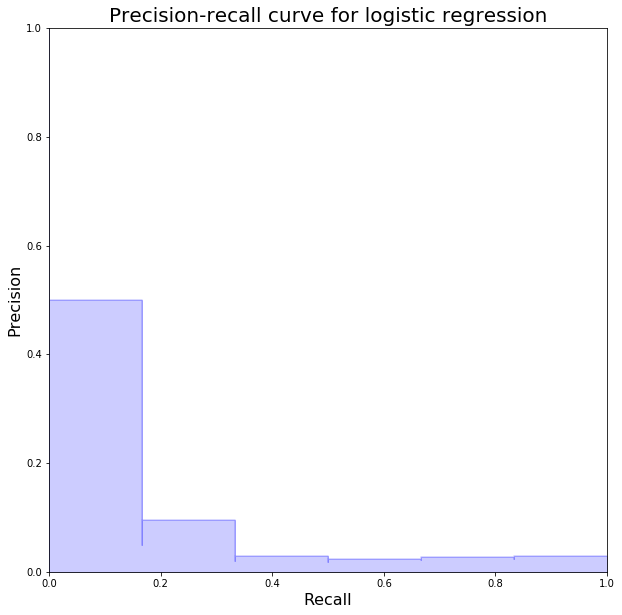

In [71]:
precision, recall, _ = precision_recall_curve(y_test, cross_val_lr.decision_function(X_test))

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(figsize=(10, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-recall curve for logistic regression', fontsize=20)
plt.show()

# Results

I hate this dataset. Gridsearching here is ridiculous (at least for logreg model), because none of the parameters will change anything for the dataset. Maybe it's worth to try using another target like disjunction of all tests of maybe conjunction of at leats two of them being true, but I have no time left for that. Consulting with groupmates showed that it actually won't help. Too small amount of data and it has ?-s. What can we expect?